##Time series fundamental and Milestone project-3

#get data


In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-06-24 11:40:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.004s  

2023-06-24 11:40:49 (40.4 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



#importing time series data

In [2]:
import pandas as pd
#let's read in out bitcoin data and parse the data
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col = ["Date"])#tell pandas it's a data and time

In [3]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
len(df)

2787

In [6]:
#only want closing price for each day
bitcoin_prices =pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


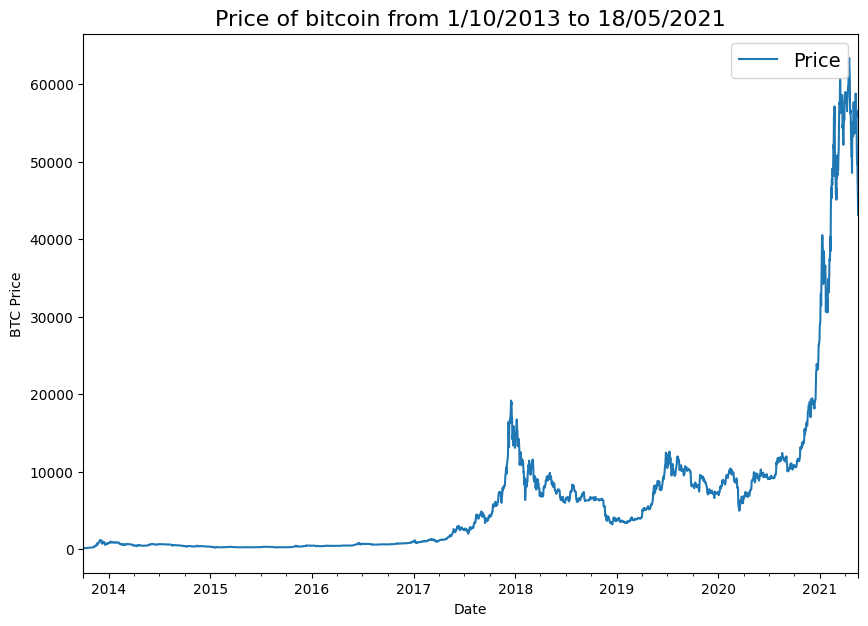

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of bitcoin from 1/10/2013 to 18/05/2021", fontsize=16)
plt.legend(fontsize=14);

In [8]:
import csv
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv") as bitcoin_prices_csv:
     spamreader = csv.reader(bitcoin_prices_csv, delimiter=' ', quotechar='|')
     for row in spamreader:
        print(', '.join(row))

Currency,Date,Closing, Price, (USD),24h, Open, (USD),24h, High, (USD),24h, Low, (USD)
BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
BTC,2013-10-02,125.455,123.65499,125.7585,123.63383
BTC,2013-10-03,108.58483,125.455,125.66566,83.32833
BTC,2013-10-04,118.67466,108.58483,118.675,107.05816
BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566
BTC,2013-10-06,120.65533,121.33866,121.85216,120.5545
BTC,2013-10-07,121.795,120.65533,121.99166,120.43199
BTC,2013-10-08,123.033,121.795,123.64016,121.35066
BTC,2013-10-09,124.049,123.033,124.7835,122.59266
BTC,2013-10-10,125.96116,124.049,128.01683,123.81966
BTC,2013-10-11,125.27966,125.96116,126.43666,124.11383
BTC,2013-10-12,125.9275,125.27966,126.0365,123.12966
BTC,2013-10-13,126.38333,125.9275,126.8965,125.2765
BTC,2013-10-14,135.24199,126.38333,135.24199,126.255
BTC,2013-10-15,133.20333,135.24199,135.69216,130.39275
BTC,2013-10-16,142.76333,133.20333,143.60483,132.94933
BTC,2013-10-17,137.92333,142.76333,145.601,136.01466
BTC,2013-1

In [9]:
#Importing time series with Pythons's CSV module
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) #skips first line
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))#get the closing price as float

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'Price of bitcoin from 1/10/2013 to 18/05/2021')

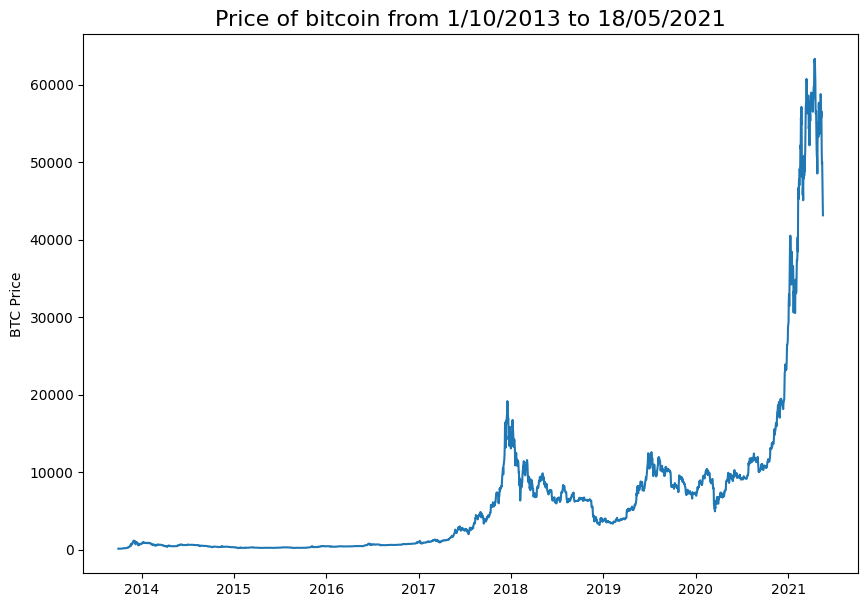

In [10]:
#plot from csv
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of bitcoin from 1/10/2013 to 18/05/2021", fontsize=16)


Format data part-1: cReate train and test sets of our time series data the wrong way

In [11]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [12]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [13]:
#wrong way to make train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

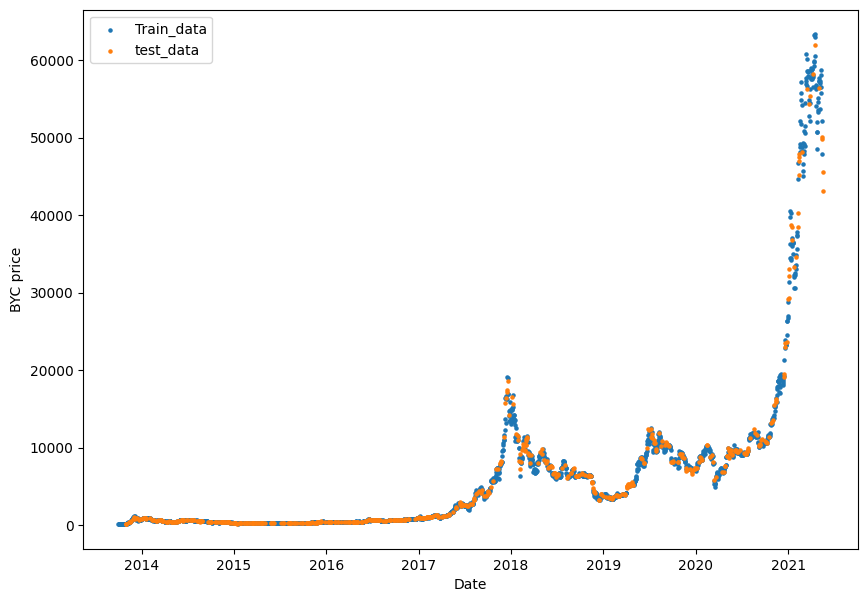

In [14]:
#plot
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train_data")
plt.scatter(X_test, y_test, s=5, label = "test_data")
plt.xlabel("Date")
plt.ylabel("BYC price")
plt.legend()
plt.show();

In [15]:
#create train and test sets (the right way)
split_size = int(0.8 * len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)


(2229, 558, 2229, 558)

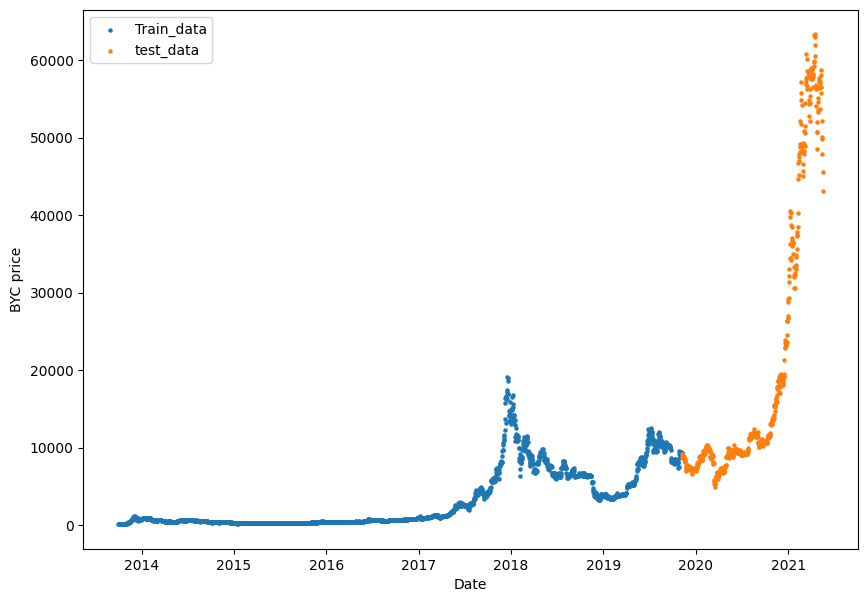

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train_data")
plt.scatter(X_test, y_test, s=5, label = "test_data")
plt.xlabel("Date")
plt.ylabel("BYC price")
plt.legend()
plt.show();

In [17]:
#create a plotting function
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

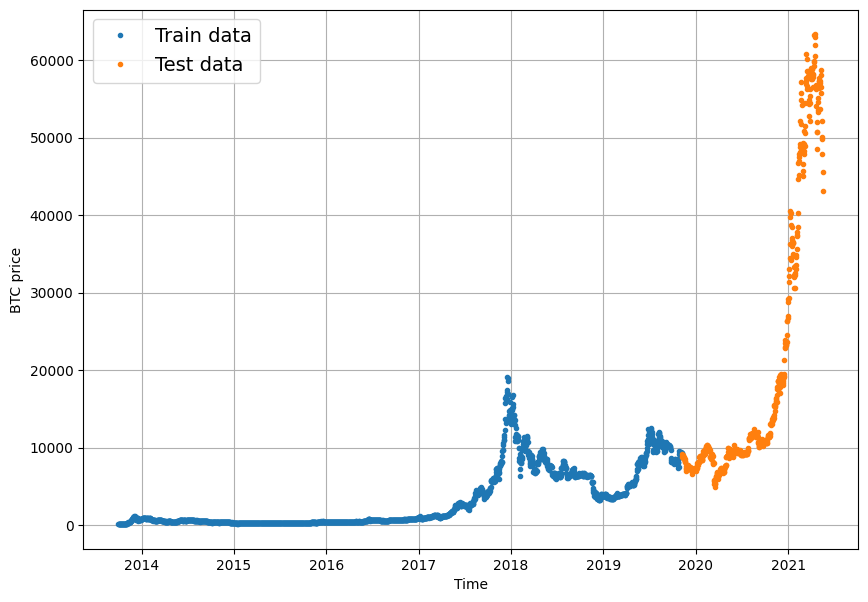

In [18]:
plt.figure(figsize=(10,7))
plot_time_series(X_train,y_train, label="Train data")
plot_time_series(X_test,y_test, label="Test data")

#modelling Experiments



##Model 0 Naive model

$$\hat{y}_{t} = y_{t-1}$$

In [19]:
#create Naive forecast
naive_forcast = y_test[:-1]

naive_forcast[:10], naive_forcast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [20]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

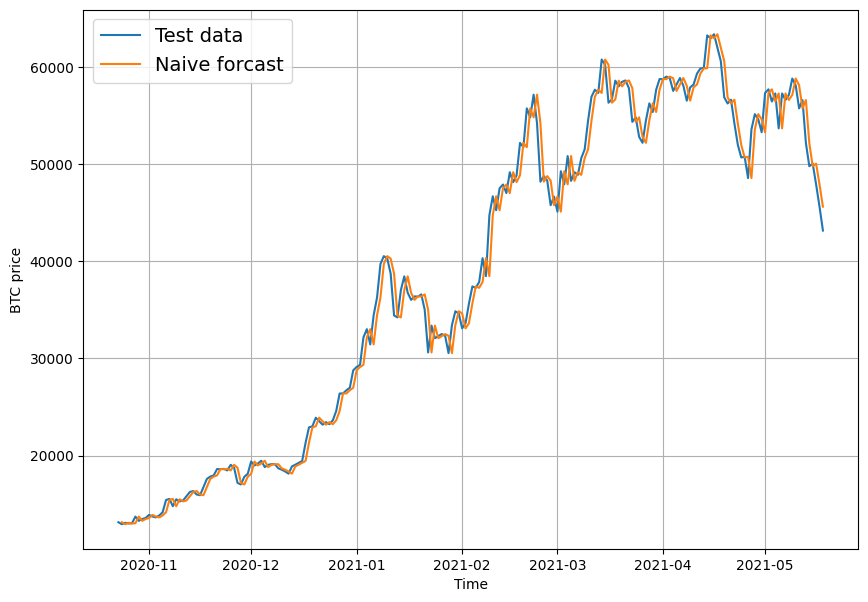

In [21]:
plt.figure(figsize=(10,7))
#plot_time_series(X_train, y_train, label="Train data")
plot_time_series(X_test, y_test,start=350, format="-",label="Test data")
plot_time_series(X_test[1:], naive_forcast,start=350,format="-", label="Naive forcast")

#Evaluating a time series model

1. MAE
2. MSE
3. RMSE
4. MAPE/sMAPE
5. MASE

In [22]:
import tensorflow as tf


In [23]:
#MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """ Implement MASE (asuming no seasonality of data)."""
  mae =tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season


In [24]:
mean_absolute_scaled_error(y_test[1:], naive_forcast).numpy()

0.9995699939182624

In [25]:
#Create a function to ttake in model prediction and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [26]:
naive_results = evaluate_preds(y_test[1:], naive_forcast)

In [27]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

#format data part-2: windowing our dataset

windowing for one week

1. [0,1,2,3,4,5,6] -- [7]
2. [1,2,3,4,5,6,7] -- [8]
3. [2,3,4,5,6,7,8] -- [9]


In [28]:
print(f"we want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

we want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [29]:
#let's setup global variables for window adn horizon size
HORIZON = 1
WINDOW_SIZE = 7

In [30]:
#create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  creates labels for windowed dataset.

  eg if horizon=1
  input: [0,1,2,3,4,5,6,7] output ([0,1,2,3,4,5,6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [31]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

#create function to get windows and labels

1. create a window step of specific window size([0,1,2,3,4,5,6])
2. use Numpy indexing to create 2D array of multiple window steps,
3. uses the 2D aray of multiple window steps from 2 to index on a target series
4. uses our `get_labelled_windows()` function we created above to turn the window steps into window s with a specified horizon

In [32]:
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels


In [33]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [34]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> [125.96116]


In [35]:
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> [43144.47129086]


In [36]:

# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels


In [37]:


train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [38]:

train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [39]:
#check to see if train labels are the same
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

#Make modelling checkpoint

In [40]:
import os

#create a function to implement a Model checkpoint witha specific filename
def create_model_checkpoint(model_name, save_path = "model_exp"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, #only output a limited amount of text
                                            save_best_only = True
                                            )

##Model 1 Dense model Window=7, Horizon=1

In [41]:
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
])

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])
his_1= model_1.fit(train_windows,
                 train_labels,
                 epochs=100,
                 verbose=1,
                 validation_data=(test_windows, test_labels),
                 callbacks=[create_model_checkpoint("model_1")])

Epoch 1/100
65/70 [==========================>...] - ETA: 0s - loss: 514.2448 - mae: 514.2448 - mse: 1570663.3750

70/70 [==============================] - 9s 20ms/step - loss: 492.6145 - mae: 492.6145 - mse: 1477182.2500 - val_loss: 1007.4755 - val_mae: 1007.4755 - val_mse: 3416755.5000
Epoch 2/100
68/70 [============================>.] - ETA: 0s - loss: 178.9589 - mae: 178.9589 - mse: 169288.3438

70/70 [==============================] - 1s 11ms/step - loss: 177.2800 - mae: 177.2800 - mse: 166403.4219 - val_loss: 971.2900 - val_mae: 971.2900 - val_mse: 3003060.2500
Epoch 3/100
67/70 [===========================>..] - ETA: 0s - loss: 170.4431 - mae: 170.4431 - mse: 154228.0312

70/70 [==============================] - 1s 11ms/step - loss: 169.9951 - mae: 169.9951 - mse: 155496.3281 - val_loss: 940.6995 - val_mae: 940.6995 - val_mse: 2736197.2500
Epoch 4/100
62/70 [=========================>....] - ETA: 0s - loss: 160.5988 - mae: 160.5988 - mse: 137424.1875

70/70 [==============================] - 1s 12ms/step - loss: 159.5027 - mae: 159.5027 - mse: 133906.5781 - val_loss: 832.7262 - val_mae: 832.7262 - val_mse: 2346996.2500
Epoch 5/100
70/70 [==============================] - 0s 5ms/step - loss: 148.7316 - mae: 148.7316 - mse: 120450.5000 - val_loss: 833.3220 - val_mae: 833.3220 - val_mse: 2152808.2500
Epoch 6/100
67/70 [===========================>..] - ETA: 0s - loss: 139.7762 - mae: 139.7762 - mse: 101666.3906

70/70 [==============================] - 1s 12ms/step - loss: 141.9917 - mae: 141.9917 - mse: 110237.7188 - val_loss: 760.2069 - val_mae: 760.2069 - val_mse: 1877479.1250
Epoch 7/100
70/70 [==============================] - 0s 6ms/step - loss: 143.6371 - mae: 143.6371 - mse: 109980.0859 - val_loss: 844.1013 - val_mae: 844.1013 - val_mse: 2086869.6250
Epoch 8/100
66/70 [===========================>..] - ETA: 0s - loss: 141.7206 - mae: 141.7206 - mse: 105285.9297

70/70 [==============================] - 1s 15ms/step - loss: 142.0476 - mae: 142.0476 - mse: 105427.0078 - val_loss: 727.3583 - val_mae: 727.3583 - val_mse: 1819244.5000
Epoch 9/100
70/70 [==============================] - 0s 6ms/step - loss: 130.8820 - mae: 130.8820 - mse: 94980.3203 - val_loss: 863.4641 - val_mae: 863.4641 - val_mse: 2099294.5000
Epoch 10/100
65/70 [==========================>...] - ETA: 0s - loss: 133.0251 - mae: 133.0251 - mse: 93858.3906

70/70 [==============================] - 1s 13ms/step - loss: 132.8087 - mae: 132.8087 - mse: 92812.6328 - val_loss: 669.6782 - val_mae: 669.6782 - val_mse: 1552301.2500
Epoch 11/100
70/70 [==============================] - 0s 5ms/step - loss: 126.9708 - mae: 126.9708 - mse: 91093.5625 - val_loss: 833.3130 - val_mae: 833.3130 - val_mse: 1971922.0000
Epoch 12/100
63/70 [==========================>...] - ETA: 0s - loss: 137.9994 - mae: 137.9994 - mse: 95807.6172

70/70 [==============================] - 1s 14ms/step - loss: 137.0424 - mae: 137.0424 - mse: 96082.3125 - val_loss: 648.9394 - val_mae: 648.9394 - val_mse: 1452875.8750
Epoch 13/100
62/70 [=========================>....] - ETA: 0s - loss: 123.0895 - mae: 123.0895 - mse: 84895.4375

70/70 [==============================] - 1s 11ms/step - loss: 123.2519 - mae: 123.2519 - mse: 85705.6094 - val_loss: 645.9444 - val_mae: 645.9444 - val_mse: 1428682.3750
Epoch 14/100
70/70 [==============================] - 0s 4ms/step - loss: 130.7794 - mae: 130.7794 - mse: 89839.7109 - val_loss: 1209.4508 - val_mae: 1209.4508 - val_mse: 3388011.5000
Epoch 15/100
70/70 [==============================] - 0s 4ms/step - loss: 128.5505 - mae: 128.5505 - mse: 87934.3281 - val_loss: 690.4760 - val_mae: 690.4760 - val_mse: 1593331.7500
Epoch 16/100
66/70 [===========================>..] - ETA: 0s - loss: 120.6251 - mae: 120.6251 - mse: 82793.7422

70/70 [==============================] - 1s 10ms/step - loss: 119.2298 - mae: 119.2298 - mse: 81673.3516 - val_loss: 619.4006 - val_mae: 619.4006 - val_mse: 1358755.1250
Epoch 17/100
70/70 [==============================] - 0s 4ms/step - loss: 116.8994 - mae: 116.8994 - mse: 78501.2812 - val_loss: 634.6516 - val_mae: 634.6516 - val_mse: 1400787.3750
Epoch 18/100
70/70 [==============================] - 0s 4ms/step - loss: 121.1398 - mae: 121.1398 - mse: 80281.8203 - val_loss: 664.2968 - val_mae: 664.2968 - val_mse: 1472875.3750
Epoch 19/100
70/70 [==============================] - 0s 5ms/step - loss: 121.8678 - mae: 121.8678 - mse: 82599.7031 - val_loss: 625.9246 - val_mae: 625.9246 - val_mse: 1330847.8750
Epoch 20/100
70/70 [==============================] - 0s 5ms/step - loss: 114.7046 - mae: 114.7046 - mse: 76444.0391 - val_loss: 652.5449 - val_mae: 652.5449 - val_mse: 1383977.6250
Epoch 21/100
64/70 [==========================>...] - ETA: 0s - loss: 115.3127 - mae: 115.3127 - mse: 

70/70 [==============================] - 1s 11ms/step - loss: 115.8930 - mae: 115.8930 - mse: 73513.3906 - val_loss: 604.3674 - val_mae: 604.3674 - val_mse: 1276440.0000
Epoch 22/100
70/70 [==============================] - 0s 5ms/step - loss: 116.9228 - mae: 116.9228 - mse: 77726.7422 - val_loss: 608.1360 - val_mae: 608.1360 - val_mse: 1300823.2500
Epoch 23/100
70/70 [==============================] - 0s 4ms/step - loss: 124.0577 - mae: 124.0577 - mse: 82911.8672 - val_loss: 629.9601 - val_mae: 629.9601 - val_mse: 1320246.8750
Epoch 24/100
62/70 [=========================>....] - ETA: 0s - loss: 116.2228 - mae: 116.2228 - mse: 78116.6797

70/70 [==============================] - 1s 11ms/step - loss: 113.9211 - mae: 113.9211 - mse: 75700.4922 - val_loss: 589.6651 - val_mae: 589.6651 - val_mse: 1238462.3750
Epoch 25/100
70/70 [==============================] - 0s 4ms/step - loss: 121.9168 - mae: 121.9168 - mse: 77098.5000 - val_loss: 635.7659 - val_mae: 635.7659 - val_mse: 1331035.3750
Epoch 26/100
70/70 [==============================] - 0s 4ms/step - loss: 123.1262 - mae: 123.1262 - mse: 82199.5703 - val_loss: 616.4970 - val_mae: 616.4970 - val_mse: 1301848.1250
Epoch 27/100
70/70 [==============================] - 0s 4ms/step - loss: 113.4537 - mae: 113.4537 - mse: 73755.9844 - val_loss: 749.1785 - val_mae: 749.1785 - val_mse: 1688405.5000
Epoch 28/100
70/70 [==============================] - 0s 4ms/step - loss: 114.8932 - mae: 114.8932 - mse: 77131.4375 - val_loss: 619.2244 - val_mae: 619.2244 - val_mse: 1282119.3750
Epoch 29/100
70/70 [==============================] - 0s 4ms/step - loss: 111.8609 - mae: 111.8609 - m

70/70 [==============================] - 1s 11ms/step - loss: 115.3687 - mae: 115.3687 - mse: 74148.8594 - val_loss: 578.3810 - val_mae: 578.3810 - val_mse: 1209558.6250
Epoch 31/100
70/70 [==============================] - 0s 4ms/step - loss: 113.8052 - mae: 113.8052 - mse: 75035.0312 - val_loss: 761.4447 - val_mae: 761.4447 - val_mse: 1649636.0000
Epoch 32/100
66/70 [===========================>..] - ETA: 0s - loss: 116.8164 - mae: 116.8164 - mse: 76328.4609

70/70 [==============================] - 1s 15ms/step - loss: 117.1449 - mae: 117.1449 - mse: 78145.9219 - val_loss: 574.9195 - val_mae: 574.9195 - val_mse: 1198708.8750
Epoch 33/100
70/70 [==============================] - 0s 6ms/step - loss: 115.0766 - mae: 115.0766 - mse: 74578.4062 - val_loss: 647.1893 - val_mae: 647.1893 - val_mse: 1337640.0000
Epoch 34/100
70/70 [==============================] - 0s 6ms/step - loss: 120.2128 - mae: 120.2128 - mse: 82376.3125 - val_loss: 763.6017 - val_mae: 763.6017 - val_mse: 1661178.7500
Epoch 35/100
66/70 [===========================>..] - ETA: 0s - loss: 111.3418 - mae: 111.3418 - mse: 74208.4531

70/70 [==============================] - 1s 14ms/step - loss: 112.1348 - mae: 112.1348 - mse: 73496.9297 - val_loss: 572.9905 - val_mae: 572.9905 - val_mse: 1196504.0000
Epoch 36/100
70/70 [==============================] - 0s 4ms/step - loss: 124.0111 - mae: 124.0111 - mse: 80396.4453 - val_loss: 579.2858 - val_mae: 579.2858 - val_mse: 1203589.5000
Epoch 37/100
70/70 [==============================] - 0s 4ms/step - loss: 117.4737 - mae: 117.4737 - mse: 73666.7422 - val_loss: 577.0897 - val_mae: 577.0897 - val_mse: 1194280.0000
Epoch 38/100
70/70 [==============================] - 0s 5ms/step - loss: 130.5306 - mae: 130.5306 - mse: 81979.9375 - val_loss: 957.8358 - val_mae: 957.8358 - val_mse: 2316276.7500
Epoch 39/100
70/70 [==============================] - 0s 4ms/step - loss: 114.3152 - mae: 114.3152 - mse: 71026.5078 - val_loss: 789.8653 - val_mae: 789.8653 - val_mse: 1793628.2500
Epoch 40/100
61/70 [=========================>....] - ETA: 0s - loss: 129.8034 - mae: 129.8034 - mse: 

70/70 [==============================] - 1s 11ms/step - loss: 127.0824 - mae: 127.0824 - mse: 81737.0547 - val_loss: 571.5740 - val_mae: 571.5740 - val_mse: 1190352.7500
Epoch 41/100
70/70 [==============================] - 0s 4ms/step - loss: 108.9051 - mae: 108.9051 - mse: 69559.5938 - val_loss: 758.1945 - val_mae: 758.1945 - val_mse: 1694863.5000
Epoch 42/100
70/70 [==============================] - 0s 4ms/step - loss: 114.6894 - mae: 114.6894 - mse: 73721.6797 - val_loss: 573.4048 - val_mae: 573.4048 - val_mse: 1182610.3750
Epoch 43/100
70/70 [==============================] - 0s 4ms/step - loss: 109.0816 - mae: 109.0816 - mse: 71223.3906 - val_loss: 577.1214 - val_mae: 577.1214 - val_mse: 1196114.6250
Epoch 44/100
70/70 [==============================] - 0s 5ms/step - loss: 115.6105 - mae: 115.6105 - mse: 74254.0859 - val_loss: 680.6191 - val_mae: 680.6191 - val_mse: 1444515.3750
Epoch 45/100
70/70 [==============================] - 0s 4ms/step - loss: 111.9034 - mae: 111.9034 - m

70/70 [==============================] - 1s 11ms/step - loss: 110.7091 - mae: 110.7091 - mse: 70783.3828 - val_loss: 571.4296 - val_mae: 571.4296 - val_mse: 1180549.1250
Epoch 51/100
70/70 [==============================] - 0s 4ms/step - loss: 112.6583 - mae: 112.6583 - mse: 73384.5938 - val_loss: 586.9715 - val_mae: 586.9715 - val_mse: 1213728.5000
Epoch 52/100
70/70 [==============================] - 0s 4ms/step - loss: 113.1058 - mae: 113.1058 - mse: 71801.6875 - val_loss: 697.8127 - val_mae: 697.8127 - val_mse: 1452096.2500
Epoch 53/100
65/70 [==========================>...] - ETA: 0s - loss: 109.6450 - mae: 109.6450 - mse: 70563.4375

70/70 [==============================] - 1s 11ms/step - loss: 110.4531 - mae: 110.4531 - mse: 70784.6719 - val_loss: 570.9606 - val_mae: 570.9606 - val_mse: 1176531.6250
Epoch 54/100
70/70 [==============================] - 0s 4ms/step - loss: 109.7680 - mae: 109.7680 - mse: 71000.2812 - val_loss: 605.3292 - val_mae: 605.3292 - val_mse: 1237926.1250
Epoch 55/100
70/70 [==============================] - 0s 4ms/step - loss: 110.4706 - mae: 110.4706 - mse: 71716.3438 - val_loss: 573.9727 - val_mae: 573.9727 - val_mse: 1178020.5000
Epoch 56/100
65/70 [==========================>...] - ETA: 0s - loss: 108.9831 - mae: 108.9831 - mse: 72081.2578

70/70 [==============================] - 1s 11ms/step - loss: 108.1856 - mae: 108.1856 - mse: 69799.5156 - val_loss: 563.0564 - val_mae: 563.0564 - val_mse: 1155162.1250
Epoch 57/100
70/70 [==============================] - 0s 5ms/step - loss: 109.9047 - mae: 109.9047 - mse: 71384.7734 - val_loss: 565.9526 - val_mae: 565.9526 - val_mse: 1168106.7500
Epoch 58/100
70/70 [==============================] - 0s 4ms/step - loss: 114.3733 - mae: 114.3733 - mse: 73766.0391 - val_loss: 567.6319 - val_mae: 567.6319 - val_mse: 1169743.1250
Epoch 59/100
70/70 [==============================] - 0s 4ms/step - loss: 109.0550 - mae: 109.0550 - mse: 69856.0469 - val_loss: 580.5098 - val_mae: 580.5098 - val_mse: 1187610.2500
Epoch 60/100
70/70 [==============================] - 0s 5ms/step - loss: 109.4864 - mae: 109.4864 - mse: 69542.1797 - val_loss: 589.4376 - val_mae: 589.4376 - val_mse: 1215341.3750
Epoch 61/100
70/70 [==============================] - 0s 6ms/step - loss: 108.8649 - mae: 108.8649 - m

In [42]:
#evaluate on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 616.0594 - mae: 616.0594 - mse: 1255140.2500


[616.0594482421875, 616.0594482421875, 1255140.25]

In [43]:
#load in saved best performing model_1 evaluate it
model_1 = tf.keras.models.load_model("model_exp/model_1/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 563.0564 - mae: 563.0564 - mse: 1155162.1250


[563.056396484375, 563.056396484375, 1155162.125]

# making forecasting with a model (on the test data)

1. take in train model
2. takes in some input data (same kind of data the model trained on)
3. passes the input data to the model's `predict()` method
4. return the predictions

In [44]:
def make_pred(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [45]:
model_1_pred = make_pred(model_1, test_windows)
len(model_1_pred), model_1_pred[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8849.924, 8770.846, 9024.533, 8782.622, 8730.466, 8729.591,
        8670.736, 8528.013, 8445.991, 8521.882], dtype=float32)>)

In [46]:
model_1_results = evaluate_preds(tf.squeeze(test_labels), model_1_pred)

In [47]:
model_1_results

{'mae': 563.0564,
 'mse': 1155162.0,
 'rmse': 1074.7847,
 'mape': 2.5104477,
 'mase': 0.98913413}

In [48]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

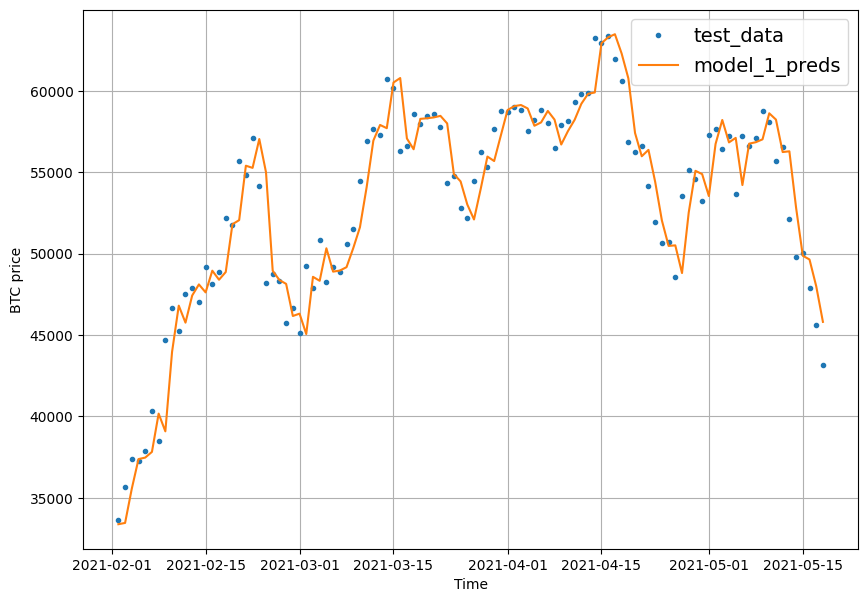

In [49]:
#let's plot our model_1 predictions
offset=450
plt.figure(figsize=(10,7))
#account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start=offset,
                 label="test_data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = model_1_pred,
                 start=offset,
                 format="-",
                 label="model_1_preds")

##Model_2 Window=30, horizon=1

In [50]:
HORZION =1
WINDOW_SIZE = 30


In [51]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [52]:
len(full_windows), len(full_labels)

(2757, 2757)

In [53]:
#make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [54]:
len(train_windows)

2205

In [55]:
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(1)
])

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

his_2 = model_2.fit(train_windows,
                    train_labels,
                    epochs=100,
                    batch_size=128,
                    verbose=0,
                    validation_data = (test_windows, test_labels),
                    callbacks=[create_model_checkpoint("model_2")])

In [56]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 626.7358


626.7357788085938

In [57]:
model_2 = tf.keras.models.load_model("model_exp/model_2")

In [58]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 607.3639


607.3638916015625

In [59]:
model_2_pred = make_pred(model_2, test_windows)
len(model_2_pred), model_2_pred[:10]

18/18 [==============================] - 0s 2ms/step


(552,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8825.017 , 8826.163 , 8758.874 , 8688.928 , 8459.81  , 8473.087 ,
        8132.1143, 8184.2144, 8107.5874, 7716.198 ], dtype=float32)>)

In [60]:
tf.squeeze(test_labels).shape, model_2_pred.shape

(TensorShape([552]), TensorShape([552]))

In [61]:
model_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_pred)
model_2_results

{'mae': 607.3639,
 'mse': 1286682.4,
 'rmse': 1134.3202,
 'mape': 2.783,
 'mase': 1.061678}

In [62]:
model_1_results

{'mae': 563.0564,
 'mse': 1155162.0,
 'rmse': 1074.7847,
 'mape': 2.5104477,
 'mase': 0.98913413}

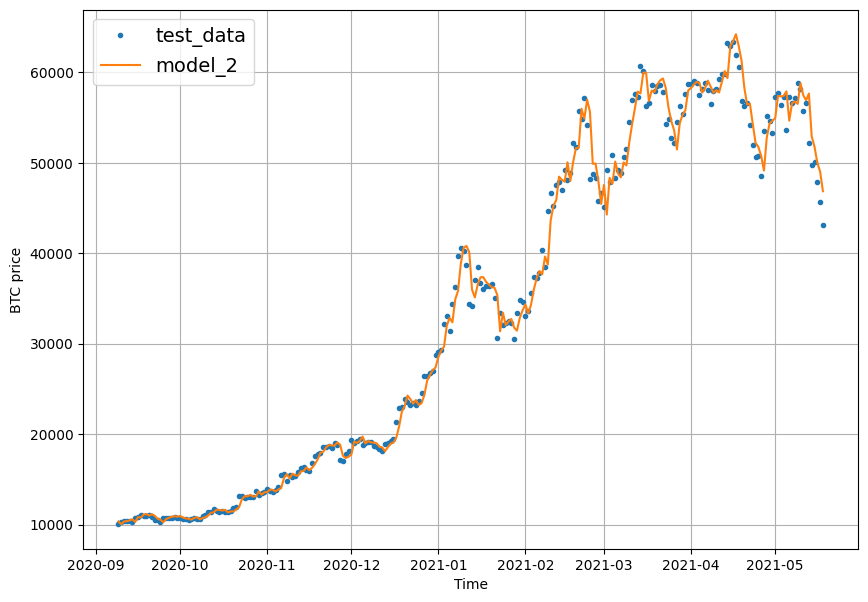

In [63]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(X_test[-len(test_windows):],
                 test_labels[:,0],start=offset, label="test_data")
plot_time_series(X_test[-len(test_windows):], model_2_pred, format="-", start=offset, label="model_2")

##Model 3 Window = 30, Horizon=7

In [64]:
HORIZON = 7
WINDOW_SIZE= 30


In [65]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [66]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_labels)

(2200, 2200, 551)

In [67]:
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
])

model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

his_3 = model_3.fit(train_windows,
                    train_labels,
                    epochs=100,
                    verbose=0,
                    validation_data= (test_windows, test_labels),
                    callbacks=[create_model_checkpoint("model_3")])

In [68]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1292.6119


1292.6119384765625

In [69]:
#load best version of model_3
model_3 = tf.keras.models.load_model("model_exp/model_3")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1198.9364


1198.9364013671875

In [70]:
model_3_pred = make_pred(model_3, test_windows)
model_3_pred[:5]
model_3_results = evaluate_preds(tf.squeeze(test_labels),
                           model_3_pred)

18/18 [==============================] - 0s 2ms/step


#Make our evaluation function work for multiple dimensions

In [71]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [72]:
model_3_pred = make_pred(model_3, test_windows)
model_3_pred[:5]
model_3_results = evaluate_preds(tf.squeeze(test_labels),
                           model_3_pred)

18/18 [==============================] - 0s 2ms/step


In [73]:
model_3_results

{'mae': 1198.9364,
 'mse': 5085809.5,
 'rmse': 1383.161,
 'mape': 5.5487266,
 'mase': 2.1334403}

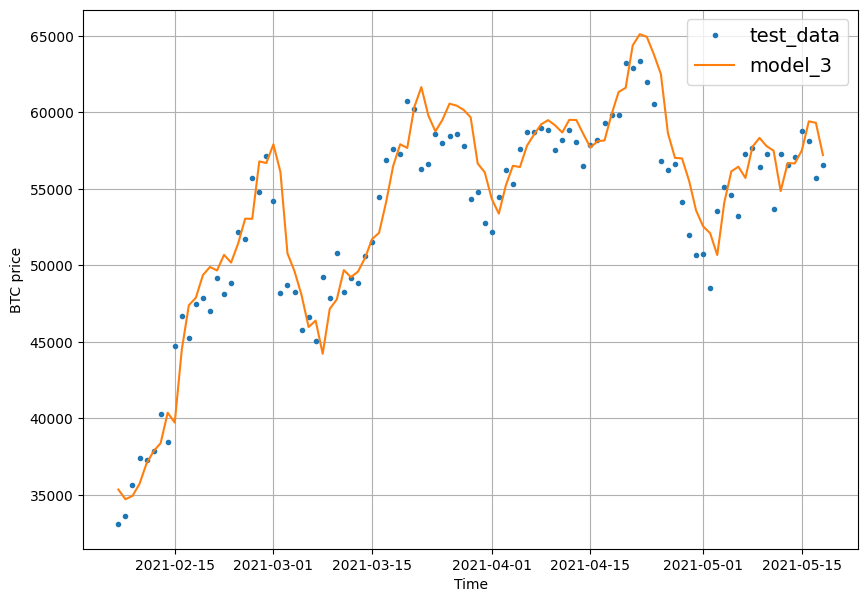

In [74]:
offset=450
plt.figure(figsize=(10,7))
plot_time_series(X_test[-len(test_windows):],
                 test_labels[:,0],start=offset, label="test_data")
plot_time_series(X_test[-len(test_windows):], tf.reduce_mean(model_3_pred,axis=1), format="-", start=offset, label="model_3")

#comparing model results

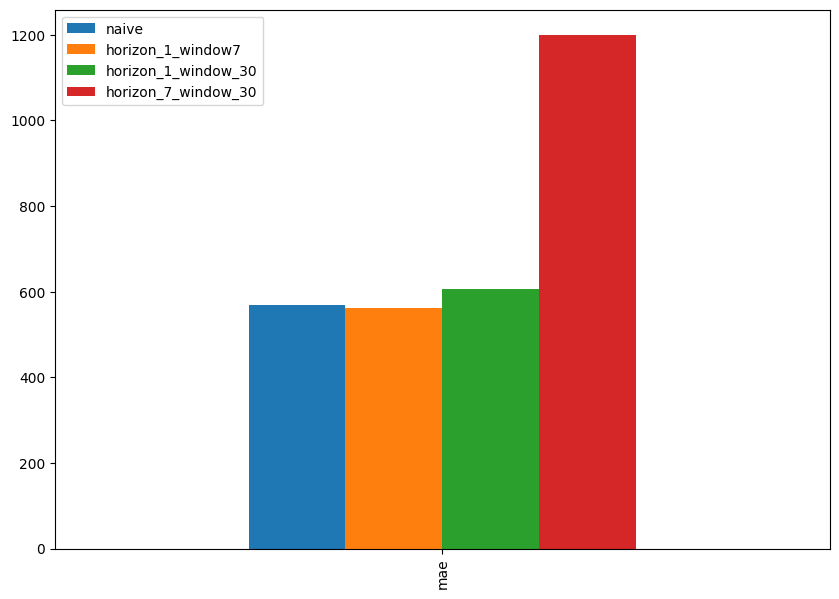

In [75]:
pd.DataFrame({"naive": naive_results["mae"],
             "horizon_1_window7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10,7), kind="bar");

##model_4: Conv1D

In [76]:
HORIZON = 1
WINDOW_SIZE = 7

In [77]:
#create windwows data
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_labels),len(test_windows)

(2224, 2224, 556, 556)

to use conv1D we need inpit shape of (batch size, timesteps, input _dim)


In [78]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [79]:
expand_dims_layer = layers.Lambda(lambda x : tf.expand_dims(x, axis=1)) # add in extra dimenion layer

In [80]:
print(f"Original shape: {x.shape}")
print(f"expanded shape: { expand_dims_layer(x).shape}")
print(f"original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
expanded shape: (7, 1)
original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [81]:
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters = 128, kernel_size=5, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
])

model_4.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint("model_4")])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1995.8649

18/18 [==============================] - 7s 97ms/step - loss: 1995.8649 - val_loss: 2875.4275
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 306.5724

18/18 [==============================] - 1s 42ms/step - loss: 302.2691 - val_loss: 1184.8517
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 200.9115

18/18 [==============================] - 1s 41ms/step - loss: 197.8428 - val_loss: 988.6586
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 172.7278

18/18 [==============================] - 1s 41ms/step - loss: 172.5825 - val_loss: 952.9780
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 171.9391 - val_loss: 977.3049
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 164.6203

18/18 [==============================] - 1s 42ms/step - loss: 166.3002 - val_loss: 923.3173
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 163.8836

18/18 [==============================] - 2s 98ms/step - loss: 163.8836 - val_loss: 915.5556
Epoch 8/100
10/18 [===============>..............] - ETA: 0s - loss: 157.6425

18/18 [==============================] - 1s 62ms/step - loss: 161.8194 - val_loss: 903.5682
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 159.7120 - val_loss: 915.1992
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 157.3338

18/18 [==============================] - 1s 79ms/step - loss: 157.3338 - val_loss: 871.5906
Epoch 11/100
13/18 [====================>.........] - ETA: 0s - loss: 159.4157

18/18 [==============================] - 1s 65ms/step - loss: 154.2423 - val_loss: 853.3638
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 152.3388 - val_loss: 919.5283
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 150.4854

18/18 [==============================] - 3s 148ms/step - loss: 150.1077 - val_loss: 840.2256
Epoch 14/100
18/18 [==============================] - 0s 9ms/step - loss: 146.3851 - val_loss: 870.5510
Epoch 15/100
11/18 [=================>............] - ETA: 0s - loss: 144.0380

18/18 [==============================] - 2s 117ms/step - loss: 146.5109 - val_loss: 830.9769
Epoch 16/100
18/18 [==============================] - 2s 102ms/step - loss: 141.7260 - val_loss: 803.3328
Epoch 17/100
18/18 [==============================] - 0s 12ms/step - loss: 139.3754 - val_loss: 811.3295
Epoch 18/100
10/18 [===============>..............] - ETA: 0s - loss: 147.6344

18/18 [==============================] - 2s 98ms/step - loss: 138.5715 - val_loss: 771.2190
Epoch 19/100
17/18 [===========================>..] - ETA: 0s - loss: 135.4532

18/18 [==============================] - 1s 61ms/step - loss: 134.7288 - val_loss: 759.8953
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 138.0529 - val_loss: 771.0227
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 133.4422

18/18 [==============================] - 1s 41ms/step - loss: 134.4867 - val_loss: 724.4407
Epoch 22/100
17/18 [===========================>..] - ETA: 0s - loss: 131.6430

18/18 [==============================] - 1s 40ms/step - loss: 130.9236 - val_loss: 717.9313
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 127.6454 - val_loss: 718.6067
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 130.8318

18/18 [==============================] - 1s 42ms/step - loss: 129.3663 - val_loss: 711.9403
Epoch 25/100
16/18 [=========================>....] - ETA: 0s - loss: 131.9812

18/18 [==============================] - 1s 41ms/step - loss: 129.1796 - val_loss: 705.1650
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 125.6137 - val_loss: 716.1718
Epoch 27/100
16/18 [=========================>....] - ETA: 0s - loss: 126.2851

18/18 [==============================] - 1s 41ms/step - loss: 125.6303 - val_loss: 678.9413
Epoch 28/100
16/18 [=========================>....] - ETA: 0s - loss: 120.5877

18/18 [==============================] - 1s 44ms/step - loss: 121.5171 - val_loss: 676.3647
Epoch 29/100
10/18 [===============>..............] - ETA: 0s - loss: 123.5810

18/18 [==============================] - 1s 58ms/step - loss: 120.3071 - val_loss: 665.1324
Epoch 30/100
18/18 [==============================] - 0s 8ms/step - loss: 122.5875 - val_loss: 702.1334
Epoch 31/100
18/18 [==============================] - 0s 8ms/step - loss: 130.0341 - val_loss: 813.5981
Epoch 32/100
12/18 [===================>..........] - ETA: 0s - loss: 135.5079

18/18 [==============================] - 1s 63ms/step - loss: 129.3004 - val_loss: 664.9313
Epoch 33/100
12/18 [===================>..........] - ETA: 0s - loss: 123.4149

18/18 [==============================] - 1s 44ms/step - loss: 122.0775 - val_loss: 653.6225
Epoch 34/100
16/18 [=========================>....] - ETA: 0s - loss: 119.8301

18/18 [==============================] - 1s 42ms/step - loss: 119.5586 - val_loss: 639.3083
Epoch 35/100
14/18 [======================>.......] - ETA: 0s - loss: 120.3078

18/18 [==============================] - 1s 41ms/step - loss: 117.4830 - val_loss: 635.1945
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 120.7075 - val_loss: 668.2803
Epoch 37/100
14/18 [======================>.......] - ETA: 0s - loss: 118.2631

18/18 [==============================] - 1s 62ms/step - loss: 116.8306 - val_loss: 630.5027
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 117.0987 - val_loss: 633.4912
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 116.2913 - val_loss: 674.2312
Epoch 40/100
16/18 [=========================>....] - ETA: 0s - loss: 115.1445

18/18 [==============================] - 1s 40ms/step - loss: 114.9009 - val_loss: 618.1624
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 115.0873 - val_loss: 624.1750
Epoch 42/100
17/18 [===========================>..] - ETA: 0s - loss: 119.7729

18/18 [==============================] - 1s 42ms/step - loss: 118.6595 - val_loss: 611.2458
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 113.0229 - val_loss: 613.4875
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 115.0767 - val_loss: 622.3826
Epoch 45/100
16/18 [=========================>....] - ETA: 0s - loss: 115.0588

18/18 [==============================] - 1s 42ms/step - loss: 116.0444 - val_loss: 607.8123
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 113.4521 - val_loss: 612.6588
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 118.1745 - val_loss: 668.1254
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3313 - val_loss: 626.3936
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1832 - val_loss: 611.7838
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 114.0650 - val_loss: 619.9431
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 112.4512 - val_loss: 610.2210
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 113.7328 - val_loss: 616.1484
Epoch 53/100
17/18 [===========================>..] - ETA: 0s - loss: 113.8394

18/18 [==============================] - 1s 41ms/step - loss: 113.3636 - val_loss: 605.5016
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 113.0944 - val_loss: 633.3975
Epoch 55/100
16/18 [=========================>....] - ETA: 0s - loss: 115.8472

18/18 [==============================] - 1s 42ms/step - loss: 112.3821 - val_loss: 595.1644
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 110.0522 - val_loss: 743.4802
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 127.8383 - val_loss: 665.2674
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 120.4828 - val_loss: 648.8563
Epoch 59/100
17/18 [===========================>..] - ETA: 0s - loss: 108.6905

18/18 [==============================] - 1s 54ms/step - loss: 109.9309 - val_loss: 593.1710
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8188 - val_loss: 600.4260
Epoch 61/100
18/18 [==============================] - 0s 9ms/step - loss: 109.9248 - val_loss: 607.4291
Epoch 62/100
10/18 [===============>..............] - ETA: 0s - loss: 102.1942

18/18 [==============================] - 2s 141ms/step - loss: 109.4649 - val_loss: 587.2888
Epoch 63/100
18/18 [==============================] - 0s 21ms/step - loss: 108.7447 - val_loss: 614.2347
Epoch 64/100
18/18 [==============================] - 0s 16ms/step - loss: 110.4760 - val_loss: 635.6126
Epoch 65/100
10/18 [===============>..............] - ETA: 0s - loss: 110.4416

18/18 [==============================] - 1s 71ms/step - loss: 110.7428 - val_loss: 582.5325
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 112.2983 - val_loss: 582.9937
Epoch 67/100
18/18 [==============================] - 0s 15ms/step - loss: 108.4559 - val_loss: 673.7087
Epoch 68/100
18/18 [==============================] - 0s 16ms/step - loss: 115.4895 - val_loss: 687.7115
Epoch 69/100
18/18 [==============================] - 0s 10ms/step - loss: 123.6179 - val_loss: 674.1589
Epoch 70/100
18/18 [==============================] - 0s 10ms/step - loss: 120.4484 - val_loss: 584.1716
Epoch 71/100
18/18 [==============================] - 0s 11ms/step - loss: 110.5944 - val_loss: 596.1226
Epoch 72/100
17/18 [===========================>..] - ETA: 0s - loss: 108.3104

18/18 [==============================] - 1s 79ms/step - loss: 110.0175 - val_loss: 582.1943
Epoch 73/100
18/18 [==============================] - 0s 10ms/step - loss: 108.5973 - val_loss: 586.6131
Epoch 74/100
18/18 [==============================] - 0s 9ms/step - loss: 108.9695 - val_loss: 586.5685
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 109.2169 - val_loss: 603.4064
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2621 - val_loss: 582.4421
Epoch 77/100
17/18 [===========================>..] - ETA: 0s - loss: 113.1650

18/18 [==============================] - 1s 43ms/step - loss: 112.3214 - val_loss: 581.4324
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 108.3953 - val_loss: 581.6684
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 109.1571 - val_loss: 607.7606
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 108.4011 - val_loss: 583.5773
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 107.6660 - val_loss: 582.1649
Epoch 82/100
16/18 [=========================>....] - ETA: 0s - loss: 111.8794

18/18 [==============================] - 1s 62ms/step - loss: 113.2347 - val_loss: 576.3826
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 111.5719 - val_loss: 669.3469
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 111.7474 - val_loss: 599.6345
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7306 - val_loss: 584.0155
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 108.3199 - val_loss: 618.1177
Epoch 87/100
18/18 [==============================] - ETA: 0s - loss: 108.8215

18/18 [==============================] - 1s 41ms/step - loss: 108.8215 - val_loss: 573.7816
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6182 - val_loss: 578.8928
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3355 - val_loss: 574.5698
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 109.5801 - val_loss: 649.6043
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 111.6394 - val_loss: 594.9354
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8219 - val_loss: 574.3023
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7967 - val_loss: 639.1779
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 109.7255 - val_loss: 578.6333
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2252 - val_loss: 581.6770
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 11

In [82]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [83]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 636.1378


636.1378173828125

In [84]:
model_4 = tf.keras.models.load_model("model_exp/model_4")
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 573.7816


573.7815551757812

In [85]:
model_4_preds = make_pred(model_4, test_windows)

18/18 [==============================] - 0s 4ms/step


In [86]:
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8899.348, 8776.473, 9002.329, 8806.266, 8718.465, 8738.537,
       8695.066, 8538.052, 8453.226, 8523.601], dtype=float32)>

In [87]:
model_4_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_4_preds)
model_4_results

{'mae': 573.78156,
 'mse': 1198884.2,
 'rmse': 1094.9357,
 'mape': 2.5892456,
 'mase': 1.0079752}

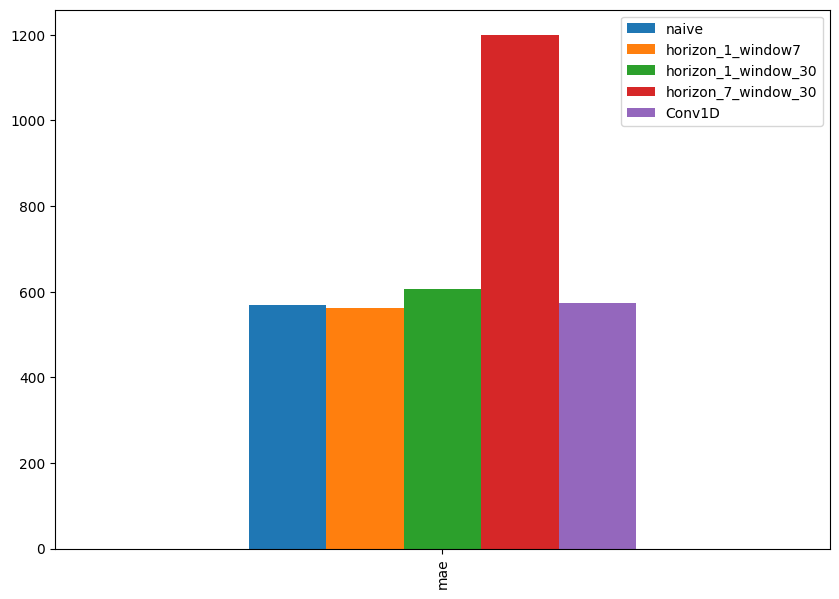

In [88]:
pd.DataFrame({"naive": naive_results["mae"],
             "horizon_1_window7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"],
              "Conv1D": model_4_results}, index=["mae"]).plot(figsize=(10,7), kind="bar");

##Model 5 RNN (LSTM)


In [89]:
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, output)

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            validation_data = (test_windows,test_labels),
            callbacks=[create_model_checkpoint("model_5")])

Epoch 1/100
18/18 [==============================] - 7s 257ms/step - loss: 2987.9043 - val_loss: 16534.0898
Epoch 2/100
18/18 [==============================] - 3s 199ms/step - loss: 2130.7981 - val_loss: 9511.6221
Epoch 3/100
18/18 [==============================] - 4s 208ms/step - loss: 699.9471 - val_loss: 1882.6925
Epoch 4/100
18/18 [==============================] - 3s 171ms/step - loss: 249.3557 - val_loss: 1278.8196
Epoch 5/100
18/18 [==============================] - 4s 230ms/step - loss: 175.6843 - val_loss: 861.3369
Epoch 6/100
18/18 [==============================] - 0s 16ms/step - loss: 160.1927 - val_loss: 981.5634
Epoch 7/100
18/18 [==============================] - 3s 163ms/step - loss: 170.9198 - val_loss: 856.1337
Epoch 8/100
18/18 [==============================] - 0s 16ms/step - loss: 154.6931 - val_loss: 856.6644
Epoch 9/100
18/18 [==============================] - 0s 11ms/step - loss: 156.8389 - val_loss: 931.9910
Epoch 10/100
18/18 [==============================]

In [90]:
model_5 = tf.keras.models.load_model("model_exp/model_5")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 600.9222


600.9221801757812

In [91]:
model_5_preds = make_pred(model_5, test_windows)
model_5_preds[:4]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(4,), dtype=float32, numpy=array([8952.799, 8819.863, 8945.933, 8784.044], dtype=float32)>

In [92]:
model_5_results = evaluate_preds(tf.squeeze(test_labels), model_5_preds)
model_5_results

{'mae': 600.92224,
 'mse': 1275220.1,
 'rmse': 1129.2565,
 'mape': 2.6915631,
 'mase': 1.0556539}

#Multivariate time series dataset

one feature we can add is elon musk tweeted on that day,

what's a better feature to add?

cnc bitcoin halving

In [93]:
#bitcoin halving events
#let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [94]:
block_reward_1 = 50 #jan 2009 - this block isn't in our dataset
block_reward_2 = 25 #8 nov 2012
block_reward_3 = 12.5 # 9 july 2016
block_reward_4 = 6.25 # 18 may 2020

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")


In [95]:
#add block reward to our data set
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [96]:
#add in a block rewars column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4


In [97]:
bitcoin_prices_block[1011:]

,Price,block_reward
Date,,
2016-07-08,640.476000,25
2016-07-09,654.852990,12.5
2016-07-10,649.356000,12.5
2016-07-11,656.747000,12.5
2016-07-12,648.136000,12.5
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


<Axes: xlabel='Date'>

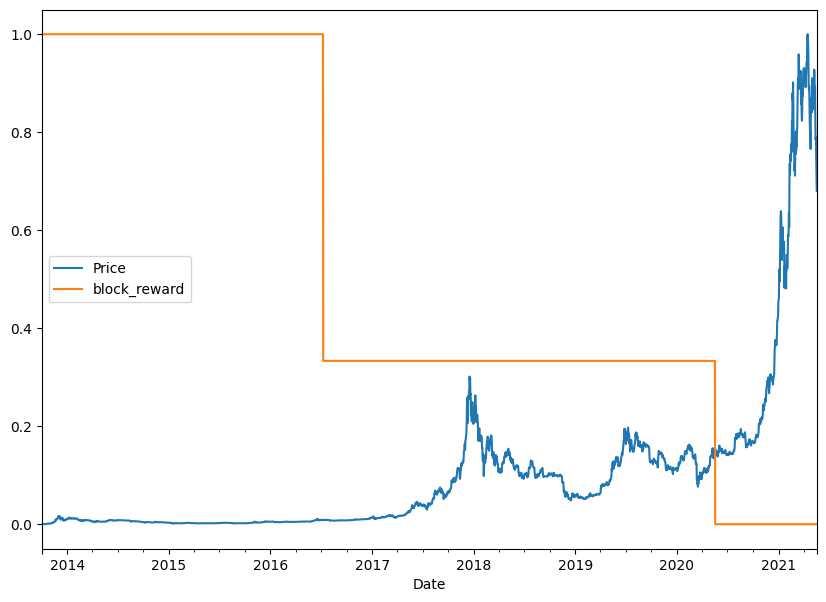

In [98]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7))

## Making a windowed dataset with pandas

previously we've turned out univariate time series into windowed dataset using the helper functions above

In [99]:
#using pandas DataFrame shift method

#make a copy of bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

In [100]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [101]:
#create X (windows) and y(horizons) features
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [102]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [103]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [104]:
X_train.shape

(2224, 8)

In [105]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  #layers.InputLayer(input_shape=(1,), dtype=tf.float32),
  #layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Dense(128, activation="relu"),
  #layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [106]:
model_6.summary()

Model: "model_6_dense_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [107]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 605.9276


605.9275512695312

In [108]:
model_6 = tf.keras.models.load_model("model_exp/model_6_dense_multivariate")
model_6_preds = model_6.predict(X_test)
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


array([[8846.781 ],
       [8764.777 ],
       [9043.355 ],
       [8784.265 ],
       [8729.657 ],
       [8760.02  ],
       [8673.838 ],
       [8517.764 ],
       [8456.6875],
       [8526.83  ]], dtype=float32)

In [109]:
model_6_results = evaluate_preds(y_test,model_6_preds)
model_6_results

{'mae': 17151.045,
 'mse': 615269060.0,
 'rmse': 23722.129,
 'mape': 113.39296,
 'mase': 30.129635}

In [110]:
model_1_results

{'mae': 563.0564,
 'mse': 1155162.0,
 'rmse': 1074.7847,
 'mape': 2.5104477,
 'mase': 0.98913413}

##Model 7 N beats algorithm

In [111]:
#Building and testing the N-Beats block layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size:int,
               theta_size:int,
               horizon:int,
               n_neurons:int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size= input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers
    #block contains stack of 4 fully connected layers
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range (n_layers)]
    #output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [112]:
#let's test our N beats block class
#set up dummy NBeatsblock layer
dummy_nbeats_block_layer = NBeatsBlock(theta_size=WINDOW_SIZE+HORIZON,
                                       input_size=WINDOW_SIZE,
                                       horizon=HORIZON,
                                       n_neurons =128,
                                       n_layers=4)

In [113]:
#create dummy inputs (have to be same size as input size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [114]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.26591918 -0.62696546 -0.71684235  0.30779654 -0.11809289  0.26544428
 -0.18722324]
forecast: -0.2395624965429306


In [115]:
#preparing data for the N-Beats using tf.data

In [116]:
#Create N=Beats data inputs which works with univariate time series
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range (WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [117]:
#Make Features and labels
X= bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

#make train and test sets
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [118]:
#Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

#combine labels and features by zipping
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

#batch and prefetch
BATCH_SIZE =1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [119]:
train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

##Setting up hyperparameters

In [120]:
#Values from N-Beats paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

## Getting ready for residual connections

In [121]:
#make tensors
tensor_1 = tf.range(10)+10
tensor_2 = tf.range(10)

#subtract
subtracted =layers.subtract([tensor_1,tensor_2])

#add
added = layers.add([tensor_1, tensor_2])

subtracted, added

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>)

 ##Building compiling and fitting the N-beats algorithm


In [122]:
%%time

tf.random.set_seed(42)

#1. setup and instance of N-beatsblock
nbeats_block_layer =NBeatsBlock(input_size=INPUT_SIZE,
                                theta_size=THETA_SIZE,
                                horizon=HORIZON,
                                n_neurons =N_NEURONS,
                                n_layers = N_LAYERS,
                                name="Initialblock")

#2. create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="input_layer")

#3. Create initial backcast and forecast input
residuals, forecast= nbeats_block_layer(stack_input)

#4. crete stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): #first stack is already created in 3
  #5. use the Nbeatsblock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
                                input_size=INPUT_SIZE,
                                theta_size=THETA_SIZE,
                                horizon=HORIZON,
                                n_neurons =N_NEURONS,
                                n_layers = N_LAYERS,
                                name=f"NbeatsBlock_{i}")(residuals)
  #6. create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

#7. put the stack model
model_7 = tf.keras.Model(inputs=stack_input, outputs = forecast, name="model_7_Nbeats")

#8. compile
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

#9. fit
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data = test_dataset,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val+loss",
                                                            patience=200,
                                                            verbose=1)])

Epoch 1/5000
3/3 [==============================] - ETA: 0s - loss: 3387.7473

3/3 [==============================] - 69s 2s/step - loss: 3387.7473 - val_loss: 13663.1514 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - ETA: 0s - loss: 3364.3992

3/3 [==============================] - 0s 163ms/step - loss: 3364.3992 - val_loss: 11941.4160 - lr: 0.0010
Epoch 3/5000
2/3 [===================>..........] - ETA: 0s - loss: 2115.2124

3/3 [==============================] - 0s 66ms/step - loss: 2603.5076 - val_loss: 16827.6719 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - ETA: 0s - loss: 2552.3621

3/3 [==============================] - 0s 69ms/step - loss: 2552.3621 - val_loss: 12692.6953 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - ETA: 0s - loss: 1273.9264

3/3 [==============================] - 0s 73ms/step - loss: 1273.9264 - val_loss: 24185.8750 - lr: 0.0010
Epoch 6/5000
2/3 [===================>..........] - ETA: 0s - loss: 7825.2007

3/3 [==============================] - 0s 138ms/step - loss: 7978.8569 - val_loss: 1094.3101 - lr: 0.0010
Epoch 7/5000
2/3 [===================>..........] - ETA: 0s - loss: 855.7550

3/3 [==============================] - 0s 67ms/step - loss: 1134.2584 - val_loss: 9684.2432 - lr: 0.0010
Epoch 8/5000
3/3 [==============================] - ETA: 0s - loss: 1564.9193

3/3 [==============================] - 0s 73ms/step - loss: 1564.9193 - val_loss: 1148.8440 - lr: 0.0010
Epoch 9/5000
3/3 [==============================] - ETA: 0s - loss: 1686.6698

3/3 [==============================] - 0s 68ms/step - loss: 1686.6698 - val_loss: 4713.6963 - lr: 0.0010
Epoch 10/5000
2/3 [===================>..........] - ETA: 0s - loss: 527.5699

3/3 [==============================] - 0s 65ms/step - loss: 558.1862 - val_loss: 4438.5005 - lr: 0.0010
Epoch 11/5000
2/3 [===================>..........] - ETA: 0s - loss: 1504.3485

3/3 [==============================] - 0s 65ms/step - loss: 1728.2705 - val_loss: 1798.3347 - lr: 0.0010
Epoch 12/5000
2/3 [===================>..........] - ETA: 0s - loss: 223.0154

3/3 [==============================] - 0s 71ms/step - loss: 289.6688 - val_loss: 2030.8395 - lr: 0.0010
Epoch 13/5000
3/3 [==============================] - ETA: 0s - loss: 245.6945

3/3 [==============================] - 0s 73ms/step - loss: 245.6945 - val_loss: 1252.0292 - lr: 0.0010
Epoch 14/5000
2/3 [===================>..........] - ETA: 0s - loss: 239.8613

3/3 [==============================] - 0s 64ms/step - loss: 261.0690 - val_loss: 1124.1313 - lr: 0.0010
Epoch 15/5000
3/3 [==============================] - ETA: 0s - loss: 199.3309

3/3 [==============================] - 0s 70ms/step - loss: 199.3309 - val_loss: 1286.5504 - lr: 0.0010
Epoch 16/5000
2/3 [===================>..........] - ETA: 0s - loss: 203.7699

3/3 [==============================] - 0s 136ms/step - loss: 225.7519 - val_loss: 1055.3781 - lr: 0.0010
Epoch 17/5000
3/3 [==============================] - ETA: 0s - loss: 192.3105

3/3 [==============================] - 0s 74ms/step - loss: 192.3105 - val_loss: 1367.8295 - lr: 0.0010
Epoch 18/5000
3/3 [==============================] - ETA: 0s - loss: 238.8730

3/3 [==============================] - 0s 73ms/step - loss: 238.8730 - val_loss: 1177.6946 - lr: 0.0010
Epoch 19/5000
2/3 [===================>..........] - ETA: 0s - loss: 244.3588

3/3 [==============================] - 0s 67ms/step - loss: 285.5024 - val_loss: 1124.0782 - lr: 0.0010
Epoch 20/5000
2/3 [===================>..........] - ETA: 0s - loss: 240.6640

3/3 [==============================] - 0s 63ms/step - loss: 302.4446 - val_loss: 1590.5521 - lr: 0.0010
Epoch 21/5000
2/3 [===================>..........] - ETA: 0s - loss: 163.6869

3/3 [==============================] - 0s 149ms/step - loss: 192.8695 - val_loss: 1039.0847 - lr: 0.0010
Epoch 22/5000
2/3 [===================>..........] - ETA: 0s - loss: 166.0294

3/3 [==============================] - 0s 67ms/step - loss: 189.9265 - val_loss: 1250.6764 - lr: 0.0010
Epoch 23/5000
2/3 [===================>..........] - ETA: 0s - loss: 219.6440

3/3 [==============================] - 0s 143ms/step - loss: 257.8781 - val_loss: 991.2482 - lr: 0.0010
Epoch 24/5000
3/3 [==============================] - ETA: 0s - loss: 230.6900

3/3 [==============================] - 0s 139ms/step - loss: 230.6900 - val_loss: 1026.4938 - lr: 0.0010
Epoch 25/5000
2/3 [===================>..........] - ETA: 0s - loss: 150.8453

3/3 [==============================] - 0s 69ms/step - loss: 178.5896 - val_loss: 1047.7937 - lr: 0.0010
Epoch 26/5000
3/3 [==============================] - ETA: 0s - loss: 168.0222

3/3 [==============================] - 1s 240ms/step - loss: 168.0222 - val_loss: 956.7871 - lr: 0.0010
Epoch 27/5000
3/3 [==============================] - ETA: 0s - loss: 178.9484

3/3 [==============================] - 1s 189ms/step - loss: 178.9484 - val_loss: 899.5017 - lr: 0.0010
Epoch 28/5000
3/3 [==============================] - ETA: 0s - loss: 205.1097

3/3 [==============================] - 0s 124ms/step - loss: 205.1097 - val_loss: 948.1019 - lr: 0.0010
Epoch 29/5000
3/3 [==============================] - ETA: 0s - loss: 229.5820

3/3 [==============================] - 0s 71ms/step - loss: 229.5820 - val_loss: 1053.7129 - lr: 0.0010
Epoch 30/5000
3/3 [==============================] - ETA: 0s - loss: 179.5585

3/3 [==============================] - 1s 239ms/step - loss: 179.5585 - val_loss: 872.8713 - lr: 0.0010
Epoch 31/5000
3/3 [==============================] - ETA: 0s - loss: 168.4652

3/3 [==============================] - 1s 276ms/step - loss: 168.4652 - val_loss: 872.8677 - lr: 0.0010
Epoch 32/5000
3/3 [==============================] - ETA: 0s - loss: 175.4030

3/3 [==============================] - 1s 193ms/step - loss: 175.4030 - val_loss: 954.4512 - lr: 0.0010
Epoch 33/5000
3/3 [==============================] - ETA: 0s - loss: 216.7128

3/3 [==============================] - 1s 298ms/step - loss: 216.7128 - val_loss: 866.1725 - lr: 0.0010
Epoch 34/5000
3/3 [==============================] - ETA: 0s - loss: 213.0162

3/3 [==============================] - 1s 191ms/step - loss: 213.0162 - val_loss: 883.2966 - lr: 0.0010
Epoch 35/5000
3/3 [==============================] - ETA: 0s - loss: 164.0448

3/3 [==============================] - 0s 109ms/step - loss: 164.0448 - val_loss: 900.6685 - lr: 0.0010
Epoch 36/5000
3/3 [==============================] - ETA: 0s - loss: 152.8912

3/3 [==============================] - 0s 75ms/step - loss: 152.8912 - val_loss: 927.2335 - lr: 0.0010
Epoch 37/5000
3/3 [==============================] - ETA: 0s - loss: 196.1104

3/3 [==============================] - 0s 70ms/step - loss: 196.1104 - val_loss: 895.3414 - lr: 0.0010
Epoch 38/5000
3/3 [==============================] - ETA: 0s - loss: 286.1430

3/3 [==============================] - 0s 114ms/step - loss: 286.1430 - val_loss: 905.2891 - lr: 0.0010
Epoch 39/5000
3/3 [==============================] - ETA: 0s - loss: 298.0362

3/3 [==============================] - 0s 69ms/step - loss: 298.0362 - val_loss: 1669.4813 - lr: 0.0010
Epoch 40/5000
3/3 [==============================] - ETA: 0s - loss: 181.8639

3/3 [==============================] - 0s 122ms/step - loss: 181.8639 - val_loss: 922.0046 - lr: 0.0010
Epoch 41/5000
3/3 [==============================] - ETA: 0s - loss: 172.2624

3/3 [==============================] - 0s 75ms/step - loss: 172.2624 - val_loss: 1325.4957 - lr: 0.0010
Epoch 42/5000
3/3 [==============================] - ETA: 0s - loss: 310.6870

3/3 [==============================] - 0s 117ms/step - loss: 310.6870 - val_loss: 938.9800 - lr: 0.0010
Epoch 43/5000
3/3 [==============================] - ETA: 0s - loss: 354.5872

3/3 [==============================] - 0s 72ms/step - loss: 354.5872 - val_loss: 1154.9517 - lr: 0.0010
Epoch 44/5000
3/3 [==============================] - ETA: 0s - loss: 168.3531

3/3 [==============================] - 0s 118ms/step - loss: 168.3531 - val_loss: 1069.4688 - lr: 0.0010
Epoch 45/5000
3/3 [==============================] - ETA: 0s - loss: 151.8098

3/3 [==============================] - 1s 427ms/step - loss: 151.8098 - val_loss: 792.8187 - lr: 0.0010
Epoch 46/5000
3/3 [==============================] - ETA: 0s - loss: 147.0329

3/3 [==============================] - 1s 216ms/step - loss: 147.0329 - val_loss: 783.2399 - lr: 0.0010
Epoch 47/5000
3/3 [==============================] - ETA: 0s - loss: 146.7880

3/3 [==============================] - 0s 123ms/step - loss: 146.7880 - val_loss: 1037.9843 - lr: 0.0010
Epoch 48/5000
3/3 [==============================] - ETA: 0s - loss: 214.4151

3/3 [==============================] - 0s 115ms/step - loss: 214.4151 - val_loss: 933.1126 - lr: 0.0010
Epoch 49/5000
3/3 [==============================] - ETA: 0s - loss: 320.2364

3/3 [==============================] - 0s 140ms/step - loss: 320.2364 - val_loss: 805.3333 - lr: 0.0010
Epoch 50/5000
3/3 [==============================] - ETA: 0s - loss: 203.9019

3/3 [==============================] - 0s 162ms/step - loss: 203.9019 - val_loss: 1031.1439 - lr: 0.0010
Epoch 51/5000
3/3 [==============================] - ETA: 0s - loss: 151.3061

3/3 [==============================] - 1s 169ms/step - loss: 151.3061 - val_loss: 791.8612 - lr: 0.0010
Epoch 52/5000
3/3 [==============================] - ETA: 0s - loss: 188.8566

3/3 [==============================] - 0s 166ms/step - loss: 188.8566 - val_loss: 808.1288 - lr: 0.0010
Epoch 53/5000
3/3 [==============================] - ETA: 0s - loss: 279.4413

3/3 [==============================] - 0s 143ms/step - loss: 279.4413 - val_loss: 800.8551 - lr: 0.0010
Epoch 54/5000
3/3 [==============================] - ETA: 0s - loss: 289.4619

3/3 [==============================] - 0s 178ms/step - loss: 289.4619 - val_loss: 1396.2887 - lr: 0.0010
Epoch 55/5000
3/3 [==============================] - ETA: 0s - loss: 161.5647

3/3 [==============================] - 0s 129ms/step - loss: 161.5647 - val_loss: 893.4792 - lr: 0.0010
Epoch 56/5000
3/3 [==============================] - ETA: 0s - loss: 143.1941

3/3 [==============================] - 1s 237ms/step - loss: 143.1941 - val_loss: 894.8645 - lr: 0.0010
Epoch 57/5000
3/3 [==============================] - ETA: 0s - loss: 153.2920

3/3 [==============================] - 1s 216ms/step - loss: 153.2920 - val_loss: 787.7923 - lr: 0.0010
Epoch 58/5000
3/3 [==============================] - ETA: 0s - loss: 187.2061

3/3 [==============================] - 1s 231ms/step - loss: 187.2061 - val_loss: 865.5418 - lr: 0.0010
Epoch 59/5000
3/3 [==============================] - ETA: 0s - loss: 246.7939

3/3 [==============================] - 1s 295ms/step - loss: 246.7939 - val_loss: 979.8876 - lr: 0.0010
Epoch 60/5000
3/3 [==============================] - ETA: 0s - loss: 159.1998

3/3 [==============================] - 0s 163ms/step - loss: 159.1998 - val_loss: 788.0252 - lr: 0.0010
Epoch 61/5000
3/3 [==============================] - ETA: 0s - loss: 139.0431

3/3 [==============================] - 1s 300ms/step - loss: 139.0431 - val_loss: 732.2624 - lr: 0.0010
Epoch 62/5000
3/3 [==============================] - ETA: 0s - loss: 148.6264

3/3 [==============================] - 1s 195ms/step - loss: 148.6264 - val_loss: 797.2549 - lr: 0.0010
Epoch 63/5000
3/3 [==============================] - ETA: 0s - loss: 189.3383

3/3 [==============================] - 1s 202ms/step - loss: 189.3383 - val_loss: 731.0018 - lr: 0.0010
Epoch 64/5000
3/3 [==============================] - ETA: 0s - loss: 192.4577

3/3 [==============================] - 1s 273ms/step - loss: 192.4577 - val_loss: 727.9963 - lr: 0.0010
Epoch 65/5000
3/3 [==============================] - ETA: 0s - loss: 177.3510

3/3 [==============================] - 0s 125ms/step - loss: 177.3510 - val_loss: 783.6387 - lr: 0.0010
Epoch 66/5000
3/3 [==============================] - ETA: 0s - loss: 160.5733

3/3 [==============================] - 1s 285ms/step - loss: 160.5733 - val_loss: 718.9258 - lr: 0.0010
Epoch 67/5000
3/3 [==============================] - ETA: 0s - loss: 158.9805

3/3 [==============================] - 1s 199ms/step - loss: 158.9805 - val_loss: 734.3519 - lr: 0.0010
Epoch 68/5000
3/3 [==============================] - ETA: 0s - loss: 157.5898

3/3 [==============================] - 0s 175ms/step - loss: 157.5898 - val_loss: 724.7612 - lr: 0.0010
Epoch 69/5000
3/3 [==============================] - ETA: 0s - loss: 177.4092

3/3 [==============================] - 0s 117ms/step - loss: 177.4092 - val_loss: 736.6729 - lr: 0.0010
Epoch 70/5000
3/3 [==============================] - ETA: 0s - loss: 169.6222

3/3 [==============================] - 1s 308ms/step - loss: 169.6222 - val_loss: 711.5258 - lr: 0.0010
Epoch 71/5000
3/3 [==============================] - ETA: 0s - loss: 163.8309

3/3 [==============================] - 0s 141ms/step - loss: 163.8309 - val_loss: 746.7206 - lr: 0.0010
Epoch 72/5000
3/3 [==============================] - ETA: 0s - loss: 153.7559

3/3 [==============================] - 1s 252ms/step - loss: 153.7559 - val_loss: 706.4077 - lr: 0.0010
Epoch 73/5000
3/3 [==============================] - ETA: 0s - loss: 163.1504

3/3 [==============================] - 0s 115ms/step - loss: 163.1504 - val_loss: 719.2109 - lr: 0.0010
Epoch 74/5000
3/3 [==============================] - ETA: 0s - loss: 160.6399

3/3 [==============================] - 1s 219ms/step - loss: 160.6399 - val_loss: 704.5472 - lr: 0.0010
Epoch 75/5000
3/3 [==============================] - ETA: 0s - loss: 172.5338

3/3 [==============================] - 1s 197ms/step - loss: 172.5338 - val_loss: 722.9398 - lr: 0.0010
Epoch 76/5000
3/3 [==============================] - ETA: 0s - loss: 165.7685

3/3 [==============================] - 1s 389ms/step - loss: 165.7685 - val_loss: 697.2886 - lr: 0.0010
Epoch 77/5000
3/3 [==============================] - ETA: 0s - loss: 162.6078

3/3 [==============================] - 0s 108ms/step - loss: 162.6078 - val_loss: 724.8484 - lr: 0.0010
Epoch 78/5000
3/3 [==============================] - ETA: 0s - loss: 154.7572

3/3 [==============================] - 1s 298ms/step - loss: 154.7572 - val_loss: 696.1663 - lr: 0.0010
Epoch 79/5000
3/3 [==============================] - ETA: 0s - loss: 166.1117

3/3 [==============================] - 1s 282ms/step - loss: 166.1117 - val_loss: 710.8257 - lr: 0.0010
Epoch 80/5000
3/3 [==============================] - ETA: 0s - loss: 161.3043

3/3 [==============================] - 1s 311ms/step - loss: 161.3043 - val_loss: 691.3010 - lr: 0.0010
Epoch 81/5000
3/3 [==============================] - ETA: 0s - loss: 170.3888

3/3 [==============================] - 1s 152ms/step - loss: 170.3888 - val_loss: 707.8763 - lr: 0.0010
Epoch 82/5000
3/3 [==============================] - ETA: 0s - loss: 167.4752

3/3 [==============================] - 0s 208ms/step - loss: 167.4752 - val_loss: 687.0923 - lr: 0.0010
Epoch 83/5000
3/3 [==============================] - ETA: 0s - loss: 173.5363

3/3 [==============================] - 0s 170ms/step - loss: 173.5363 - val_loss: 717.7686 - lr: 0.0010
Epoch 84/5000
3/3 [==============================] - ETA: 0s - loss: 165.9701

3/3 [==============================] - 1s 257ms/step - loss: 165.9701 - val_loss: 684.3400 - lr: 0.0010
Epoch 85/5000
3/3 [==============================] - ETA: 0s - loss: 170.2112

3/3 [==============================] - 1s 225ms/step - loss: 170.2112 - val_loss: 723.5345 - lr: 0.0010
Epoch 86/5000
3/3 [==============================] - ETA: 0s - loss: 159.1425

3/3 [==============================] - 0s 135ms/step - loss: 159.1425 - val_loss: 684.9892 - lr: 0.0010
Epoch 87/5000
3/3 [==============================] - ETA: 0s - loss: 157.2926

3/3 [==============================] - 0s 130ms/step - loss: 157.2926 - val_loss: 704.0054 - lr: 0.0010
Epoch 88/5000
3/3 [==============================] - ETA: 0s - loss: 152.9983

3/3 [==============================] - 0s 121ms/step - loss: 152.9983 - val_loss: 688.8187 - lr: 0.0010
Epoch 89/5000
3/3 [==============================] - ETA: 0s - loss: 172.2951

3/3 [==============================] - 0s 87ms/step - loss: 172.2951 - val_loss: 690.8942 - lr: 0.0010
Epoch 90/5000
3/3 [==============================] - ETA: 0s - loss: 173.5761

3/3 [==============================] - 1s 307ms/step - loss: 173.5761 - val_loss: 677.7220 - lr: 0.0010
Epoch 91/5000
3/3 [==============================] - ETA: 0s - loss: 173.5905

3/3 [==============================] - 0s 138ms/step - loss: 173.5905 - val_loss: 733.5424 - lr: 0.0010
Epoch 92/5000
3/3 [==============================] - ETA: 0s - loss: 156.7209

3/3 [==============================] - 0s 118ms/step - loss: 156.7209 - val_loss: 678.3348 - lr: 0.0010
Epoch 93/5000
3/3 [==============================] - ETA: 0s - loss: 157.8634

3/3 [==============================] - 0s 129ms/step - loss: 157.8634 - val_loss: 697.9391 - lr: 0.0010
Epoch 94/5000
2/3 [===================>..........] - ETA: 0s - loss: 124.9183

3/3 [==============================] - 0s 65ms/step - loss: 155.5809 - val_loss: 678.4713 - lr: 0.0010
Epoch 95/5000
3/3 [==============================] - ETA: 0s - loss: 166.7730

3/3 [==============================] - 0s 121ms/step - loss: 166.7730 - val_loss: 686.8110 - lr: 0.0010
Epoch 96/5000
3/3 [==============================] - ETA: 0s - loss: 167.7598

3/3 [==============================] - 1s 233ms/step - loss: 167.7598 - val_loss: 676.2022 - lr: 0.0010
Epoch 97/5000
3/3 [==============================] - ETA: 0s - loss: 180.0575

3/3 [==============================] - 1s 191ms/step - loss: 180.0575 - val_loss: 734.0042 - lr: 0.0010
Epoch 98/5000
3/3 [==============================] - ETA: 0s - loss: 159.6348

3/3 [==============================] - 0s 152ms/step - loss: 159.6348 - val_loss: 678.1947 - lr: 0.0010
Epoch 99/5000
3/3 [==============================] - ETA: 0s - loss: 159.2774

3/3 [==============================] - 1s 181ms/step - loss: 159.2774 - val_loss: 706.4656 - lr: 0.0010
Epoch 100/5000
3/3 [==============================] - ETA: 0s - loss: 151.0678

3/3 [==============================] - 1s 196ms/step - loss: 151.0678 - val_loss: 679.1334 - lr: 0.0010
Epoch 101/5000
3/3 [==============================] - ETA: 0s - loss: 163.1143

3/3 [==============================] - 0s 190ms/step - loss: 163.1143 - val_loss: 678.6166 - lr: 0.0010
Epoch 102/5000
3/3 [==============================] - ETA: 0s - loss: 172.8453

3/3 [==============================] - 0s 146ms/step - loss: 172.8453 - val_loss: 696.4171 - lr: 0.0010
Epoch 103/5000
3/3 [==============================] - ETA: 0s - loss: 205.0953

3/3 [==============================] - 0s 115ms/step - loss: 205.0953 - val_loss: 822.4191 - lr: 0.0010
Epoch 104/5000
3/3 [==============================] - ETA: 0s - loss: 150.1475

3/3 [==============================] - 0s 122ms/step - loss: 150.1475 - val_loss: 689.8214 - lr: 0.0010
Epoch 105/5000
3/3 [==============================] - ETA: 0s - loss: 142.3302

3/3 [==============================] - 0s 107ms/step - loss: 142.3302 - val_loss: 678.6915 - lr: 0.0010
Epoch 106/5000
3/3 [==============================] - ETA: 0s - loss: 147.3140

3/3 [==============================] - 0s 124ms/step - loss: 147.3140 - val_loss: 693.3398 - lr: 0.0010
Epoch 107/5000
2/3 [===================>..........] - ETA: 0s - loss: 142.1898

3/3 [==============================] - 0s 161ms/step - loss: 171.1565 - val_loss: 673.8168 - lr: 0.0010
Epoch 108/5000
3/3 [==============================] - ETA: 0s - loss: 195.4671

3/3 [==============================] - 0s 149ms/step - loss: 195.4671 - val_loss: 703.1398 - lr: 0.0010
Epoch 109/5000
2/3 [===================>..........] - ETA: 0s - loss: 178.8304

3/3 [==============================] - 0s 69ms/step - loss: 225.2765 - val_loss: 882.9157 - lr: 0.0010
Epoch 110/5000
3/3 [==============================] - ETA: 0s - loss: 148.0715

3/3 [==============================] - 0s 134ms/step - loss: 148.0715 - val_loss: 683.8043 - lr: 0.0010
Epoch 111/5000
3/3 [==============================] - ETA: 0s - loss: 142.9241

3/3 [==============================] - 1s 209ms/step - loss: 142.9241 - val_loss: 666.5931 - lr: 0.0010
Epoch 112/5000
3/3 [==============================] - ETA: 0s - loss: 163.5745

3/3 [==============================] - 0s 73ms/step - loss: 163.5745 - val_loss: 731.4331 - lr: 0.0010
Epoch 113/5000
3/3 [==============================] - ETA: 0s - loss: 212.1367

3/3 [==============================] - 0s 122ms/step - loss: 212.1367 - val_loss: 745.5864 - lr: 0.0010
Epoch 114/5000
3/3 [==============================] - ETA: 0s - loss: 168.1715

3/3 [==============================] - 0s 111ms/step - loss: 168.1715 - val_loss: 670.4070 - lr: 0.0010
Epoch 115/5000
3/3 [==============================] - ETA: 0s - loss: 162.7984

3/3 [==============================] - 0s 149ms/step - loss: 162.7984 - val_loss: 694.1567 - lr: 0.0010
Epoch 116/5000
3/3 [==============================] - ETA: 0s - loss: 155.3396

3/3 [==============================] - 0s 114ms/step - loss: 155.3396 - val_loss: 667.1552 - lr: 0.0010
Epoch 117/5000
3/3 [==============================] - ETA: 0s - loss: 168.0741

3/3 [==============================] - 0s 79ms/step - loss: 168.0741 - val_loss: 680.4260 - lr: 0.0010
Epoch 118/5000
3/3 [==============================] - ETA: 0s - loss: 164.4469

3/3 [==============================] - 0s 184ms/step - loss: 164.4469 - val_loss: 666.1034 - lr: 0.0010
Epoch 119/5000
3/3 [==============================] - ETA: 0s - loss: 178.8138

3/3 [==============================] - 0s 116ms/step - loss: 178.8138 - val_loss: 689.8910 - lr: 0.0010
Epoch 120/5000
3/3 [==============================] - ETA: 0s - loss: 170.0438

3/3 [==============================] - 1s 221ms/step - loss: 170.0438 - val_loss: 660.7631 - lr: 0.0010
Epoch 121/5000
3/3 [==============================] - ETA: 0s - loss: 170.2667

3/3 [==============================] - 0s 132ms/step - loss: 170.2667 - val_loss: 706.5975 - lr: 0.0010
Epoch 122/5000
3/3 [==============================] - ETA: 0s - loss: 156.3059

3/3 [==============================] - 1s 228ms/step - loss: 156.3059 - val_loss: 660.3871 - lr: 0.0010
Epoch 123/5000
3/3 [==============================] - ETA: 0s - loss: 166.2919

3/3 [==============================] - 0s 133ms/step - loss: 166.2919 - val_loss: 693.8386 - lr: 0.0010
Epoch 124/5000
2/3 [===================>..........] - ETA: 0s - loss: 124.2288

3/3 [==============================] - 0s 140ms/step - loss: 156.3551 - val_loss: 659.6767 - lr: 0.0010
Epoch 125/5000
3/3 [==============================] - ETA: 0s - loss: 164.9931

3/3 [==============================] - 0s 154ms/step - loss: 164.9931 - val_loss: 690.6309 - lr: 0.0010
Epoch 126/5000
3/3 [==============================] - ETA: 0s - loss: 156.6758

3/3 [==============================] - 1s 205ms/step - loss: 156.6758 - val_loss: 660.1437 - lr: 0.0010
Epoch 127/5000
3/3 [==============================] - ETA: 0s - loss: 166.3405

3/3 [==============================] - 1s 222ms/step - loss: 166.3405 - val_loss: 692.3568 - lr: 0.0010
Epoch 128/5000
3/3 [==============================] - ETA: 0s - loss: 156.6510

3/3 [==============================] - 1s 235ms/step - loss: 156.6510 - val_loss: 659.5519 - lr: 0.0010
Epoch 129/5000
3/3 [==============================] - ETA: 0s - loss: 166.2907

3/3 [==============================] - 1s 307ms/step - loss: 166.2907 - val_loss: 693.6677 - lr: 0.0010
Epoch 130/5000
3/3 [==============================] - ETA: 0s - loss: 155.6622

3/3 [==============================] - 1s 218ms/step - loss: 155.6622 - val_loss: 658.4275 - lr: 0.0010
Epoch 131/5000
3/3 [==============================] - ETA: 0s - loss: 164.5788

3/3 [==============================] - 0s 137ms/step - loss: 164.5788 - val_loss: 692.2183 - lr: 0.0010
Epoch 132/5000
3/3 [==============================] - ETA: 0s - loss: 153.4825

3/3 [==============================] - 0s 164ms/step - loss: 153.4825 - val_loss: 657.0872 - lr: 0.0010
Epoch 133/5000
3/3 [==============================] - ETA: 0s - loss: 161.8264

3/3 [==============================] - 0s 131ms/step - loss: 161.8264 - val_loss: 678.6986 - lr: 0.0010
Epoch 134/5000
3/3 [==============================] - ETA: 0s - loss: 157.1005

3/3 [==============================] - 0s 76ms/step - loss: 157.1005 - val_loss: 658.3707 - lr: 0.0010
Epoch 135/5000
3/3 [==============================] - ETA: 0s - loss: 168.7914

3/3 [==============================] - 0s 110ms/step - loss: 168.7914 - val_loss: 683.9929 - lr: 0.0010
Epoch 136/5000
2/3 [===================>..........] - ETA: 0s - loss: 128.1351

3/3 [==============================] - 0s 165ms/step - loss: 161.9327 - val_loss: 656.7568 - lr: 0.0010
Epoch 137/5000
3/3 [==============================] - ETA: 0s - loss: 164.9289

3/3 [==============================] - 0s 129ms/step - loss: 164.9289 - val_loss: 703.1569 - lr: 0.0010
Epoch 138/5000
3/3 [==============================] - ETA: 0s - loss: 149.7929

3/3 [==============================] - 0s 180ms/step - loss: 149.7929 - val_loss: 655.7740 - lr: 0.0010
Epoch 139/5000
3/3 [==============================] - ETA: 0s - loss: 157.3060

3/3 [==============================] - 0s 72ms/step - loss: 157.3060 - val_loss: 670.1814 - lr: 0.0010
Epoch 140/5000
3/3 [==============================] - ETA: 0s - loss: 157.3991

3/3 [==============================] - 0s 115ms/step - loss: 157.3991 - val_loss: 656.0794 - lr: 0.0010
Epoch 141/5000
2/3 [===================>..........] - ETA: 0s - loss: 135.5244

3/3 [==============================] - 0s 64ms/step - loss: 167.6734 - val_loss: 690.6089 - lr: 0.0010
Epoch 142/5000
3/3 [==============================] - ETA: 0s - loss: 155.5679

3/3 [==============================] - 1s 237ms/step - loss: 155.5679 - val_loss: 653.9559 - lr: 0.0010
Epoch 143/5000
3/3 [==============================] - ETA: 0s - loss: 159.0674

3/3 [==============================] - 0s 118ms/step - loss: 159.0674 - val_loss: 664.8127 - lr: 0.0010
Epoch 144/5000
3/3 [==============================] - ETA: 0s - loss: 165.3884

3/3 [==============================] - 0s 112ms/step - loss: 165.3884 - val_loss: 679.8723 - lr: 0.0010
Epoch 145/5000
3/3 [==============================] - ETA: 0s - loss: 198.4086

3/3 [==============================] - 0s 114ms/step - loss: 198.4086 - val_loss: 768.7988 - lr: 0.0010
Epoch 146/5000
2/3 [===================>..........] - ETA: 0s - loss: 118.3366

3/3 [==============================] - 0s 93ms/step - loss: 151.9877 - val_loss: 664.1068 - lr: 0.0010
Epoch 147/5000
3/3 [==============================] - ETA: 0s - loss: 147.9456

3/3 [==============================] - 0s 88ms/step - loss: 147.9456 - val_loss: 669.1672 - lr: 0.0010
Epoch 148/5000
3/3 [==============================] - ETA: 0s - loss: 148.3961

3/3 [==============================] - 0s 122ms/step - loss: 148.3961 - val_loss: 661.4102 - lr: 0.0010
Epoch 149/5000
2/3 [===================>..........] - ETA: 0s - loss: 135.8138

3/3 [==============================] - 0s 71ms/step - loss: 166.5508 - val_loss: 665.9639 - lr: 0.0010
Epoch 150/5000
3/3 [==============================] - ETA: 0s - loss: 165.3193

3/3 [==============================] - 1s 223ms/step - loss: 165.3193 - val_loss: 650.6909 - lr: 0.0010
Epoch 151/5000
3/3 [==============================] - ETA: 0s - loss: 168.4305

3/3 [==============================] - 0s 125ms/step - loss: 168.4305 - val_loss: 708.1526 - lr: 0.0010
Epoch 152/5000
3/3 [==============================] - ETA: 0s - loss: 150.2051

3/3 [==============================] - 0s 118ms/step - loss: 150.2051 - val_loss: 651.9783 - lr: 0.0010
Epoch 153/5000
3/3 [==============================] - ETA: 0s - loss: 155.4810

3/3 [==============================] - 0s 113ms/step - loss: 155.4810 - val_loss: 665.7344 - lr: 0.0010
Epoch 154/5000
3/3 [==============================] - ETA: 0s - loss: 156.5862

3/3 [==============================] - 0s 142ms/step - loss: 156.5862 - val_loss: 652.5397 - lr: 0.0010
Epoch 155/5000
3/3 [==============================] - ETA: 0s - loss: 167.8175

3/3 [==============================] - 0s 165ms/step - loss: 167.8175 - val_loss: 692.6393 - lr: 0.0010
Epoch 156/5000
3/3 [==============================] - ETA: 0s - loss: 152.3248

3/3 [==============================] - 1s 370ms/step - loss: 152.3248 - val_loss: 649.2578 - lr: 0.0010
Epoch 157/5000
3/3 [==============================] - ETA: 0s - loss: 156.4452

3/3 [==============================] - 0s 180ms/step - loss: 156.4452 - val_loss: 669.2532 - lr: 0.0010
Epoch 158/5000
3/3 [==============================] - ETA: 0s - loss: 153.4760

3/3 [==============================] - 1s 175ms/step - loss: 153.4760 - val_loss: 650.8138 - lr: 0.0010
Epoch 159/5000
3/3 [==============================] - ETA: 0s - loss: 166.9908

3/3 [==============================] - 0s 115ms/step - loss: 166.9908 - val_loss: 684.6893 - lr: 0.0010
Epoch 160/5000
3/3 [==============================] - ETA: 0s - loss: 153.4210

3/3 [==============================] - 1s 205ms/step - loss: 153.4210 - val_loss: 646.8222 - lr: 0.0010
Epoch 161/5000
2/3 [===================>..........] - ETA: 0s - loss: 129.7975

3/3 [==============================] - 0s 70ms/step - loss: 160.5823 - val_loss: 681.7901 - lr: 0.0010
Epoch 162/5000
2/3 [===================>..........] - ETA: 0s - loss: 119.7399

3/3 [==============================] - 0s 68ms/step - loss: 150.0760 - val_loss: 648.2651 - lr: 0.0010
Epoch 163/5000
2/3 [===================>..........] - ETA: 0s - loss: 131.0218

3/3 [==============================] - 0s 64ms/step - loss: 161.4421 - val_loss: 670.4497 - lr: 0.0010
Epoch 164/5000
2/3 [===================>..........] - ETA: 0s - loss: 123.6132

3/3 [==============================] - 0s 63ms/step - loss: 155.1262 - val_loss: 647.7390 - lr: 0.0010
Epoch 165/5000
3/3 [==============================] - ETA: 0s - loss: 167.5965

3/3 [==============================] - 0s 69ms/step - loss: 167.5965 - val_loss: 692.3361 - lr: 0.0010
Epoch 166/5000
3/3 [==============================] - ETA: 0s - loss: 150.4988

3/3 [==============================] - 1s 217ms/step - loss: 150.4988 - val_loss: 645.2256 - lr: 0.0010
Epoch 167/5000
3/3 [==============================] - ETA: 0s - loss: 156.4915

3/3 [==============================] - 0s 113ms/step - loss: 156.4915 - val_loss: 664.7921 - lr: 0.0010
Epoch 168/5000
2/3 [===================>..........] - ETA: 0s - loss: 122.7039

3/3 [==============================] - 0s 84ms/step - loss: 153.2352 - val_loss: 647.2527 - lr: 0.0010
Epoch 169/5000
3/3 [==============================] - ETA: 0s - loss: 166.8316

3/3 [==============================] - 0s 101ms/step - loss: 166.8316 - val_loss: 683.7632 - lr: 0.0010
Epoch 170/5000
2/3 [===================>..........] - ETA: 0s - loss: 120.8627

3/3 [==============================] - 0s 152ms/step - loss: 152.3959 - val_loss: 643.9551 - lr: 0.0010
Epoch 171/5000
3/3 [==============================] - ETA: 0s - loss: 157.6542

3/3 [==============================] - 0s 128ms/step - loss: 157.6542 - val_loss: 669.1532 - lr: 0.0010
Epoch 172/5000
2/3 [===================>..........] - ETA: 0s - loss: 121.1441

3/3 [==============================] - 0s 138ms/step - loss: 151.7173 - val_loss: 643.8879 - lr: 0.0010
Epoch 173/5000
2/3 [===================>..........] - ETA: 0s - loss: 131.1232

3/3 [==============================] - 0s 70ms/step - loss: 161.9226 - val_loss: 670.5173 - lr: 0.0010
Epoch 174/5000
3/3 [==============================] - ETA: 0s - loss: 153.3596

3/3 [==============================] - 1s 225ms/step - loss: 153.3596 - val_loss: 642.1675 - lr: 0.0010
Epoch 175/5000
3/3 [==============================] - ETA: 0s - loss: 161.5922

3/3 [==============================] - 0s 133ms/step - loss: 161.5922 - val_loss: 669.3273 - lr: 0.0010
Epoch 176/5000
2/3 [===================>..........] - ETA: 0s - loss: 122.4397

3/3 [==============================] - 0s 64ms/step - loss: 153.7067 - val_loss: 643.1083 - lr: 0.0010
Epoch 177/5000
3/3 [==============================] - ETA: 0s - loss: 164.4245

3/3 [==============================] - 0s 124ms/step - loss: 164.4245 - val_loss: 674.5496 - lr: 0.0010
Epoch 178/5000
3/3 [==============================] - ETA: 0s - loss: 153.0947

3/3 [==============================] - 0s 174ms/step - loss: 153.0947 - val_loss: 641.5563 - lr: 0.0010
Epoch 179/5000
2/3 [===================>..........] - ETA: 0s - loss: 128.5282

3/3 [==============================] - 0s 70ms/step - loss: 159.0802 - val_loss: 677.0886 - lr: 0.0010
Epoch 180/5000
3/3 [==============================] - ETA: 0s - loss: 147.7726

3/3 [==============================] - 0s 100ms/step - loss: 147.7726 - val_loss: 643.1266 - lr: 0.0010
Epoch 181/5000
3/3 [==============================] - ETA: 0s - loss: 162.0698

3/3 [==============================] - 0s 118ms/step - loss: 162.0698 - val_loss: 661.3368 - lr: 0.0010
Epoch 182/5000
2/3 [===================>..........] - ETA: 0s - loss: 125.2230

3/3 [==============================] - 0s 146ms/step - loss: 157.2632 - val_loss: 640.6497 - lr: 0.0010
Epoch 183/5000
3/3 [==============================] - ETA: 0s - loss: 166.7372

3/3 [==============================] - 0s 114ms/step - loss: 166.7372 - val_loss: 692.9520 - lr: 0.0010
Epoch 184/5000
3/3 [==============================] - ETA: 0s - loss: 147.6153

3/3 [==============================] - 0s 194ms/step - loss: 147.6153 - val_loss: 640.1847 - lr: 0.0010
Epoch 185/5000
3/3 [==============================] - ETA: 0s - loss: 155.2572

3/3 [==============================] - 0s 106ms/step - loss: 155.2572 - val_loss: 657.2145 - lr: 0.0010
Epoch 186/5000
3/3 [==============================] - ETA: 0s - loss: 150.8836

3/3 [==============================] - 0s 95ms/step - loss: 150.8836 - val_loss: 655.8606 - lr: 0.0010
Epoch 187/5000
3/3 [==============================] - ETA: 0s - loss: 180.3384

3/3 [==============================] - 0s 138ms/step - loss: 180.3384 - val_loss: 656.9153 - lr: 0.0010
Epoch 188/5000
3/3 [==============================] - ETA: 0s - loss: 174.3876

3/3 [==============================] - 1s 208ms/step - loss: 174.3876 - val_loss: 653.0010 - lr: 0.0010
Epoch 189/5000
3/3 [==============================] - ETA: 0s - loss: 159.0075

3/3 [==============================] - 0s 109ms/step - loss: 159.0075 - val_loss: 700.9312 - lr: 0.0010
Epoch 190/5000
3/3 [==============================] - ETA: 0s - loss: 140.9571

3/3 [==============================] - 0s 128ms/step - loss: 140.9571 - val_loss: 642.5137 - lr: 0.0010
Epoch 191/5000
3/3 [==============================] - ETA: 0s - loss: 157.0667

3/3 [==============================] - 0s 150ms/step - loss: 157.0667 - val_loss: 640.2979 - lr: 0.0010
Epoch 192/5000
3/3 [==============================] - ETA: 0s - loss: 168.9997

3/3 [==============================] - 0s 160ms/step - loss: 168.9997 - val_loss: 639.2825 - lr: 0.0010
Epoch 193/5000
3/3 [==============================] - ETA: 0s - loss: 173.6708

3/3 [==============================] - 0s 136ms/step - loss: 173.6708 - val_loss: 725.5301 - lr: 0.0010
Epoch 194/5000
2/3 [===================>..........] - ETA: 0s - loss: 112.9165

3/3 [==============================] - 0s 149ms/step - loss: 143.4955 - val_loss: 638.1092 - lr: 0.0010
Epoch 195/5000
3/3 [==============================] - ETA: 0s - loss: 147.8766

3/3 [==============================] - 0s 123ms/step - loss: 147.8766 - val_loss: 647.9707 - lr: 0.0010
Epoch 196/5000
3/3 [==============================] - ETA: 0s - loss: 148.5743

3/3 [==============================] - 0s 115ms/step - loss: 148.5743 - val_loss: 655.4502 - lr: 0.0010
Epoch 197/5000
3/3 [==============================] - ETA: 0s - loss: 177.3866

3/3 [==============================] - 0s 111ms/step - loss: 177.3866 - val_loss: 667.6191 - lr: 0.0010
Epoch 198/5000
3/3 [==============================] - ETA: 0s - loss: 163.6481

3/3 [==============================] - 0s 95ms/step - loss: 163.6481 - val_loss: 643.2859 - lr: 0.0010
Epoch 199/5000
3/3 [==============================] - ETA: 0s - loss: 155.4434

3/3 [==============================] - 0s 112ms/step - loss: 155.4434 - val_loss: 668.5756 - lr: 0.0010
Epoch 200/5000
2/3 [===================>..........] - ETA: 0s - loss: 117.4111

3/3 [==============================] - 0s 67ms/step - loss: 146.7917 - val_loss: 639.0963 - lr: 0.0010
Epoch 201/5000
3/3 [==============================] - ETA: 0s - loss: 161.9373

3/3 [==============================] - 0s 117ms/step - loss: 161.9373 - val_loss: 660.9916 - lr: 0.0010
Epoch 202/5000
3/3 [==============================] - ETA: 0s - loss: 153.4538

3/3 [==============================] - 0s 198ms/step - loss: 153.4538 - val_loss: 634.9274 - lr: 0.0010
Epoch 203/5000
3/3 [==============================] - ETA: 0s - loss: 158.3335

3/3 [==============================] - 0s 133ms/step - loss: 158.3335 - val_loss: 666.3495 - lr: 0.0010
Epoch 204/5000
2/3 [===================>..........] - ETA: 0s - loss: 118.8871

3/3 [==============================] - 0s 68ms/step - loss: 148.9193 - val_loss: 635.6080 - lr: 0.0010
Epoch 205/5000
3/3 [==============================] - ETA: 0s - loss: 159.7198

3/3 [==============================] - 0s 124ms/step - loss: 159.7198 - val_loss: 660.7247 - lr: 0.0010
Epoch 206/5000
2/3 [===================>..........] - ETA: 0s - loss: 120.4119

3/3 [==============================] - 0s 148ms/step - loss: 151.1910 - val_loss: 633.2383 - lr: 0.0010
Epoch 207/5000
2/3 [===================>..........] - ETA: 0s - loss: 128.7314

3/3 [==============================] - 0s 86ms/step - loss: 159.5257 - val_loss: 671.6378 - lr: 0.0010
Epoch 208/5000
3/3 [==============================] - ETA: 0s - loss: 146.4294

3/3 [==============================] - 0s 103ms/step - loss: 146.4294 - val_loss: 633.5642 - lr: 0.0010
Epoch 209/5000
3/3 [==============================] - ETA: 0s - loss: 156.5868

3/3 [==============================] - 0s 135ms/step - loss: 156.5868 - val_loss: 657.2015 - lr: 0.0010
Epoch 210/5000
3/3 [==============================] - ETA: 0s - loss: 149.8539

3/3 [==============================] - 1s 211ms/step - loss: 149.8539 - val_loss: 632.3937 - lr: 0.0010
Epoch 211/5000
3/3 [==============================] - ETA: 0s - loss: 157.3578

3/3 [==============================] - 0s 71ms/step - loss: 157.3578 - val_loss: 660.3234 - lr: 0.0010
Epoch 212/5000
3/3 [==============================] - ETA: 0s - loss: 149.0634

3/3 [==============================] - 1s 231ms/step - loss: 149.0634 - val_loss: 631.7509 - lr: 0.0010
Epoch 213/5000
3/3 [==============================] - ETA: 0s - loss: 156.0623

3/3 [==============================] - 0s 71ms/step - loss: 156.0623 - val_loss: 660.3079 - lr: 0.0010
Epoch 214/5000
3/3 [==============================] - ETA: 0s - loss: 147.5937

3/3 [==============================] - 1s 234ms/step - loss: 147.5937 - val_loss: 631.6060 - lr: 0.0010
Epoch 215/5000
3/3 [==============================] - ETA: 0s - loss: 157.4815

3/3 [==============================] - 0s 144ms/step - loss: 157.4815 - val_loss: 657.7965 - lr: 0.0010
Epoch 216/5000
3/3 [==============================] - ETA: 0s - loss: 149.8080

3/3 [==============================] - 1s 328ms/step - loss: 149.8080 - val_loss: 630.9587 - lr: 0.0010
Epoch 217/5000
3/3 [==============================] - ETA: 0s - loss: 157.6852

3/3 [==============================] - 1s 196ms/step - loss: 157.6852 - val_loss: 665.5437 - lr: 0.0010
Epoch 218/5000
3/3 [==============================] - ETA: 0s - loss: 146.2808

3/3 [==============================] - 1s 261ms/step - loss: 146.2808 - val_loss: 630.6155 - lr: 0.0010
Epoch 219/5000
3/3 [==============================] - ETA: 0s - loss: 154.3039

3/3 [==============================] - 0s 97ms/step - loss: 154.3039 - val_loss: 648.6351 - lr: 0.0010
Epoch 220/5000
2/3 [===================>..........] - ETA: 0s - loss: 121.0618

3/3 [==============================] - 0s 135ms/step - loss: 151.3898 - val_loss: 630.3178 - lr: 0.0010
Epoch 221/5000
2/3 [===================>..........] - ETA: 0s - loss: 129.9573

3/3 [==============================] - 0s 69ms/step - loss: 161.4034 - val_loss: 673.7011 - lr: 0.0010
Epoch 222/5000
2/3 [===================>..........] - ETA: 0s - loss: 115.2700

3/3 [==============================] - 0s 133ms/step - loss: 144.9019 - val_loss: 628.9243 - lr: 0.0010
Epoch 223/5000
2/3 [===================>..........] - ETA: 0s - loss: 123.9438

3/3 [==============================] - 0s 65ms/step - loss: 152.3182 - val_loss: 644.9671 - lr: 0.0010
Epoch 224/5000
2/3 [===================>..........] - ETA: 0s - loss: 121.2488

3/3 [==============================] - 0s 68ms/step - loss: 151.2944 - val_loss: 632.5361 - lr: 0.0010
Epoch 225/5000
3/3 [==============================] - ETA: 0s - loss: 165.7575

3/3 [==============================] - 0s 72ms/step - loss: 165.7575 - val_loss: 680.3576 - lr: 0.0010
Epoch 226/5000
2/3 [===================>..........] - ETA: 0s - loss: 115.5969

3/3 [==============================] - 0s 136ms/step - loss: 145.6807 - val_loss: 628.4839 - lr: 0.0010
Epoch 227/5000
2/3 [===================>..........] - ETA: 0s - loss: 123.8701

3/3 [==============================] - 0s 66ms/step - loss: 152.4678 - val_loss: 646.5162 - lr: 0.0010
Epoch 228/5000
3/3 [==============================] - ETA: 0s - loss: 149.4875

3/3 [==============================] - 0s 74ms/step - loss: 149.4875 - val_loss: 629.3740 - lr: 0.0010
Epoch 229/5000
3/3 [==============================] - ETA: 0s - loss: 159.1474

3/3 [==============================] - 0s 70ms/step - loss: 159.1474 - val_loss: 637.8986 - lr: 0.0010
Epoch 230/5000
2/3 [===================>..........] - ETA: 0s - loss: 130.6416

3/3 [==============================] - 0s 64ms/step - loss: 162.7979 - val_loss: 635.1116 - lr: 0.0010
Epoch 231/5000
2/3 [===================>..........] - ETA: 0s - loss: 143.6619

3/3 [==============================] - 0s 65ms/step - loss: 180.3192 - val_loss: 733.0681 - lr: 0.0010
Epoch 232/5000
2/3 [===================>..........] - ETA: 0s - loss: 111.2195

3/3 [==============================] - 0s 64ms/step - loss: 141.9880 - val_loss: 635.2404 - lr: 0.0010
Epoch 233/5000
2/3 [===================>..........] - ETA: 0s - loss: 115.7026

3/3 [==============================] - 0s 64ms/step - loss: 140.8006 - val_loss: 637.3710 - lr: 0.0010
Epoch 234/5000
2/3 [===================>..........] - ETA: 0s - loss: 115.4584

3/3 [==============================] - 0s 68ms/step - loss: 141.5623 - val_loss: 646.7125 - lr: 0.0010
Epoch 235/5000
2/3 [===================>..........] - ETA: 0s - loss: 136.2498

3/3 [==============================] - 0s 66ms/step - loss: 167.6627 - val_loss: 650.8774 - lr: 0.0010
Epoch 236/5000
3/3 [==============================] - ETA: 0s - loss: 156.6098

3/3 [==============================] - 0s 143ms/step - loss: 156.6098 - val_loss: 625.9684 - lr: 0.0010
Epoch 237/5000
3/3 [==============================] - ETA: 0s - loss: 160.0805

3/3 [==============================] - 0s 78ms/step - loss: 160.0805 - val_loss: 663.2430 - lr: 0.0010
Epoch 238/5000
3/3 [==============================] - ETA: 0s - loss: 146.2764

3/3 [==============================] - 0s 75ms/step - loss: 146.2764 - val_loss: 626.3156 - lr: 0.0010
Epoch 239/5000
2/3 [===================>..........] - ETA: 0s - loss: 125.4265

3/3 [==============================] - 0s 66ms/step - loss: 154.2958 - val_loss: 645.1160 - lr: 0.0010
Epoch 240/5000
2/3 [===================>..........] - ETA: 0s - loss: 120.2185

3/3 [==============================] - 0s 68ms/step - loss: 150.0251 - val_loss: 627.5881 - lr: 0.0010
Epoch 241/5000
3/3 [==============================] - ETA: 0s - loss: 162.2692

3/3 [==============================] - 0s 97ms/step - loss: 162.2692 - val_loss: 660.1283 - lr: 0.0010
Epoch 242/5000
3/3 [==============================] - ETA: 0s - loss: 149.7332

3/3 [==============================] - 0s 188ms/step - loss: 149.7332 - val_loss: 624.2238 - lr: 0.0010
Epoch 243/5000
3/3 [==============================] - ETA: 0s - loss: 157.9082

3/3 [==============================] - 0s 118ms/step - loss: 157.9082 - val_loss: 657.7766 - lr: 0.0010
Epoch 244/5000
3/3 [==============================] - ETA: 0s - loss: 146.7379

3/3 [==============================] - 1s 227ms/step - loss: 146.7379 - val_loss: 623.6919 - lr: 0.0010
Epoch 245/5000
3/3 [==============================] - ETA: 0s - loss: 154.6277

3/3 [==============================] - 0s 104ms/step - loss: 154.6277 - val_loss: 645.1522 - lr: 0.0010
Epoch 246/5000
3/3 [==============================] - ETA: 0s - loss: 149.0179

3/3 [==============================] - 0s 93ms/step - loss: 149.0179 - val_loss: 624.2822 - lr: 0.0010
Epoch 247/5000
2/3 [===================>..........] - ETA: 0s - loss: 129.3070

3/3 [==============================] - 0s 83ms/step - loss: 160.5724 - val_loss: 668.2767 - lr: 0.0010
Epoch 248/5000
3/3 [==============================] - ETA: 0s - loss: 144.1248

3/3 [==============================] - 0s 189ms/step - loss: 144.1248 - val_loss: 623.3137 - lr: 0.0010
Epoch 249/5000
2/3 [===================>..........] - ETA: 0s - loss: 122.4856

3/3 [==============================] - 0s 95ms/step - loss: 150.4273 - val_loss: 633.8597 - lr: 0.0010
Epoch 250/5000
3/3 [==============================] - ETA: 0s - loss: 153.0034

3/3 [==============================] - 0s 149ms/step - loss: 153.0034 - val_loss: 625.9542 - lr: 0.0010
Epoch 251/5000
3/3 [==============================] - ETA: 0s - loss: 166.8636

3/3 [==============================] - 0s 160ms/step - loss: 166.8636 - val_loss: 691.9594 - lr: 0.0010
Epoch 252/5000
3/3 [==============================] - ETA: 0s - loss: 140.1617

3/3 [==============================] - 0s 110ms/step - loss: 140.1617 - val_loss: 623.9826 - lr: 0.0010
Epoch 253/5000
3/3 [==============================] - ETA: 0s - loss: 143.2765

3/3 [==============================] - 0s 128ms/step - loss: 143.2765 - val_loss: 641.2458 - lr: 0.0010
Epoch 254/5000
3/3 [==============================] - ETA: 0s - loss: 137.4394

3/3 [==============================] - 0s 187ms/step - loss: 137.4394 - val_loss: 635.3226 - lr: 0.0010
Epoch 255/5000
3/3 [==============================] - ETA: 0s - loss: 161.3659

3/3 [==============================] - 0s 129ms/step - loss: 161.3659 - val_loss: 629.8594 - lr: 0.0010
Epoch 256/5000
3/3 [==============================] - ETA: 0s - loss: 162.0362

3/3 [==============================] - 1s 205ms/step - loss: 162.0362 - val_loss: 622.8697 - lr: 0.0010
Epoch 257/5000
3/3 [==============================] - ETA: 0s - loss: 158.6451

3/3 [==============================] - 0s 114ms/step - loss: 158.6451 - val_loss: 678.7187 - lr: 0.0010
Epoch 258/5000
3/3 [==============================] - ETA: 0s - loss: 138.8000

3/3 [==============================] - 0s 146ms/step - loss: 138.8000 - val_loss: 619.9448 - lr: 0.0010
Epoch 259/5000
3/3 [==============================] - ETA: 0s - loss: 149.7295

3/3 [==============================] - 0s 122ms/step - loss: 149.7295 - val_loss: 630.9580 - lr: 0.0010
Epoch 260/5000
3/3 [==============================] - ETA: 0s - loss: 151.6275

3/3 [==============================] - 0s 112ms/step - loss: 151.6275 - val_loss: 620.8791 - lr: 0.0010
Epoch 261/5000
3/3 [==============================] - ETA: 0s - loss: 162.0837

3/3 [==============================] - 0s 96ms/step - loss: 162.0837 - val_loss: 675.2713 - lr: 0.0010
Epoch 262/5000
3/3 [==============================] - ETA: 0s - loss: 141.0832

3/3 [==============================] - 0s 199ms/step - loss: 141.0832 - val_loss: 618.9734 - lr: 0.0010
Epoch 263/5000
3/3 [==============================] - ETA: 0s - loss: 147.3724

3/3 [==============================] - 0s 118ms/step - loss: 147.3724 - val_loss: 634.7094 - lr: 0.0010
Epoch 264/5000
3/3 [==============================] - ETA: 0s - loss: 144.7553

3/3 [==============================] - 0s 107ms/step - loss: 144.7553 - val_loss: 625.0107 - lr: 0.0010
Epoch 265/5000
2/3 [===================>..........] - ETA: 0s - loss: 131.0568

3/3 [==============================] - 0s 74ms/step - loss: 162.2349 - val_loss: 658.3184 - lr: 0.0010
Epoch 266/5000
3/3 [==============================] - ETA: 0s - loss: 146.3110

3/3 [==============================] - 1s 205ms/step - loss: 146.3110 - val_loss: 618.5817 - lr: 0.0010
Epoch 267/5000
3/3 [==============================] - ETA: 0s - loss: 154.3230

3/3 [==============================] - 0s 133ms/step - loss: 154.3230 - val_loss: 643.3839 - lr: 0.0010
Epoch 268/5000
3/3 [==============================] - ETA: 0s - loss: 147.9088

3/3 [==============================] - 0s 109ms/step - loss: 147.9088 - val_loss: 619.0352 - lr: 0.0010
Epoch 269/5000
3/3 [==============================] - ETA: 0s - loss: 156.7754

3/3 [==============================] - 0s 100ms/step - loss: 156.7754 - val_loss: 650.3967 - lr: 0.0010
Epoch 270/5000
3/3 [==============================] - ETA: 0s - loss: 146.5416

3/3 [==============================] - 1s 485ms/step - loss: 146.5416 - val_loss: 618.5562 - lr: 0.0010
Epoch 271/5000
3/3 [==============================] - ETA: 0s - loss: 152.4194

3/3 [==============================] - 0s 84ms/step - loss: 152.4194 - val_loss: 644.3094 - lr: 0.0010
Epoch 272/5000
3/3 [==============================] - ETA: 0s - loss: 144.8615

3/3 [==============================] - 1s 359ms/step - loss: 144.8615 - val_loss: 617.2002 - lr: 0.0010
Epoch 273/5000
3/3 [==============================] - ETA: 0s - loss: 153.5536

3/3 [==============================] - 0s 83ms/step - loss: 153.5536 - val_loss: 638.0485 - lr: 0.0010
Epoch 274/5000
3/3 [==============================] - ETA: 0s - loss: 148.6815

3/3 [==============================] - 0s 176ms/step - loss: 148.6815 - val_loss: 618.4385 - lr: 0.0010
Epoch 275/5000
3/3 [==============================] - ETA: 0s - loss: 161.0921

3/3 [==============================] - 1s 428ms/step - loss: 161.0921 - val_loss: 676.1393 - lr: 0.0010
Epoch 276/5000
3/3 [==============================] - ETA: 0s - loss: 139.8777

3/3 [==============================] - 0s 126ms/step - loss: 139.8777 - val_loss: 618.4980 - lr: 0.0010
Epoch 277/5000
3/3 [==============================] - ETA: 0s - loss: 146.5676

3/3 [==============================] - 0s 165ms/step - loss: 146.5676 - val_loss: 632.3237 - lr: 0.0010
Epoch 278/5000
3/3 [==============================] - ETA: 0s - loss: 144.7659

3/3 [==============================] - 0s 155ms/step - loss: 144.7659 - val_loss: 623.3893 - lr: 0.0010
Epoch 279/5000
3/3 [==============================] - ETA: 0s - loss: 161.9383

3/3 [==============================] - 0s 119ms/step - loss: 161.9383 - val_loss: 663.9068 - lr: 0.0010
Epoch 280/5000
3/3 [==============================] - ETA: 0s - loss: 143.2249

3/3 [==============================] - 0s 121ms/step - loss: 143.2249 - val_loss: 619.4777 - lr: 0.0010
Epoch 281/5000
3/3 [==============================] - ETA: 0s - loss: 145.1969

3/3 [==============================] - 0s 74ms/step - loss: 145.1969 - val_loss: 633.5427 - lr: 0.0010
Epoch 282/5000
3/3 [==============================] - ETA: 0s - loss: 142.8795

3/3 [==============================] - 0s 78ms/step - loss: 142.8795 - val_loss: 623.0930 - lr: 0.0010
Epoch 283/5000
2/3 [===================>..........] - ETA: 0s - loss: 129.7758

3/3 [==============================] - 0s 62ms/step - loss: 160.6155 - val_loss: 655.9379 - lr: 0.0010
Epoch 284/5000
3/3 [==============================] - ETA: 0s - loss: 145.1953

3/3 [==============================] - 0s 71ms/step - loss: 145.1953 - val_loss: 617.6500 - lr: 0.0010
Epoch 285/5000
3/3 [==============================] - ETA: 0s - loss: 149.4287

3/3 [==============================] - 0s 76ms/step - loss: 149.4287 - val_loss: 643.9922 - lr: 0.0010
Epoch 286/5000
3/3 [==============================] - ETA: 0s - loss: 141.2498

3/3 [==============================] - 0s 72ms/step - loss: 141.2498 - val_loss: 619.8099 - lr: 0.0010
Epoch 287/5000
3/3 [==============================] - ETA: 0s - loss: 156.1597

3/3 [==============================] - 0s 74ms/step - loss: 156.1597 - val_loss: 643.7662 - lr: 0.0010
Epoch 288/5000
3/3 [==============================] - ETA: 0s - loss: 145.9642

3/3 [==============================] - 0s 151ms/step - loss: 145.9642 - val_loss: 615.9503 - lr: 0.0010
Epoch 289/5000
3/3 [==============================] - ETA: 0s - loss: 152.7052

3/3 [==============================] - 0s 70ms/step - loss: 152.7052 - val_loss: 635.9861 - lr: 0.0010
Epoch 290/5000
2/3 [===================>..........] - ETA: 0s - loss: 118.2439

3/3 [==============================] - 0s 69ms/step - loss: 147.7977 - val_loss: 617.3224 - lr: 0.0010
Epoch 291/5000
2/3 [===================>..........] - ETA: 0s - loss: 128.5435

3/3 [==============================] - 0s 72ms/step - loss: 159.7068 - val_loss: 665.5426 - lr: 0.0010
Epoch 292/5000
2/3 [===================>..........] - ETA: 0s - loss: 112.1216

3/3 [==============================] - 0s 134ms/step - loss: 140.8867 - val_loss: 615.8311 - lr: 0.0010
Epoch 293/5000
3/3 [==============================] - ETA: 0s - loss: 148.0222

3/3 [==============================] - 0s 72ms/step - loss: 148.0222 - val_loss: 630.0021 - lr: 0.0010
Epoch 294/5000
2/3 [===================>..........] - ETA: 0s - loss: 117.3703

3/3 [==============================] - 0s 66ms/step - loss: 145.8231 - val_loss: 618.8539 - lr: 0.0010
Epoch 295/5000
3/3 [==============================] - ETA: 0s - loss: 160.8656

3/3 [==============================] - 0s 79ms/step - loss: 160.8656 - val_loss: 655.3315 - lr: 0.0010
Epoch 296/5000
3/3 [==============================] - ETA: 0s - loss: 144.9588

3/3 [==============================] - 0s 144ms/step - loss: 144.9588 - val_loss: 615.1166 - lr: 0.0010
Epoch 297/5000
3/3 [==============================] - ETA: 0s - loss: 151.3814

3/3 [==============================] - 0s 74ms/step - loss: 151.3814 - val_loss: 632.6903 - lr: 0.0010
Epoch 298/5000
2/3 [===================>..........] - ETA: 0s - loss: 119.2488

3/3 [==============================] - 0s 65ms/step - loss: 149.0092 - val_loss: 616.3741 - lr: 0.0010
Epoch 299/5000
3/3 [==============================] - ETA: 0s - loss: 160.1780

3/3 [==============================] - 0s 71ms/step - loss: 160.1780 - val_loss: 669.9930 - lr: 0.0010
Epoch 300/5000
3/3 [==============================] - ETA: 0s - loss: 139.5735

3/3 [==============================] - 0s 152ms/step - loss: 139.5735 - val_loss: 614.5620 - lr: 0.0010
Epoch 301/5000
3/3 [==============================] - ETA: 0s - loss: 146.8767

3/3 [==============================] - 0s 72ms/step - loss: 146.8767 - val_loss: 629.6186 - lr: 0.0010
Epoch 302/5000
3/3 [==============================] - ETA: 0s - loss: 143.4691

3/3 [==============================] - 0s 75ms/step - loss: 143.4691 - val_loss: 616.1106 - lr: 0.0010
Epoch 303/5000
3/3 [==============================] - ETA: 0s - loss: 157.6642

3/3 [==============================] - 0s 71ms/step - loss: 157.6642 - val_loss: 649.0457 - lr: 0.0010
Epoch 304/5000
3/3 [==============================] - ETA: 0s - loss: 144.1142

3/3 [==============================] - 0s 145ms/step - loss: 144.1142 - val_loss: 613.8199 - lr: 0.0010
Epoch 305/5000
3/3 [==============================] - ETA: 0s - loss: 149.3958

3/3 [==============================] - 0s 69ms/step - loss: 149.3958 - val_loss: 642.4786 - lr: 0.0010
Epoch 306/5000
2/3 [===================>..........] - ETA: 0s - loss: 112.3892

3/3 [==============================] - 0s 67ms/step - loss: 140.0955 - val_loss: 616.2921 - lr: 0.0010
Epoch 307/5000
3/3 [==============================] - ETA: 0s - loss: 154.3599

3/3 [==============================] - 0s 73ms/step - loss: 154.3599 - val_loss: 639.7982 - lr: 0.0010
Epoch 308/5000
3/3 [==============================] - ETA: 0s - loss: 145.8144

3/3 [==============================] - 0s 138ms/step - loss: 145.8144 - val_loss: 613.6636 - lr: 0.0010
Epoch 309/5000
3/3 [==============================] - ETA: 0s - loss: 153.8661

3/3 [==============================] - 0s 74ms/step - loss: 153.8661 - val_loss: 647.7316 - lr: 0.0010
Epoch 310/5000
3/3 [==============================] - ETA: 0s - loss: 142.5922

3/3 [==============================] - 0s 74ms/step - loss: 142.5922 - val_loss: 614.2887 - lr: 0.0010
Epoch 311/5000
3/3 [==============================] - ETA: 0s - loss: 146.6127

3/3 [==============================] - 0s 96ms/step - loss: 146.6127 - val_loss: 635.2175 - lr: 0.0010
Epoch 312/5000
3/3 [==============================] - ETA: 0s - loss: 140.3379

3/3 [==============================] - 0s 116ms/step - loss: 140.3379 - val_loss: 615.1039 - lr: 0.0010
Epoch 313/5000
3/3 [==============================] - ETA: 0s - loss: 154.1252

3/3 [==============================] - 0s 89ms/step - loss: 154.1252 - val_loss: 638.8313 - lr: 0.0010
Epoch 314/5000
3/3 [==============================] - ETA: 0s - loss: 145.2465

3/3 [==============================] - 0s 171ms/step - loss: 145.2465 - val_loss: 613.0735 - lr: 0.0010
Epoch 315/5000
3/3 [==============================] - ETA: 0s - loss: 150.1035

3/3 [==============================] - 0s 84ms/step - loss: 150.1035 - val_loss: 645.2688 - lr: 0.0010
Epoch 316/5000
3/3 [==============================] - ETA: 0s - loss: 138.7177

3/3 [==============================] - 0s 195ms/step - loss: 138.7177 - val_loss: 612.8978 - lr: 0.0010
Epoch 317/5000
3/3 [==============================] - ETA: 0s - loss: 149.4146

3/3 [==============================] - 0s 99ms/step - loss: 149.4146 - val_loss: 634.7150 - lr: 0.0010
Epoch 318/5000
3/3 [==============================] - ETA: 0s - loss: 141.7537

3/3 [==============================] - 0s 186ms/step - loss: 141.7537 - val_loss: 611.9045 - lr: 0.0010
Epoch 319/5000
3/3 [==============================] - ETA: 0s - loss: 151.2810

3/3 [==============================] - 0s 73ms/step - loss: 151.2810 - val_loss: 635.8821 - lr: 0.0010
Epoch 320/5000
3/3 [==============================] - ETA: 0s - loss: 143.5875

3/3 [==============================] - 0s 141ms/step - loss: 143.5875 - val_loss: 611.7942 - lr: 0.0010
Epoch 321/5000
3/3 [==============================] - ETA: 0s - loss: 149.2837

3/3 [==============================] - 0s 71ms/step - loss: 149.2837 - val_loss: 642.1428 - lr: 0.0010
Epoch 322/5000
3/3 [==============================] - ETA: 0s - loss: 138.5741

3/3 [==============================] - 0s 76ms/step - loss: 138.5741 - val_loss: 612.4904 - lr: 0.0010
Epoch 323/5000
3/3 [==============================] - ETA: 0s - loss: 150.8149

3/3 [==============================] - 0s 71ms/step - loss: 150.8149 - val_loss: 633.8629 - lr: 0.0010
Epoch 324/5000
3/3 [==============================] - ETA: 0s - loss: 142.5780

3/3 [==============================] - 0s 142ms/step - loss: 142.5780 - val_loss: 611.2055 - lr: 0.0010
Epoch 325/5000
3/3 [==============================] - ETA: 0s - loss: 149.7030

3/3 [==============================] - 0s 72ms/step - loss: 149.7030 - val_loss: 638.5559 - lr: 0.0010
Epoch 326/5000
3/3 [==============================] - ETA: 0s - loss: 139.7119

3/3 [==============================] - 0s 75ms/step - loss: 139.7119 - val_loss: 611.7258 - lr: 0.0010
Epoch 327/5000
3/3 [==============================] - ETA: 0s - loss: 152.6337

3/3 [==============================] - 0s 72ms/step - loss: 152.6337 - val_loss: 629.7547 - lr: 0.0010
Epoch 328/5000
3/3 [==============================] - ETA: 0s - loss: 146.6573

3/3 [==============================] - 0s 149ms/step - loss: 146.6573 - val_loss: 610.1956 - lr: 0.0010
Epoch 329/5000
2/3 [===================>..........] - ETA: 0s - loss: 123.3008

3/3 [==============================] - 0s 65ms/step - loss: 152.8144 - val_loss: 644.8334 - lr: 0.0010
Epoch 330/5000
2/3 [===================>..........] - ETA: 0s - loss: 112.3954

3/3 [==============================] - 0s 66ms/step - loss: 140.9528 - val_loss: 610.5466 - lr: 0.0010
Epoch 331/5000
3/3 [==============================] - ETA: 0s - loss: 146.3340

3/3 [==============================] - 0s 71ms/step - loss: 146.3340 - val_loss: 632.4484 - lr: 0.0010
Epoch 332/5000
2/3 [===================>..........] - ETA: 0s - loss: 112.0276

3/3 [==============================] - 0s 70ms/step - loss: 139.3539 - val_loss: 611.8370 - lr: 0.0010
Epoch 333/5000
2/3 [===================>..........] - ETA: 0s - loss: 125.2132

3/3 [==============================] - 0s 64ms/step - loss: 154.4392 - val_loss: 625.5966 - lr: 0.0010
Epoch 334/5000
3/3 [==============================] - ETA: 0s - loss: 150.5229

3/3 [==============================] - 0s 143ms/step - loss: 150.5229 - val_loss: 609.2451 - lr: 0.0010
Epoch 335/5000
3/3 [==============================] - ETA: 0s - loss: 155.4218

3/3 [==============================] - 0s 73ms/step - loss: 155.4218 - val_loss: 656.2576 - lr: 0.0010
Epoch 336/5000
3/3 [==============================] - ETA: 0s - loss: 137.7090

3/3 [==============================] - 0s 78ms/step - loss: 137.7090 - val_loss: 609.4816 - lr: 0.0010
Epoch 337/5000
3/3 [==============================] - ETA: 0s - loss: 145.4753

3/3 [==============================] - 0s 218ms/step - loss: 145.4753 - val_loss: 627.2524 - lr: 0.0010
Epoch 338/5000
3/3 [==============================] - ETA: 0s - loss: 140.3703

3/3 [==============================] - 0s 167ms/step - loss: 140.3703 - val_loss: 612.3062 - lr: 0.0010
Epoch 339/5000
3/3 [==============================] - ETA: 0s - loss: 156.3360

3/3 [==============================] - 0s 70ms/step - loss: 156.3360 - val_loss: 634.7338 - lr: 0.0010
Epoch 340/5000
2/3 [===================>..........] - ETA: 0s - loss: 117.0126

3/3 [==============================] - 0s 133ms/step - loss: 146.7091 - val_loss: 608.4127 - lr: 0.0010
Epoch 341/5000
3/3 [==============================] - ETA: 0s - loss: 154.6191

3/3 [==============================] - 0s 73ms/step - loss: 154.6191 - val_loss: 637.2594 - lr: 0.0010
Epoch 342/5000
3/3 [==============================] - ETA: 0s - loss: 144.7636

3/3 [==============================] - 0s 74ms/step - loss: 144.7636 - val_loss: 609.2802 - lr: 0.0010
Epoch 343/5000
3/3 [==============================] - ETA: 0s - loss: 156.9845

3/3 [==============================] - 0s 73ms/step - loss: 156.9845 - val_loss: 654.1471 - lr: 0.0010
Epoch 344/5000
3/3 [==============================] - ETA: 0s - loss: 139.3349

3/3 [==============================] - 0s 71ms/step - loss: 139.3349 - val_loss: 609.2034 - lr: 0.0010
Epoch 345/5000
3/3 [==============================] - ETA: 0s - loss: 144.8903

3/3 [==============================] - 0s 69ms/step - loss: 144.8903 - val_loss: 624.4993 - lr: 0.0010
Epoch 346/5000
3/3 [==============================] - ETA: 0s - loss: 140.0226

3/3 [==============================] - 0s 74ms/step - loss: 140.0226 - val_loss: 614.2321 - lr: 0.0010
Epoch 347/5000
3/3 [==============================] - ETA: 0s - loss: 159.2601

3/3 [==============================] - 0s 70ms/step - loss: 159.2601 - val_loss: 647.9904 - lr: 0.0010
Epoch 348/5000
2/3 [===================>..........] - ETA: 0s - loss: 113.0303

3/3 [==============================] - 0s 66ms/step - loss: 142.1968 - val_loss: 608.8605 - lr: 0.0010
Epoch 349/5000
3/3 [==============================] - ETA: 0s - loss: 148.3269

3/3 [==============================] - 0s 70ms/step - loss: 148.3269 - val_loss: 635.0756 - lr: 0.0010
Epoch 350/5000
2/3 [===================>..........] - ETA: 0s - loss: 112.3108

3/3 [==============================] - 0s 66ms/step - loss: 140.1275 - val_loss: 610.0193 - lr: 0.0010
Epoch 351/5000
2/3 [===================>..........] - ETA: 0s - loss: 123.3568

3/3 [==============================] - 0s 64ms/step - loss: 151.9413 - val_loss: 629.1879 - lr: 0.0010
Epoch 352/5000
3/3 [==============================] - ETA: 0s - loss: 145.7146

3/3 [==============================] - 1s 194ms/step - loss: 145.7146 - val_loss: 608.8047 - lr: 0.0010
Epoch 353/5000
3/3 [==============================] - ETA: 0s - loss: 154.0368

3/3 [==============================] - 1s 293ms/step - loss: 154.0368 - val_loss: 646.4974 - lr: 0.0010
Epoch 354/5000
3/3 [==============================] - ETA: 0s - loss: 139.9470

3/3 [==============================] - 1s 376ms/step - loss: 139.9470 - val_loss: 608.7021 - lr: 0.0010
Epoch 355/5000
3/3 [==============================] - ETA: 0s - loss: 144.2749

3/3 [==============================] - 1s 406ms/step - loss: 144.2749 - val_loss: 627.1198 - lr: 0.0010
Epoch 356/5000
3/3 [==============================] - ETA: 0s - loss: 138.3275

3/3 [==============================] - 1s 263ms/step - loss: 138.3275 - val_loss: 611.6239 - lr: 0.0010
Epoch 357/5000
3/3 [==============================] - ETA: 0s - loss: 155.9130

3/3 [==============================] - 1s 292ms/step - loss: 155.9130 - val_loss: 630.7054 - lr: 0.0010
Epoch 358/5000
3/3 [==============================] - ETA: 0s - loss: 145.8497

3/3 [==============================] - 1s 187ms/step - loss: 145.8497 - val_loss: 608.7495 - lr: 0.0010
Epoch 359/5000
3/3 [==============================] - ETA: 0s - loss: 162.9359

3/3 [==============================] - 0s 140ms/step - loss: 162.9359 - val_loss: 618.2811 - lr: 0.0010
Epoch 360/5000
3/3 [==============================] - ETA: 0s - loss: 159.7393

3/3 [==============================] - 0s 132ms/step - loss: 159.7393 - val_loss: 611.5762 - lr: 0.0010
Epoch 361/5000
3/3 [==============================] - ETA: 0s - loss: 155.6409

3/3 [==============================] - 1s 159ms/step - loss: 155.6409 - val_loss: 670.6384 - lr: 0.0010
Epoch 362/5000
3/3 [==============================] - ETA: 0s - loss: 134.5686

3/3 [==============================] - 1s 193ms/step - loss: 134.5686 - val_loss: 607.4896 - lr: 0.0010
Epoch 363/5000
3/3 [==============================] - ETA: 0s - loss: 143.2322

3/3 [==============================] - 0s 100ms/step - loss: 143.2322 - val_loss: 616.6367 - lr: 0.0010
Epoch 364/5000
3/3 [==============================] - ETA: 0s - loss: 142.4684

3/3 [==============================] - 0s 151ms/step - loss: 142.4684 - val_loss: 613.9138 - lr: 0.0010
Epoch 365/5000
3/3 [==============================] - ETA: 0s - loss: 162.0860

3/3 [==============================] - 0s 118ms/step - loss: 162.0860 - val_loss: 642.8661 - lr: 0.0010
Epoch 366/5000
3/3 [==============================] - ETA: 0s - loss: 144.8285

3/3 [==============================] - 0s 209ms/step - loss: 144.8285 - val_loss: 606.7338 - lr: 0.0010
Epoch 367/5000
2/3 [===================>..........] - ETA: 0s - loss: 122.0995

3/3 [==============================] - 0s 65ms/step - loss: 150.8002 - val_loss: 636.0546 - lr: 0.0010
Epoch 368/5000
3/3 [==============================] - ETA: 0s - loss: 140.7773

3/3 [==============================] - 0s 133ms/step - loss: 140.7773 - val_loss: 607.5902 - lr: 0.0010
Epoch 369/5000
3/3 [==============================] - ETA: 0s - loss: 147.8199

3/3 [==============================] - 0s 193ms/step - loss: 147.8199 - val_loss: 634.7888 - lr: 0.0010
Epoch 370/5000
3/3 [==============================] - ETA: 0s - loss: 138.2717

3/3 [==============================] - 1s 262ms/step - loss: 138.2717 - val_loss: 608.3182 - lr: 0.0010
Epoch 371/5000
3/3 [==============================] - ETA: 0s - loss: 151.3258

3/3 [==============================] - 0s 131ms/step - loss: 151.3258 - val_loss: 631.0606 - lr: 0.0010
Epoch 372/5000
3/3 [==============================] - ETA: 0s - loss: 141.9253

3/3 [==============================] - 1s 260ms/step - loss: 141.9253 - val_loss: 606.1700 - lr: 0.0010
Epoch 373/5000
3/3 [==============================] - ETA: 0s - loss: 150.2770

3/3 [==============================] - 1s 185ms/step - loss: 150.2770 - val_loss: 634.3304 - lr: 0.0010
Epoch 374/5000
3/3 [==============================] - ETA: 0s - loss: 140.5395

3/3 [==============================] - 0s 167ms/step - loss: 140.5395 - val_loss: 606.5916 - lr: 0.0010
Epoch 375/5000
3/3 [==============================] - ETA: 0s - loss: 147.4542

3/3 [==============================] - 0s 96ms/step - loss: 147.4542 - val_loss: 638.4175 - lr: 0.0010
Epoch 376/5000
3/3 [==============================] - ETA: 0s - loss: 135.7549

3/3 [==============================] - 1s 167ms/step - loss: 135.7549 - val_loss: 606.5364 - lr: 0.0010
Epoch 377/5000
3/3 [==============================] - ETA: 0s - loss: 146.5837

3/3 [==============================] - 0s 105ms/step - loss: 146.5837 - val_loss: 621.8181 - lr: 0.0010
Epoch 378/5000
3/3 [==============================] - ETA: 0s - loss: 141.8214

3/3 [==============================] - 1s 309ms/step - loss: 141.8214 - val_loss: 605.8586 - lr: 0.0010
Epoch 379/5000
3/3 [==============================] - ETA: 0s - loss: 150.4618

3/3 [==============================] - 1s 157ms/step - loss: 150.4618 - val_loss: 632.9983 - lr: 0.0010
Epoch 380/5000
3/3 [==============================] - ETA: 0s - loss: 140.7151

3/3 [==============================] - 0s 77ms/step - loss: 140.7151 - val_loss: 605.9428 - lr: 0.0010
Epoch 381/5000
2/3 [===================>..........] - ETA: 0s - loss: 118.7027

3/3 [==============================] - 0s 72ms/step - loss: 146.2714 - val_loss: 638.7662 - lr: 0.0010
Epoch 382/5000
3/3 [==============================] - ETA: 0s - loss: 134.5733

3/3 [==============================] - 0s 169ms/step - loss: 134.5733 - val_loss: 606.0526 - lr: 0.0010
Epoch 383/5000
3/3 [==============================] - ETA: 0s - loss: 145.1439

3/3 [==============================] - 0s 72ms/step - loss: 145.1439 - val_loss: 624.2731 - lr: 0.0010
Epoch 384/5000
3/3 [==============================] - ETA: 0s - loss: 138.7460

3/3 [==============================] - 1s 238ms/step - loss: 138.7460 - val_loss: 605.4200 - lr: 0.0010
Epoch 385/5000
3/3 [==============================] - ETA: 0s - loss: 148.5421

3/3 [==============================] - 0s 117ms/step - loss: 148.5421 - val_loss: 633.9970 - lr: 0.0010
Epoch 386/5000
3/3 [==============================] - ETA: 0s - loss: 137.3669

3/3 [==============================] - 1s 220ms/step - loss: 137.3669 - val_loss: 604.6584 - lr: 0.0010
Epoch 387/5000
3/3 [==============================] - ETA: 0s - loss: 145.7902

3/3 [==============================] - 0s 134ms/step - loss: 145.7902 - val_loss: 629.9548 - lr: 0.0010
Epoch 388/5000
3/3 [==============================] - ETA: 0s - loss: 136.6393

3/3 [==============================] - 0s 171ms/step - loss: 136.6393 - val_loss: 604.5425 - lr: 0.0010
Epoch 389/5000
3/3 [==============================] - ETA: 0s - loss: 146.3800

3/3 [==============================] - 0s 109ms/step - loss: 146.3800 - val_loss: 627.5764 - lr: 0.0010
Epoch 390/5000
3/3 [==============================] - ETA: 0s - loss: 137.7954

3/3 [==============================] - 0s 179ms/step - loss: 137.7954 - val_loss: 604.3475 - lr: 0.0010
Epoch 391/5000
3/3 [==============================] - ETA: 0s - loss: 147.0992

3/3 [==============================] - 0s 110ms/step - loss: 147.0992 - val_loss: 631.1204 - lr: 0.0010
Epoch 392/5000
3/3 [==============================] - ETA: 0s - loss: 136.4713

3/3 [==============================] - 1s 221ms/step - loss: 136.4713 - val_loss: 604.0596 - lr: 0.0010
Epoch 393/5000
3/3 [==============================] - ETA: 0s - loss: 144.7269

3/3 [==============================] - 0s 114ms/step - loss: 144.7269 - val_loss: 627.6599 - lr: 0.0010
Epoch 394/5000
3/3 [==============================] - ETA: 0s - loss: 135.8148

3/3 [==============================] - 1s 212ms/step - loss: 135.8148 - val_loss: 603.9869 - lr: 0.0010
Epoch 395/5000
3/3 [==============================] - ETA: 0s - loss: 147.3866

3/3 [==============================] - 0s 139ms/step - loss: 147.3866 - val_loss: 623.7382 - lr: 0.0010
Epoch 396/5000
3/3 [==============================] - ETA: 0s - loss: 139.8644

3/3 [==============================] - 0s 178ms/step - loss: 139.8644 - val_loss: 603.2641 - lr: 0.0010
Epoch 397/5000
3/3 [==============================] - ETA: 0s - loss: 149.4127

3/3 [==============================] - 0s 70ms/step - loss: 149.4127 - val_loss: 632.1474 - lr: 0.0010
Epoch 398/5000
3/3 [==============================] - ETA: 0s - loss: 139.2484

3/3 [==============================] - 0s 73ms/step - loss: 139.2484 - val_loss: 603.7556 - lr: 0.0010
Epoch 399/5000
3/3 [==============================] - ETA: 0s - loss: 144.9395

3/3 [==============================] - 0s 102ms/step - loss: 144.9395 - val_loss: 635.5970 - lr: 0.0010
Epoch 400/5000
3/3 [==============================] - ETA: 0s - loss: 133.4023

3/3 [==============================] - 0s 104ms/step - loss: 133.4023 - val_loss: 603.6129 - lr: 0.0010
Epoch 401/5000
3/3 [==============================] - ETA: 0s - loss: 144.9880

3/3 [==============================] - 0s 98ms/step - loss: 144.9880 - val_loss: 625.0142 - lr: 0.0010
Epoch 402/5000
3/3 [==============================] - ETA: 0s - loss: 136.6790

3/3 [==============================] - 0s 186ms/step - loss: 136.6790 - val_loss: 602.8431 - lr: 0.0010
Epoch 403/5000
3/3 [==============================] - ETA: 0s - loss: 146.3193

3/3 [==============================] - 0s 97ms/step - loss: 146.3193 - val_loss: 628.8406 - lr: 0.0010
Epoch 404/5000
3/3 [==============================] - ETA: 0s - loss: 136.0705

3/3 [==============================] - 0s 177ms/step - loss: 136.0705 - val_loss: 602.3441 - lr: 0.0010
Epoch 405/5000
3/3 [==============================] - ETA: 0s - loss: 145.5985

3/3 [==============================] - 0s 76ms/step - loss: 145.5985 - val_loss: 625.8387 - lr: 0.0010
Epoch 406/5000
2/3 [===================>..........] - ETA: 0s - loss: 109.8295

3/3 [==============================] - 0s 136ms/step - loss: 136.7594 - val_loss: 602.2900 - lr: 0.0010
Epoch 407/5000
3/3 [==============================] - ETA: 0s - loss: 144.5515

3/3 [==============================] - 0s 73ms/step - loss: 144.5515 - val_loss: 626.1691 - lr: 0.0010
Epoch 408/5000
3/3 [==============================] - ETA: 0s - loss: 135.6178

3/3 [==============================] - 0s 79ms/step - loss: 135.6178 - val_loss: 604.3964 - lr: 0.0010
Epoch 409/5000
3/3 [==============================] - ETA: 0s - loss: 149.4677

3/3 [==============================] - 0s 158ms/step - loss: 149.4677 - val_loss: 626.0081 - lr: 0.0010
Epoch 410/5000
3/3 [==============================] - ETA: 0s - loss: 139.8942

3/3 [==============================] - 1s 180ms/step - loss: 139.8942 - val_loss: 601.8618 - lr: 0.0010
Epoch 411/5000
3/3 [==============================] - ETA: 0s - loss: 146.6377

3/3 [==============================] - 0s 126ms/step - loss: 146.6377 - val_loss: 632.7600 - lr: 0.0010
Epoch 412/5000
3/3 [==============================] - ETA: 0s - loss: 134.8843

3/3 [==============================] - 1s 209ms/step - loss: 134.8843 - val_loss: 602.4532 - lr: 0.0010
Epoch 413/5000
3/3 [==============================] - ETA: 0s - loss: 146.1659

3/3 [==============================] - 1s 239ms/step - loss: 146.1659 - val_loss: 622.9203 - lr: 0.0010
Epoch 414/5000
3/3 [==============================] - ETA: 0s - loss: 138.8154

3/3 [==============================] - 0s 143ms/step - loss: 138.8154 - val_loss: 602.3422 - lr: 0.0010
Epoch 415/5000
3/3 [==============================] - ETA: 0s - loss: 149.7736

3/3 [==============================] - 0s 141ms/step - loss: 149.7736 - val_loss: 621.3157 - lr: 0.0010
Epoch 416/5000
3/3 [==============================] - ETA: 0s - loss: 143.9156

3/3 [==============================] - 1s 236ms/step - loss: 143.9156 - val_loss: 601.6901 - lr: 0.0010
Epoch 417/5000
3/3 [==============================] - ETA: 0s - loss: 149.7116

3/3 [==============================] - 0s 100ms/step - loss: 149.7116 - val_loss: 639.8362 - lr: 0.0010
Epoch 418/5000
3/3 [==============================] - ETA: 0s - loss: 136.8339

3/3 [==============================] - 0s 81ms/step - loss: 136.8339 - val_loss: 602.0408 - lr: 0.0010
Epoch 419/5000
3/3 [==============================] - ETA: 0s - loss: 142.0746

3/3 [==============================] - 0s 137ms/step - loss: 142.0746 - val_loss: 624.9848 - lr: 0.0010
Epoch 420/5000
3/3 [==============================] - ETA: 0s - loss: 133.8203

3/3 [==============================] - 0s 163ms/step - loss: 133.8203 - val_loss: 603.6843 - lr: 0.0010
Epoch 421/5000
3/3 [==============================] - ETA: 0s - loss: 148.2487

3/3 [==============================] - 0s 116ms/step - loss: 148.2487 - val_loss: 619.2621 - lr: 0.0010
Epoch 422/5000
3/3 [==============================] - ETA: 0s - loss: 141.6002

3/3 [==============================] - 1s 296ms/step - loss: 141.6002 - val_loss: 600.9544 - lr: 0.0010
Epoch 423/5000
3/3 [==============================] - ETA: 0s - loss: 148.3088

3/3 [==============================] - 1s 286ms/step - loss: 148.3088 - val_loss: 631.6246 - lr: 0.0010
Epoch 424/5000
3/3 [==============================] - ETA: 0s - loss: 137.0115

3/3 [==============================] - 1s 236ms/step - loss: 137.0115 - val_loss: 601.1060 - lr: 0.0010
Epoch 425/5000
3/3 [==============================] - ETA: 0s - loss: 144.4764

3/3 [==============================] - 1s 197ms/step - loss: 144.4764 - val_loss: 628.3821 - lr: 0.0010
Epoch 426/5000
3/3 [==============================] - ETA: 0s - loss: 134.3657

3/3 [==============================] - 1s 228ms/step - loss: 134.3657 - val_loss: 601.7327 - lr: 0.0010
Epoch 427/5000
3/3 [==============================] - ETA: 0s - loss: 146.2501

3/3 [==============================] - 1s 186ms/step - loss: 146.2501 - val_loss: 618.7300 - lr: 0.0010
Epoch 428/5000
3/3 [==============================] - ETA: 0s - loss: 140.3605

3/3 [==============================] - 0s 119ms/step - loss: 140.3605 - val_loss: 600.9898 - lr: 0.0010
Epoch 429/5000
3/3 [==============================] - ETA: 0s - loss: 149.3212

3/3 [==============================] - 1s 218ms/step - loss: 149.3212 - val_loss: 627.8757 - lr: 0.0010
Epoch 430/5000
3/3 [==============================] - ETA: 0s - loss: 140.1730

3/3 [==============================] - 0s 124ms/step - loss: 140.1730 - val_loss: 601.8727 - lr: 0.0010
Epoch 431/5000
3/3 [==============================] - ETA: 0s - loss: 143.2097

3/3 [==============================] - 0s 140ms/step - loss: 143.2097 - val_loss: 630.6943 - lr: 0.0010
Epoch 432/5000
3/3 [==============================] - ETA: 0s - loss: 133.0421

3/3 [==============================] - 0s 146ms/step - loss: 133.0421 - val_loss: 601.4725 - lr: 0.0010
Epoch 433/5000
3/3 [==============================] - ETA: 0s - loss: 145.6599

3/3 [==============================] - 0s 124ms/step - loss: 145.6599 - val_loss: 622.1895 - lr: 0.0010
Epoch 434/5000
3/3 [==============================] - ETA: 0s - loss: 137.4633

3/3 [==============================] - 0s 157ms/step - loss: 137.4633 - val_loss: 600.3801 - lr: 0.0010
Epoch 435/5000
3/3 [==============================] - ETA: 0s - loss: 143.6387

3/3 [==============================] - 0s 75ms/step - loss: 143.6387 - val_loss: 628.9933 - lr: 0.0010
Epoch 436/5000
3/3 [==============================] - ETA: 0s - loss: 133.0015

3/3 [==============================] - 0s 72ms/step - loss: 133.0015 - val_loss: 600.5631 - lr: 0.0010
Epoch 437/5000
3/3 [==============================] - ETA: 0s - loss: 144.6514

3/3 [==============================] - 0s 84ms/step - loss: 144.6514 - val_loss: 620.3820 - lr: 0.0010
Epoch 438/5000
3/3 [==============================] - ETA: 0s - loss: 137.1888

3/3 [==============================] - 0s 167ms/step - loss: 137.1888 - val_loss: 599.9056 - lr: 0.0010
Epoch 439/5000
3/3 [==============================] - ETA: 0s - loss: 145.9766

3/3 [==============================] - 0s 126ms/step - loss: 145.9766 - val_loss: 629.1623 - lr: 0.0010
Epoch 440/5000
3/3 [==============================] - ETA: 0s - loss: 134.9126

3/3 [==============================] - 0s 79ms/step - loss: 134.9126 - val_loss: 600.1581 - lr: 0.0010
Epoch 441/5000
3/3 [==============================] - ETA: 0s - loss: 142.0960

3/3 [==============================] - 0s 128ms/step - loss: 142.0960 - val_loss: 626.2944 - lr: 0.0010
Epoch 442/5000
3/3 [==============================] - ETA: 0s - loss: 132.6452

3/3 [==============================] - 0s 149ms/step - loss: 132.6452 - val_loss: 600.1503 - lr: 0.0010
Epoch 443/5000
3/3 [==============================] - ETA: 0s - loss: 143.1490

3/3 [==============================] - 0s 113ms/step - loss: 143.1490 - val_loss: 618.1594 - lr: 0.0010
Epoch 444/5000
3/3 [==============================] - ETA: 0s - loss: 136.1140

3/3 [==============================] - 0s 203ms/step - loss: 136.1140 - val_loss: 598.8978 - lr: 0.0010
Epoch 445/5000
2/3 [===================>..........] - ETA: 0s - loss: 118.0240

3/3 [==============================] - 0s 67ms/step - loss: 145.2507 - val_loss: 625.1410 - lr: 0.0010
Epoch 446/5000
3/3 [==============================] - ETA: 0s - loss: 135.3726

3/3 [==============================] - 1s 209ms/step - loss: 135.3726 - val_loss: 598.8875 - lr: 0.0010
Epoch 447/5000
3/3 [==============================] - ETA: 0s - loss: 141.4674

3/3 [==============================] - 0s 170ms/step - loss: 141.4674 - val_loss: 624.2219 - lr: 0.0010
Epoch 448/5000
3/3 [==============================] - ETA: 0s - loss: 132.2428

3/3 [==============================] - 0s 174ms/step - loss: 132.2428 - val_loss: 598.8796 - lr: 0.0010
Epoch 449/5000
3/3 [==============================] - ETA: 0s - loss: 142.6967

3/3 [==============================] - 1s 242ms/step - loss: 142.6967 - val_loss: 620.4026 - lr: 0.0010
Epoch 450/5000
3/3 [==============================] - ETA: 0s - loss: 133.8495

3/3 [==============================] - 1s 335ms/step - loss: 133.8495 - val_loss: 598.2688 - lr: 0.0010
Epoch 451/5000
3/3 [==============================] - ETA: 0s - loss: 145.0519

3/3 [==============================] - 0s 181ms/step - loss: 145.0519 - val_loss: 619.5492 - lr: 0.0010
Epoch 452/5000
3/3 [==============================] - ETA: 0s - loss: 136.8049

3/3 [==============================] - 1s 300ms/step - loss: 136.8049 - val_loss: 597.8790 - lr: 0.0010
Epoch 453/5000
3/3 [==============================] - ETA: 0s - loss: 143.3230

3/3 [==============================] - 0s 155ms/step - loss: 143.3230 - val_loss: 623.3439 - lr: 0.0010
Epoch 454/5000
3/3 [==============================] - ETA: 0s - loss: 134.6360

3/3 [==============================] - 0s 135ms/step - loss: 134.6360 - val_loss: 598.4690 - lr: 0.0010
Epoch 455/5000
3/3 [==============================] - ETA: 0s - loss: 142.9922

3/3 [==============================] - 0s 149ms/step - loss: 142.9922 - val_loss: 619.9653 - lr: 0.0010
Epoch 456/5000
3/3 [==============================] - ETA: 0s - loss: 134.2729

3/3 [==============================] - 0s 89ms/step - loss: 134.2729 - val_loss: 598.4874 - lr: 0.0010
Epoch 457/5000
3/3 [==============================] - ETA: 0s - loss: 144.9685

3/3 [==============================] - 0s 137ms/step - loss: 144.9685 - val_loss: 618.4522 - lr: 0.0010
Epoch 458/5000
3/3 [==============================] - ETA: 0s - loss: 135.8441

3/3 [==============================] - 0s 173ms/step - loss: 135.8441 - val_loss: 603.8376 - lr: 0.0010
Epoch 459/5000
3/3 [==============================] - ETA: 0s - loss: 154.2457

3/3 [==============================] - 0s 78ms/step - loss: 154.2457 - val_loss: 606.3644 - lr: 0.0010
Epoch 460/5000
3/3 [==============================] - ETA: 0s - loss: 154.3710

3/3 [==============================] - 0s 99ms/step - loss: 154.3710 - val_loss: 601.1457 - lr: 0.0010
Epoch 461/5000
3/3 [==============================] - ETA: 0s - loss: 151.6919

3/3 [==============================] - 0s 112ms/step - loss: 151.6919 - val_loss: 660.6289 - lr: 0.0010
Epoch 462/5000
3/3 [==============================] - ETA: 0s - loss: 130.2124

3/3 [==============================] - 0s 136ms/step - loss: 130.2124 - val_loss: 600.4439 - lr: 0.0010
Epoch 463/5000
3/3 [==============================] - ETA: 0s - loss: 141.9372

3/3 [==============================] - 0s 159ms/step - loss: 141.9372 - val_loss: 600.4122 - lr: 0.0010
Epoch 464/5000
3/3 [==============================] - ETA: 0s - loss: 151.0038

3/3 [==============================] - 1s 228ms/step - loss: 151.0038 - val_loss: 611.1904 - lr: 0.0010
Epoch 465/5000
3/3 [==============================] - ETA: 0s - loss: 169.8411

3/3 [==============================] - 1s 219ms/step - loss: 169.8411 - val_loss: 689.7319 - lr: 0.0010
Epoch 466/5000
3/3 [==============================] - ETA: 0s - loss: 133.5220

3/3 [==============================] - 0s 147ms/step - loss: 133.5220 - val_loss: 601.8945 - lr: 0.0010
Epoch 467/5000
3/3 [==============================] - ETA: 0s - loss: 137.5567

3/3 [==============================] - 0s 84ms/step - loss: 137.5567 - val_loss: 601.7531 - lr: 0.0010
Epoch 468/5000
3/3 [==============================] - ETA: 0s - loss: 141.5812

3/3 [==============================] - 0s 143ms/step - loss: 141.5812 - val_loss: 632.9287 - lr: 0.0010
Epoch 469/5000
3/3 [==============================] - ETA: 0s - loss: 177.5274

3/3 [==============================] - 0s 160ms/step - loss: 177.5274 - val_loss: 671.4860 - lr: 0.0010
Epoch 470/5000
3/3 [==============================] - ETA: 0s - loss: 141.3503

3/3 [==============================] - 1s 181ms/step - loss: 141.3503 - val_loss: 610.5084 - lr: 0.0010
Epoch 471/5000
3/3 [==============================] - ETA: 0s - loss: 136.9643

3/3 [==============================] - 1s 196ms/step - loss: 136.9643 - val_loss: 615.8739 - lr: 0.0010
Epoch 472/5000
3/3 [==============================] - ETA: 0s - loss: 132.9181

3/3 [==============================] - 1s 292ms/step - loss: 132.9181 - val_loss: 606.5103 - lr: 0.0010
Epoch 473/5000
3/3 [==============================] - ETA: 0s - loss: 153.1819

3/3 [==============================] - 1s 313ms/step - loss: 153.1819 - val_loss: 609.7523 - lr: 0.0010
Epoch 474/5000
3/3 [==============================] - ETA: 0s - loss: 149.6325

3/3 [==============================] - 1s 228ms/step - loss: 149.6325 - val_loss: 600.8754 - lr: 0.0010
Epoch 475/5000
3/3 [==============================] - ETA: 0s - loss: 147.5625

3/3 [==============================] - 0s 111ms/step - loss: 147.5625 - val_loss: 629.5991 - lr: 0.0010
Epoch 476/5000
3/3 [==============================] - ETA: 0s - loss: 137.3091

3/3 [==============================] - 0s 157ms/step - loss: 137.3091 - val_loss: 598.3109 - lr: 0.0010
Epoch 477/5000
3/3 [==============================] - ETA: 0s - loss: 142.9184

3/3 [==============================] - 0s 123ms/step - loss: 142.9184 - val_loss: 602.3597 - lr: 0.0010
Epoch 478/5000
3/3 [==============================] - ETA: 0s - loss: 146.5189

3/3 [==============================] - 0s 120ms/step - loss: 146.5189 - val_loss: 631.3104 - lr: 0.0010
Epoch 479/5000
2/3 [===================>..........] - ETA: 0s - loss: 143.7547

3/3 [==============================] - 0s 68ms/step - loss: 179.8143 - val_loss: 738.9879 - lr: 0.0010
Epoch 480/5000
3/3 [==============================] - ETA: 0s - loss: 128.5883

3/3 [==============================] - 0s 71ms/step - loss: 128.5883 - val_loss: 623.4889 - lr: 0.0010
Epoch 481/5000
3/3 [==============================] - ETA: 0s - loss: 122.2113

3/3 [==============================] - 0s 72ms/step - loss: 122.2113 - val_loss: 601.6815 - lr: 0.0010
Epoch 482/5000
3/3 [==============================] - ETA: 0s - loss: 122.7113

3/3 [==============================] - 0s 72ms/step - loss: 122.7113 - val_loss: 624.6539 - lr: 0.0010
Epoch 483/5000
3/3 [==============================] - ETA: 0s - loss: 151.0600

3/3 [==============================] - 0s 81ms/step - loss: 151.0600 - val_loss: 598.0762 - lr: 0.0010
Epoch 484/5000
3/3 [==============================] - ETA: 0s - loss: 153.1448

3/3 [==============================] - 0s 71ms/step - loss: 153.1448 - val_loss: 600.4111 - lr: 0.0010
Epoch 485/5000
3/3 [==============================] - ETA: 0s - loss: 147.3419

3/3 [==============================] - 0s 71ms/step - loss: 147.3419 - val_loss: 652.4525 - lr: 0.0010
Epoch 486/5000
3/3 [==============================] - ETA: 0s - loss: 129.4732

3/3 [==============================] - 0s 109ms/step - loss: 129.4732 - val_loss: 598.5583 - lr: 0.0010
Epoch 487/5000
3/3 [==============================] - ETA: 0s - loss: 132.0534

3/3 [==============================] - 0s 124ms/step - loss: 132.0534 - val_loss: 598.8503 - lr: 0.0010
Epoch 488/5000
3/3 [==============================] - ETA: 0s - loss: 136.5480

3/3 [==============================] - 0s 122ms/step - loss: 136.5480 - val_loss: 627.6445 - lr: 0.0010
Epoch 489/5000
3/3 [==============================] - ETA: 0s - loss: 168.1028

3/3 [==============================] - 0s 130ms/step - loss: 168.1028 - val_loss: 666.2838 - lr: 0.0010
Epoch 490/5000
3/3 [==============================] - ETA: 0s - loss: 136.4802

3/3 [==============================] - 0s 130ms/step - loss: 136.4802 - val_loss: 608.5739 - lr: 0.0010
Epoch 491/5000
3/3 [==============================] - ETA: 0s - loss: 133.2508

3/3 [==============================] - 0s 75ms/step - loss: 133.2508 - val_loss: 617.8259 - lr: 0.0010
Epoch 492/5000
3/3 [==============================] - ETA: 0s - loss: 126.3669

3/3 [==============================] - 0s 79ms/step - loss: 126.3669 - val_loss: 608.6151 - lr: 0.0010
Epoch 493/5000
3/3 [==============================] - ETA: 0s - loss: 149.9411

3/3 [==============================] - 0s 134ms/step - loss: 149.9411 - val_loss: 601.2028 - lr: 0.0010
Epoch 494/5000
3/3 [==============================] - ETA: 0s - loss: 149.8987

3/3 [==============================] - 1s 272ms/step - loss: 149.8987 - val_loss: 596.4975 - lr: 0.0010
Epoch 495/5000
3/3 [==============================] - ETA: 0s - loss: 150.1274

3/3 [==============================] - 0s 158ms/step - loss: 150.1274 - val_loss: 650.3668 - lr: 0.0010
Epoch 496/5000
3/3 [==============================] - ETA: 0s - loss: 130.9907

3/3 [==============================] - 1s 183ms/step - loss: 130.9907 - val_loss: 597.7225 - lr: 0.0010
Epoch 497/5000
3/3 [==============================] - ETA: 0s - loss: 135.4271

3/3 [==============================] - 1s 187ms/step - loss: 135.4271 - val_loss: 613.8971 - lr: 0.0010
Epoch 498/5000
3/3 [==============================] - ETA: 0s - loss: 129.3899

3/3 [==============================] - 1s 307ms/step - loss: 129.3899 - val_loss: 603.1320 - lr: 0.0010
Epoch 499/5000
3/3 [==============================] - ETA: 0s - loss: 149.0304

3/3 [==============================] - 1s 334ms/step - loss: 149.0304 - val_loss: 613.9493 - lr: 0.0010
Epoch 500/5000
3/3 [==============================] - ETA: 0s - loss: 141.3049

3/3 [==============================] - 1s 371ms/step - loss: 141.3049 - val_loss: 596.3080 - lr: 0.0010
Epoch 501/5000
3/3 [==============================] - ETA: 0s - loss: 144.4731

3/3 [==============================] - 0s 153ms/step - loss: 144.4731 - val_loss: 633.8115 - lr: 0.0010
Epoch 502/5000
3/3 [==============================] - ETA: 0s - loss: 131.0053

3/3 [==============================] - 1s 215ms/step - loss: 131.0053 - val_loss: 596.0116 - lr: 0.0010
Epoch 503/5000
3/3 [==============================] - ETA: 0s - loss: 139.2426

3/3 [==============================] - 0s 167ms/step - loss: 139.2426 - val_loss: 614.5095 - lr: 0.0010
Epoch 504/5000
3/3 [==============================] - ETA: 0s - loss: 132.7282

3/3 [==============================] - 0s 134ms/step - loss: 132.7282 - val_loss: 596.5462 - lr: 0.0010
Epoch 505/5000
3/3 [==============================] - ETA: 0s - loss: 143.6677

3/3 [==============================] - 0s 152ms/step - loss: 143.6677 - val_loss: 616.8372 - lr: 0.0010
Epoch 506/5000
3/3 [==============================] - ETA: 0s - loss: 135.1523

3/3 [==============================] - 1s 188ms/step - loss: 135.1523 - val_loss: 594.6873 - lr: 0.0010
Epoch 507/5000
3/3 [==============================] - ETA: 0s - loss: 141.9954

3/3 [==============================] - 0s 163ms/step - loss: 141.9954 - val_loss: 617.0827 - lr: 0.0010
Epoch 508/5000
3/3 [==============================] - ETA: 0s - loss: 133.5762

3/3 [==============================] - 0s 204ms/step - loss: 133.5762 - val_loss: 594.4473 - lr: 0.0010
Epoch 509/5000
3/3 [==============================] - ETA: 0s - loss: 143.8647

3/3 [==============================] - 0s 74ms/step - loss: 143.8647 - val_loss: 617.3326 - lr: 0.0010
Epoch 510/5000
3/3 [==============================] - ETA: 0s - loss: 134.7042

3/3 [==============================] - 0s 128ms/step - loss: 134.7042 - val_loss: 595.2014 - lr: 0.0010
Epoch 511/5000
3/3 [==============================] - ETA: 0s - loss: 144.2614

3/3 [==============================] - 0s 74ms/step - loss: 144.2614 - val_loss: 617.1308 - lr: 0.0010
Epoch 512/5000
3/3 [==============================] - ETA: 0s - loss: 136.8219

3/3 [==============================] - 0s 109ms/step - loss: 136.8219 - val_loss: 596.1467 - lr: 0.0010
Epoch 513/5000
3/3 [==============================] - ETA: 0s - loss: 140.8600

3/3 [==============================] - 0s 75ms/step - loss: 140.8600 - val_loss: 631.4443 - lr: 0.0010
Epoch 514/5000
3/3 [==============================] - ETA: 0s - loss: 127.7626

3/3 [==============================] - 0s 115ms/step - loss: 127.7626 - val_loss: 595.6481 - lr: 0.0010
Epoch 515/5000
3/3 [==============================] - ETA: 0s - loss: 139.4778

3/3 [==============================] - 0s 122ms/step - loss: 139.4778 - val_loss: 608.6087 - lr: 0.0010
Epoch 516/5000
3/3 [==============================] - ETA: 0s - loss: 132.6773

3/3 [==============================] - 0s 85ms/step - loss: 132.6773 - val_loss: 612.8824 - lr: 0.0010
Epoch 517/5000
3/3 [==============================] - ETA: 0s - loss: 165.0278

3/3 [==============================] - 0s 144ms/step - loss: 165.0278 - val_loss: 595.6171 - lr: 0.0010
Epoch 518/5000
3/3 [==============================] - ETA: 0s - loss: 166.3269

3/3 [==============================] - 0s 72ms/step - loss: 166.3269 - val_loss: 609.6207 - lr: 0.0010
Epoch 519/5000
3/3 [==============================] - ETA: 0s - loss: 152.1171

3/3 [==============================] - 0s 154ms/step - loss: 152.1171 - val_loss: 722.0626 - lr: 0.0010
Epoch 520/5000
3/3 [==============================] - ETA: 0s - loss: 119.4739

3/3 [==============================] - 0s 137ms/step - loss: 119.4739 - val_loss: 601.4987 - lr: 0.0010
Epoch 521/5000
2/3 [===================>..........] - ETA: 0s - loss: 101.0966

3/3 [==============================] - 0s 66ms/step - loss: 120.6685 - val_loss: 595.2955 - lr: 0.0010
Epoch 522/5000
3/3 [==============================] - ETA: 0s - loss: 129.1146

3/3 [==============================] - 0s 111ms/step - loss: 129.1146 - val_loss: 635.3474 - lr: 0.0010
Epoch 523/5000
3/3 [==============================] - ETA: 0s - loss: 163.0138

3/3 [==============================] - 0s 134ms/step - loss: 163.0138 - val_loss: 624.0550 - lr: 0.0010
Epoch 524/5000
3/3 [==============================] - ETA: 0s - loss: 142.9973

3/3 [==============================] - 0s 129ms/step - loss: 142.9973 - val_loss: 605.0624 - lr: 0.0010
Epoch 525/5000
3/3 [==============================] - ETA: 0s - loss: 136.8793

3/3 [==============================] - 0s 85ms/step - loss: 136.8793 - val_loss: 629.8810 - lr: 0.0010
Epoch 526/5000
3/3 [==============================] - ETA: 0s - loss: 124.9031

3/3 [==============================] - 0s 169ms/step - loss: 124.9031 - val_loss: 595.0954 - lr: 0.0010
Epoch 527/5000
3/3 [==============================] - ETA: 0s - loss: 141.6736

3/3 [==============================] - 1s 192ms/step - loss: 141.6736 - val_loss: 606.1069 - lr: 0.0010
Epoch 528/5000
3/3 [==============================] - ETA: 0s - loss: 135.7034

3/3 [==============================] - 1s 274ms/step - loss: 135.7034 - val_loss: 592.8708 - lr: 0.0010
Epoch 529/5000
3/3 [==============================] - ETA: 0s - loss: 146.5896

3/3 [==============================] - 0s 123ms/step - loss: 146.5896 - val_loss: 624.4201 - lr: 0.0010
Epoch 530/5000
3/3 [==============================] - ETA: 0s - loss: 133.9891

3/3 [==============================] - 1s 206ms/step - loss: 133.9891 - val_loss: 593.9064 - lr: 0.0010
Epoch 531/5000
3/3 [==============================] - ETA: 0s - loss: 138.3960

3/3 [==============================] - 0s 168ms/step - loss: 138.3960 - val_loss: 617.7614 - lr: 0.0010
Epoch 532/5000
3/3 [==============================] - ETA: 0s - loss: 130.1387

3/3 [==============================] - 0s 151ms/step - loss: 130.1387 - val_loss: 593.7785 - lr: 0.0010
Epoch 533/5000
3/3 [==============================] - ETA: 0s - loss: 141.1801

3/3 [==============================] - 1s 162ms/step - loss: 141.1801 - val_loss: 612.6943 - lr: 0.0010
Epoch 534/5000
3/3 [==============================] - ETA: 0s - loss: 133.4389

3/3 [==============================] - 1s 292ms/step - loss: 133.4389 - val_loss: 592.8067 - lr: 0.0010
Epoch 535/5000
3/3 [==============================] - ETA: 0s - loss: 142.6969

3/3 [==============================] - 0s 181ms/step - loss: 142.6969 - val_loss: 614.6627 - lr: 0.0010
Epoch 536/5000
3/3 [==============================] - ETA: 0s - loss: 134.5017

3/3 [==============================] - 1s 291ms/step - loss: 134.5017 - val_loss: 592.7441 - lr: 0.0010
Epoch 537/5000
3/3 [==============================] - ETA: 0s - loss: 140.3220

3/3 [==============================] - 0s 159ms/step - loss: 140.3220 - val_loss: 619.9291 - lr: 0.0010
Epoch 538/5000
3/3 [==============================] - ETA: 0s - loss: 130.3872

3/3 [==============================] - 0s 146ms/step - loss: 130.3872 - val_loss: 593.1334 - lr: 0.0010
Epoch 539/5000
3/3 [==============================] - ETA: 0s - loss: 138.8760

3/3 [==============================] - 0s 118ms/step - loss: 138.8760 - val_loss: 607.2141 - lr: 0.0010
Epoch 540/5000
3/3 [==============================] - ETA: 0s - loss: 134.2646

3/3 [==============================] - 0s 138ms/step - loss: 134.2646 - val_loss: 599.6291 - lr: 0.0010
Epoch 541/5000
3/3 [==============================] - ETA: 0s - loss: 153.4245

3/3 [==============================] - 0s 124ms/step - loss: 153.4245 - val_loss: 621.6547 - lr: 0.0010
Epoch 542/5000
3/3 [==============================] - ETA: 0s - loss: 138.7900

3/3 [==============================] - 0s 90ms/step - loss: 138.7900 - val_loss: 595.5863 - lr: 0.0010
Epoch 543/5000
3/3 [==============================] - ETA: 0s - loss: 139.1333

3/3 [==============================] - 0s 124ms/step - loss: 139.1333 - val_loss: 620.1651 - lr: 0.0010
Epoch 544/5000
3/3 [==============================] - ETA: 0s - loss: 129.8067

3/3 [==============================] - 0s 130ms/step - loss: 129.8067 - val_loss: 593.1504 - lr: 0.0010
Epoch 545/5000
3/3 [==============================] - ETA: 0s - loss: 142.9686

3/3 [==============================] - 0s 139ms/step - loss: 142.9686 - val_loss: 603.1720 - lr: 0.0010
Epoch 546/5000
3/3 [==============================] - ETA: 0s - loss: 140.0570

3/3 [==============================] - 0s 127ms/step - loss: 140.0570 - val_loss: 592.9599 - lr: 0.0010
Epoch 547/5000
3/3 [==============================] - ETA: 0s - loss: 150.2787

3/3 [==============================] - 0s 119ms/step - loss: 150.2787 - val_loss: 626.6949 - lr: 0.0010
Epoch 548/5000
3/3 [==============================] - ETA: 0s - loss: 136.8956

3/3 [==============================] - 0s 167ms/step - loss: 136.8956 - val_loss: 596.4571 - lr: 0.0010
Epoch 549/5000
3/3 [==============================] - ETA: 0s - loss: 137.2485

3/3 [==============================] - 0s 196ms/step - loss: 137.2485 - val_loss: 621.4493 - lr: 0.0010
Epoch 550/5000
3/3 [==============================] - ETA: 0s - loss: 127.5396

3/3 [==============================] - 1s 204ms/step - loss: 127.5396 - val_loss: 595.7867 - lr: 0.0010
Epoch 551/5000
3/3 [==============================] - ETA: 0s - loss: 143.1958

3/3 [==============================] - 1s 180ms/step - loss: 143.1958 - val_loss: 608.4779 - lr: 0.0010
Epoch 552/5000
3/3 [==============================] - ETA: 0s - loss: 137.1971

3/3 [==============================] - 1s 383ms/step - loss: 137.1971 - val_loss: 592.1903 - lr: 0.0010
Epoch 553/5000
3/3 [==============================] - ETA: 0s - loss: 141.4614

3/3 [==============================] - 0s 170ms/step - loss: 141.4614 - val_loss: 620.9382 - lr: 0.0010
Epoch 554/5000
3/3 [==============================] - ETA: 0s - loss: 131.7546

3/3 [==============================] - 0s 149ms/step - loss: 131.7546 - val_loss: 592.4506 - lr: 0.0010
Epoch 555/5000
3/3 [==============================] - ETA: 0s - loss: 137.0285

3/3 [==============================] - 0s 128ms/step - loss: 137.0285 - val_loss: 612.9080 - lr: 0.0010
Epoch 556/5000
3/3 [==============================] - ETA: 0s - loss: 130.2852

3/3 [==============================] - 0s 179ms/step - loss: 130.2852 - val_loss: 593.1938 - lr: 0.0010
Epoch 557/5000
3/3 [==============================] - ETA: 0s - loss: 139.4323

3/3 [==============================] - 0s 126ms/step - loss: 139.4323 - val_loss: 612.6049 - lr: 0.0010
Epoch 558/5000
3/3 [==============================] - ETA: 0s - loss: 131.9354

3/3 [==============================] - 0s 138ms/step - loss: 131.9354 - val_loss: 592.3354 - lr: 0.0010
Epoch 559/5000
3/3 [==============================] - ETA: 0s - loss: 141.6176

3/3 [==============================] - 1s 194ms/step - loss: 141.6176 - val_loss: 615.7546 - lr: 0.0010
Epoch 560/5000
3/3 [==============================] - ETA: 0s - loss: 132.5489

3/3 [==============================] - 1s 195ms/step - loss: 132.5489 - val_loss: 591.9358 - lr: 0.0010
Epoch 561/5000
3/3 [==============================] - ETA: 0s - loss: 137.3413

3/3 [==============================] - 0s 83ms/step - loss: 137.3413 - val_loss: 614.2801 - lr: 0.0010
Epoch 562/5000
3/3 [==============================] - ETA: 0s - loss: 129.5603

3/3 [==============================] - 0s 72ms/step - loss: 129.5603 - val_loss: 592.5758 - lr: 0.0010
Epoch 563/5000
3/3 [==============================] - ETA: 0s - loss: 140.6653

3/3 [==============================] - 0s 73ms/step - loss: 140.6653 - val_loss: 611.6070 - lr: 0.0010
Epoch 564/5000
2/3 [===================>..........] - ETA: 0s - loss: 106.9744

3/3 [==============================] - 0s 134ms/step - loss: 133.1668 - val_loss: 591.0408 - lr: 0.0010
Epoch 565/5000
3/3 [==============================] - ETA: 0s - loss: 140.8670

3/3 [==============================] - 0s 109ms/step - loss: 140.8670 - val_loss: 614.9913 - lr: 0.0010
Epoch 566/5000
3/3 [==============================] - ETA: 0s - loss: 132.5934

3/3 [==============================] - 0s 128ms/step - loss: 132.5934 - val_loss: 591.3920 - lr: 0.0010
Epoch 567/5000
3/3 [==============================] - ETA: 0s - loss: 136.6851

3/3 [==============================] - 0s 139ms/step - loss: 136.6851 - val_loss: 617.7086 - lr: 0.0010
Epoch 568/5000
3/3 [==============================] - ETA: 0s - loss: 126.7808

3/3 [==============================] - 0s 139ms/step - loss: 126.7808 - val_loss: 592.0070 - lr: 0.0010
Epoch 569/5000
3/3 [==============================] - ETA: 0s - loss: 139.9165

3/3 [==============================] - 0s 164ms/step - loss: 139.9165 - val_loss: 607.1555 - lr: 0.0010
Epoch 570/5000
3/3 [==============================] - ETA: 0s - loss: 132.9983

3/3 [==============================] - 1s 239ms/step - loss: 132.9983 - val_loss: 590.0657 - lr: 0.0010
Epoch 571/5000
3/3 [==============================] - ETA: 0s - loss: 142.5116

3/3 [==============================] - 0s 135ms/step - loss: 142.5116 - val_loss: 612.7094 - lr: 0.0010
Epoch 572/5000
3/3 [==============================] - ETA: 0s - loss: 133.8378

3/3 [==============================] - 1s 224ms/step - loss: 133.8378 - val_loss: 589.6387 - lr: 0.0010
Epoch 573/5000
3/3 [==============================] - ETA: 0s - loss: 139.4039

3/3 [==============================] - 0s 106ms/step - loss: 139.4039 - val_loss: 620.6327 - lr: 0.0010
Epoch 574/5000
3/3 [==============================] - ETA: 0s - loss: 128.1792

3/3 [==============================] - 0s 150ms/step - loss: 128.1792 - val_loss: 590.7109 - lr: 0.0010
Epoch 575/5000
3/3 [==============================] - ETA: 0s - loss: 136.8421

3/3 [==============================] - 0s 189ms/step - loss: 136.8421 - val_loss: 608.8187 - lr: 0.0010
Epoch 576/5000
3/3 [==============================] - ETA: 0s - loss: 129.6896

3/3 [==============================] - 1s 204ms/step - loss: 129.6896 - val_loss: 603.3908 - lr: 0.0010
Epoch 577/5000
3/3 [==============================] - ETA: 0s - loss: 146.8234

3/3 [==============================] - 1s 194ms/step - loss: 146.8234 - val_loss: 602.4166 - lr: 0.0010
Epoch 578/5000
3/3 [==============================] - ETA: 0s - loss: 141.5301

3/3 [==============================] - 1s 181ms/step - loss: 141.5301 - val_loss: 591.3296 - lr: 0.0010
Epoch 579/5000
3/3 [==============================] - ETA: 0s - loss: 142.0540

3/3 [==============================] - 1s 205ms/step - loss: 142.0540 - val_loss: 635.5214 - lr: 0.0010
Epoch 580/5000
3/3 [==============================] - ETA: 0s - loss: 126.8377

3/3 [==============================] - 0s 162ms/step - loss: 126.8377 - val_loss: 590.6821 - lr: 0.0010
Epoch 581/5000
3/3 [==============================] - ETA: 0s - loss: 132.1575

3/3 [==============================] - 0s 131ms/step - loss: 132.1575 - val_loss: 609.9938 - lr: 0.0010
Epoch 582/5000
3/3 [==============================] - ETA: 0s - loss: 124.3649

3/3 [==============================] - 0s 128ms/step - loss: 124.3649 - val_loss: 594.2238 - lr: 0.0010
Epoch 583/5000
3/3 [==============================] - ETA: 0s - loss: 141.2968

3/3 [==============================] - 0s 137ms/step - loss: 141.2968 - val_loss: 601.4794 - lr: 0.0010
Epoch 584/5000
3/3 [==============================] - ETA: 0s - loss: 136.0754

3/3 [==============================] - 1s 287ms/step - loss: 136.0754 - val_loss: 588.8396 - lr: 0.0010
Epoch 585/5000
3/3 [==============================] - ETA: 0s - loss: 141.8398

3/3 [==============================] - 0s 78ms/step - loss: 141.8398 - val_loss: 620.2689 - lr: 0.0010
Epoch 586/5000
3/3 [==============================] - ETA: 0s - loss: 130.9255

3/3 [==============================] - 0s 120ms/step - loss: 130.9255 - val_loss: 589.1815 - lr: 0.0010
Epoch 587/5000
3/3 [==============================] - ETA: 0s - loss: 136.2201

3/3 [==============================] - 0s 125ms/step - loss: 136.2201 - val_loss: 617.4422 - lr: 0.0010
Epoch 588/5000
3/3 [==============================] - ETA: 0s - loss: 125.3270

3/3 [==============================] - 0s 117ms/step - loss: 125.3270 - val_loss: 590.0352 - lr: 0.0010
Epoch 589/5000
3/3 [==============================] - ETA: 0s - loss: 137.0979

3/3 [==============================] - 0s 115ms/step - loss: 137.0979 - val_loss: 611.1489 - lr: 0.0010
Epoch 590/5000
3/3 [==============================] - ETA: 0s - loss: 127.5431

3/3 [==============================] - 0s 128ms/step - loss: 127.5431 - val_loss: 590.6854 - lr: 0.0010
Epoch 591/5000
3/3 [==============================] - ETA: 0s - loss: 140.7971

3/3 [==============================] - 0s 118ms/step - loss: 140.7971 - val_loss: 608.7927 - lr: 0.0010
Epoch 592/5000
3/3 [==============================] - ETA: 0s - loss: 132.6630

3/3 [==============================] - 1s 277ms/step - loss: 132.6630 - val_loss: 587.8723 - lr: 0.0010
Epoch 593/5000
3/3 [==============================] - ETA: 0s - loss: 139.1737

3/3 [==============================] - 0s 128ms/step - loss: 139.1737 - val_loss: 610.6229 - lr: 0.0010
Epoch 594/5000
3/3 [==============================] - ETA: 0s - loss: 130.7453

3/3 [==============================] - 0s 134ms/step - loss: 130.7453 - val_loss: 589.6996 - lr: 0.0010
Epoch 595/5000
3/3 [==============================] - ETA: 0s - loss: 142.0382

3/3 [==============================] - 0s 79ms/step - loss: 142.0382 - val_loss: 605.3125 - lr: 0.0010
Epoch 596/5000
3/3 [==============================] - ETA: 0s - loss: 135.4129

3/3 [==============================] - 1s 211ms/step - loss: 135.4129 - val_loss: 590.6865 - lr: 0.0010
Epoch 597/5000
3/3 [==============================] - ETA: 0s - loss: 150.9117

3/3 [==============================] - 1s 206ms/step - loss: 150.9117 - val_loss: 615.5695 - lr: 0.0010
Epoch 598/5000
3/3 [==============================] - ETA: 0s - loss: 137.2098

3/3 [==============================] - 1s 220ms/step - loss: 137.2098 - val_loss: 589.6269 - lr: 0.0010
Epoch 599/5000
3/3 [==============================] - ETA: 0s - loss: 138.5657

3/3 [==============================] - 1s 209ms/step - loss: 138.5657 - val_loss: 613.8688 - lr: 0.0010
Epoch 600/5000
3/3 [==============================] - ETA: 0s - loss: 129.5486

3/3 [==============================] - 1s 153ms/step - loss: 129.5486 - val_loss: 590.6256 - lr: 0.0010
Epoch 601/5000
3/3 [==============================] - ETA: 0s - loss: 143.1466

3/3 [==============================] - 0s 153ms/step - loss: 143.1466 - val_loss: 599.2662 - lr: 0.0010
Epoch 602/5000
3/3 [==============================] - ETA: 0s - loss: 140.6609

3/3 [==============================] - 0s 168ms/step - loss: 140.6609 - val_loss: 589.5494 - lr: 0.0010
Epoch 603/5000
3/3 [==============================] - ETA: 0s - loss: 148.6739

3/3 [==============================] - 1s 195ms/step - loss: 148.6739 - val_loss: 615.3614 - lr: 0.0010
Epoch 604/5000
3/3 [==============================] - ETA: 0s - loss: 138.1134

3/3 [==============================] - 1s 211ms/step - loss: 138.1134 - val_loss: 590.7321 - lr: 0.0010
Epoch 605/5000
3/3 [==============================] - ETA: 0s - loss: 139.5624

3/3 [==============================] - 0s 140ms/step - loss: 139.5624 - val_loss: 616.3040 - lr: 0.0010
Epoch 606/5000
3/3 [==============================] - ETA: 0s - loss: 130.7476

3/3 [==============================] - 0s 123ms/step - loss: 130.7476 - val_loss: 588.8716 - lr: 0.0010
Epoch 607/5000
3/3 [==============================] - ETA: 0s - loss: 138.8701

3/3 [==============================] - 0s 90ms/step - loss: 138.8701 - val_loss: 608.4115 - lr: 0.0010
Epoch 608/5000
3/3 [==============================] - ETA: 0s - loss: 132.5697

3/3 [==============================] - 0s 134ms/step - loss: 132.5697 - val_loss: 587.8746 - lr: 0.0010
Epoch 609/5000
3/3 [==============================] - ETA: 0s - loss: 136.9246

3/3 [==============================] - 0s 77ms/step - loss: 136.9246 - val_loss: 620.2395 - lr: 0.0010
Epoch 610/5000
3/3 [==============================] - ETA: 0s - loss: 124.8773

3/3 [==============================] - 0s 122ms/step - loss: 124.8773 - val_loss: 589.3713 - lr: 0.0010
Epoch 611/5000
3/3 [==============================] - ETA: 0s - loss: 136.2458

3/3 [==============================] - 0s 128ms/step - loss: 136.2458 - val_loss: 609.6083 - lr: 0.0010
Epoch 612/5000
3/3 [==============================] - ETA: 0s - loss: 127.4870

3/3 [==============================] - 0s 140ms/step - loss: 127.4870 - val_loss: 590.4169 - lr: 0.0010
Epoch 613/5000
3/3 [==============================] - ETA: 0s - loss: 141.3157

3/3 [==============================] - 0s 116ms/step - loss: 141.3157 - val_loss: 604.7563 - lr: 0.0010
Epoch 614/5000
3/3 [==============================] - ETA: 0s - loss: 135.0277

3/3 [==============================] - 0s 89ms/step - loss: 135.0277 - val_loss: 588.0458 - lr: 0.0010
Epoch 615/5000
3/3 [==============================] - ETA: 0s - loss: 137.8118

3/3 [==============================] - 0s 72ms/step - loss: 137.8118 - val_loss: 619.0585 - lr: 0.0010
Epoch 616/5000
3/3 [==============================] - ETA: 0s - loss: 126.4901

3/3 [==============================] - 0s 74ms/step - loss: 126.4901 - val_loss: 588.0549 - lr: 0.0010
Epoch 617/5000
3/3 [==============================] - ETA: 0s - loss: 136.4951

3/3 [==============================] - 0s 78ms/step - loss: 136.4951 - val_loss: 611.0382 - lr: 0.0010
Epoch 618/5000
3/3 [==============================] - ETA: 0s - loss: 126.8420

3/3 [==============================] - 0s 109ms/step - loss: 126.8420 - val_loss: 588.0271 - lr: 0.0010
Epoch 619/5000
3/3 [==============================] - ETA: 0s - loss: 137.6258

3/3 [==============================] - 0s 111ms/step - loss: 137.6258 - val_loss: 610.9460 - lr: 0.0010
Epoch 620/5000
3/3 [==============================] - ETA: 0s - loss: 127.0616

3/3 [==============================] - 0s 152ms/step - loss: 127.0616 - val_loss: 587.4626 - lr: 0.0010
Epoch 621/5000
3/3 [==============================] - ETA: 0s - loss: 138.7952

3/3 [==============================] - 0s 78ms/step - loss: 138.7952 - val_loss: 613.3848 - lr: 0.0010
Epoch 622/5000
3/3 [==============================] - ETA: 0s - loss: 127.0668

3/3 [==============================] - 0s 136ms/step - loss: 127.0668 - val_loss: 587.6601 - lr: 0.0010
Epoch 623/5000
3/3 [==============================] - ETA: 0s - loss: 137.1991

3/3 [==============================] - 0s 122ms/step - loss: 137.1991 - val_loss: 612.9473 - lr: 0.0010
Epoch 624/5000
3/3 [==============================] - ETA: 0s - loss: 126.3704

3/3 [==============================] - 0s 134ms/step - loss: 126.3704 - val_loss: 588.6671 - lr: 0.0010
Epoch 625/5000
3/3 [==============================] - ETA: 0s - loss: 137.0290

3/3 [==============================] - 0s 148ms/step - loss: 137.0290 - val_loss: 608.0095 - lr: 0.0010
Epoch 626/5000
3/3 [==============================] - ETA: 0s - loss: 127.4663

3/3 [==============================] - 0s 106ms/step - loss: 127.4663 - val_loss: 587.7082 - lr: 0.0010
Epoch 627/5000
3/3 [==============================] - ETA: 0s - loss: 139.3239

3/3 [==============================] - 0s 99ms/step - loss: 139.3239 - val_loss: 606.6733 - lr: 0.0010
Epoch 628/5000
3/3 [==============================] - ETA: 0s - loss: 130.4035

3/3 [==============================] - 0s 187ms/step - loss: 130.4035 - val_loss: 587.0115 - lr: 0.0010
Epoch 629/5000
3/3 [==============================] - ETA: 0s - loss: 140.6814

3/3 [==============================] - 0s 113ms/step - loss: 140.6814 - val_loss: 606.1254 - lr: 0.0010
Epoch 630/5000
3/3 [==============================] - ETA: 0s - loss: 134.0120

3/3 [==============================] - 0s 205ms/step - loss: 134.0120 - val_loss: 586.7392 - lr: 0.0010
Epoch 631/5000
3/3 [==============================] - ETA: 0s - loss: 140.1883

3/3 [==============================] - 0s 80ms/step - loss: 140.1883 - val_loss: 611.5781 - lr: 0.0010
Epoch 632/5000
3/3 [==============================] - ETA: 0s - loss: 131.2410

3/3 [==============================] - 0s 140ms/step - loss: 131.2410 - val_loss: 586.6220 - lr: 0.0010
Epoch 633/5000
2/3 [===================>..........] - ETA: 0s - loss: 111.4562

3/3 [==============================] - 0s 66ms/step - loss: 136.9207 - val_loss: 617.1126 - lr: 0.0010
Epoch 634/5000
3/3 [==============================] - ETA: 0s - loss: 125.5997

3/3 [==============================] - 0s 78ms/step - loss: 125.5997 - val_loss: 587.0929 - lr: 0.0010
Epoch 635/5000
3/3 [==============================] - ETA: 0s - loss: 134.3816

3/3 [==============================] - 0s 83ms/step - loss: 134.3816 - val_loss: 614.2981 - lr: 0.0010
Epoch 636/5000
3/3 [==============================] - ETA: 0s - loss: 122.7028

3/3 [==============================] - 0s 118ms/step - loss: 122.7028 - val_loss: 590.6726 - lr: 0.0010
Epoch 637/5000
3/3 [==============================] - ETA: 0s - loss: 137.9546

3/3 [==============================] - 0s 84ms/step - loss: 137.9546 - val_loss: 606.2343 - lr: 0.0010
Epoch 638/5000
3/3 [==============================] - ETA: 0s - loss: 128.5008

3/3 [==============================] - 0s 127ms/step - loss: 128.5008 - val_loss: 587.6853 - lr: 0.0010
Epoch 639/5000
3/3 [==============================] - ETA: 0s - loss: 140.9561

3/3 [==============================] - 0s 120ms/step - loss: 140.9561 - val_loss: 607.6648 - lr: 0.0010
Epoch 640/5000
3/3 [==============================] - ETA: 0s - loss: 133.2392

3/3 [==============================] - 1s 235ms/step - loss: 133.2392 - val_loss: 586.1932 - lr: 0.0010
Epoch 641/5000
3/3 [==============================] - ETA: 0s - loss: 134.9667

3/3 [==============================] - 0s 120ms/step - loss: 134.9667 - val_loss: 598.4546 - lr: 0.0010
Epoch 642/5000
3/3 [==============================] - ETA: 0s - loss: 129.5577

3/3 [==============================] - 0s 132ms/step - loss: 129.5577 - val_loss: 637.6935 - lr: 0.0010
Epoch 643/5000
3/3 [==============================] - ETA: 0s - loss: 172.7617

3/3 [==============================] - 0s 115ms/step - loss: 172.7617 - val_loss: 650.0339 - lr: 0.0010
Epoch 644/5000
3/3 [==============================] - ETA: 0s - loss: 139.5259

3/3 [==============================] - 0s 150ms/step - loss: 139.5259 - val_loss: 609.7807 - lr: 0.0010
Epoch 645/5000
3/3 [==============================] - ETA: 0s - loss: 130.6411

3/3 [==============================] - 0s 131ms/step - loss: 130.6411 - val_loss: 626.3296 - lr: 0.0010
Epoch 646/5000
3/3 [==============================] - ETA: 0s - loss: 117.4111

3/3 [==============================] - 1s 210ms/step - loss: 117.4111 - val_loss: 592.9791 - lr: 0.0010
Epoch 647/5000
3/3 [==============================] - ETA: 0s - loss: 134.2723

3/3 [==============================] - 0s 143ms/step - loss: 134.2723 - val_loss: 588.8730 - lr: 0.0010
Epoch 648/5000
3/3 [==============================] - ETA: 0s - loss: 134.0330

3/3 [==============================] - 0s 83ms/step - loss: 134.0330 - val_loss: 590.8888 - lr: 0.0010
Epoch 649/5000
3/3 [==============================] - ETA: 0s - loss: 150.4486

3/3 [==============================] - 0s 73ms/step - loss: 150.4486 - val_loss: 623.2482 - lr: 0.0010
Epoch 650/5000
3/3 [==============================] - ETA: 0s - loss: 133.8068

3/3 [==============================] - 0s 74ms/step - loss: 133.8068 - val_loss: 593.4713 - lr: 0.0010
Epoch 651/5000
3/3 [==============================] - ETA: 0s - loss: 131.8492

3/3 [==============================] - 0s 82ms/step - loss: 131.8492 - val_loss: 625.2125 - lr: 0.0010
Epoch 652/5000
3/3 [==============================] - ETA: 0s - loss: 118.5385

3/3 [==============================] - 0s 74ms/step - loss: 118.5385 - val_loss: 589.6100 - lr: 0.0010
Epoch 653/5000
3/3 [==============================] - ETA: 0s - loss: 132.5780

3/3 [==============================] - 0s 78ms/step - loss: 132.5780 - val_loss: 590.4353 - lr: 0.0010
Epoch 654/5000
3/3 [==============================] - ETA: 0s - loss: 132.0975

3/3 [==============================] - 0s 69ms/step - loss: 132.0975 - val_loss: 592.7773 - lr: 0.0010
Epoch 655/5000
3/3 [==============================] - ETA: 0s - loss: 148.3831

3/3 [==============================] - 0s 74ms/step - loss: 148.3831 - val_loss: 610.8636 - lr: 0.0010
Epoch 656/5000
3/3 [==============================] - ETA: 0s - loss: 135.9796

3/3 [==============================] - 0s 76ms/step - loss: 135.9796 - val_loss: 590.5068 - lr: 0.0010
Epoch 657/5000
3/3 [==============================] - ETA: 0s - loss: 134.0862

3/3 [==============================] - 0s 71ms/step - loss: 134.0862 - val_loss: 622.7298 - lr: 0.0010
Epoch 658/5000
3/3 [==============================] - ETA: 0s - loss: 121.0973

3/3 [==============================] - 0s 75ms/step - loss: 121.0973 - val_loss: 589.6964 - lr: 0.0010
Epoch 659/5000
3/3 [==============================] - ETA: 0s - loss: 137.3475

3/3 [==============================] - 0s 107ms/step - loss: 137.3475 - val_loss: 602.2391 - lr: 0.0010
Epoch 660/5000
3/3 [==============================] - ETA: 0s - loss: 129.2268

3/3 [==============================] - 0s 90ms/step - loss: 129.2268 - val_loss: 586.3768 - lr: 0.0010
Epoch 661/5000
3/3 [==============================] - ETA: 0s - loss: 141.4681

3/3 [==============================] - 0s 103ms/step - loss: 141.4681 - val_loss: 607.5818 - lr: 0.0010
Epoch 662/5000
3/3 [==============================] - ETA: 0s - loss: 132.7820

3/3 [==============================] - 0s 174ms/step - loss: 132.7820 - val_loss: 585.9436 - lr: 0.0010
Epoch 663/5000
3/3 [==============================] - ETA: 0s - loss: 134.8201

3/3 [==============================] - 0s 109ms/step - loss: 134.8201 - val_loss: 616.4096 - lr: 0.0010
Epoch 664/5000
2/3 [===================>..........] - ETA: 0s - loss: 99.8065

3/3 [==============================] - 0s 69ms/step - loss: 123.2141 - val_loss: 586.6096 - lr: 0.0010
Epoch 665/5000
3/3 [==============================] - ETA: 0s - loss: 136.1922

3/3 [==============================] - 0s 70ms/step - loss: 136.1922 - val_loss: 604.6005 - lr: 0.0010
Epoch 666/5000
3/3 [==============================] - ETA: 0s - loss: 126.9801

3/3 [==============================] - 0s 77ms/step - loss: 126.9801 - val_loss: 586.7711 - lr: 0.0010
Epoch 667/5000
3/3 [==============================] - ETA: 0s - loss: 139.4910

3/3 [==============================] - 0s 74ms/step - loss: 139.4910 - val_loss: 602.1073 - lr: 0.0010
Epoch 668/5000
3/3 [==============================] - ETA: 0s - loss: 133.6485

3/3 [==============================] - 0s 138ms/step - loss: 133.6485 - val_loss: 585.5508 - lr: 0.0010
Epoch 669/5000
3/3 [==============================] - ETA: 0s - loss: 136.6342

3/3 [==============================] - 0s 75ms/step - loss: 136.6342 - val_loss: 616.2347 - lr: 0.0010
Epoch 670/5000
3/3 [==============================] - ETA: 0s - loss: 125.3826

3/3 [==============================] - 0s 140ms/step - loss: 125.3826 - val_loss: 585.5081 - lr: 0.0010
Epoch 671/5000
3/3 [==============================] - ETA: 0s - loss: 134.2768

3/3 [==============================] - 0s 74ms/step - loss: 134.2768 - val_loss: 613.5258 - lr: 0.0010
Epoch 672/5000
3/3 [==============================] - ETA: 0s - loss: 122.3605

3/3 [==============================] - 0s 71ms/step - loss: 122.3605 - val_loss: 590.5152 - lr: 0.0010
Epoch 673/5000
3/3 [==============================] - ETA: 0s - loss: 139.2676

3/3 [==============================] - 0s 81ms/step - loss: 139.2676 - val_loss: 598.6727 - lr: 0.0010
Epoch 674/5000
3/3 [==============================] - ETA: 0s - loss: 132.8817

3/3 [==============================] - 0s 139ms/step - loss: 132.8817 - val_loss: 583.9859 - lr: 0.0010
Epoch 675/5000
3/3 [==============================] - ETA: 0s - loss: 140.1130

3/3 [==============================] - 0s 74ms/step - loss: 140.1130 - val_loss: 611.7692 - lr: 0.0010
Epoch 676/5000
3/3 [==============================] - ETA: 0s - loss: 130.1522

3/3 [==============================] - 0s 80ms/step - loss: 130.1522 - val_loss: 585.3809 - lr: 0.0010
Epoch 677/5000
3/3 [==============================] - ETA: 0s - loss: 134.5897

3/3 [==============================] - 0s 75ms/step - loss: 134.5897 - val_loss: 621.2202 - lr: 0.0010
Epoch 678/5000
3/3 [==============================] - ETA: 0s - loss: 121.3623

3/3 [==============================] - 0s 77ms/step - loss: 121.3623 - val_loss: 591.1693 - lr: 0.0010
Epoch 679/5000
3/3 [==============================] - ETA: 0s - loss: 137.8797

3/3 [==============================] - 0s 78ms/step - loss: 137.8797 - val_loss: 599.5615 - lr: 0.0010
Epoch 680/5000
3/3 [==============================] - ETA: 0s - loss: 131.6590

3/3 [==============================] - 0s 99ms/step - loss: 131.6590 - val_loss: 585.1150 - lr: 0.0010
Epoch 681/5000
3/3 [==============================] - ETA: 0s - loss: 140.5020

3/3 [==============================] - 1s 257ms/step - loss: 140.5020 - val_loss: 612.9990 - lr: 0.0010
Epoch 682/5000
3/3 [==============================] - ETA: 0s - loss: 129.9442

3/3 [==============================] - 1s 203ms/step - loss: 129.9442 - val_loss: 585.7226 - lr: 0.0010
Epoch 683/5000
3/3 [==============================] - ETA: 0s - loss: 133.1407

3/3 [==============================] - 0s 156ms/step - loss: 133.1407 - val_loss: 617.8270 - lr: 0.0010
Epoch 684/5000
3/3 [==============================] - ETA: 0s - loss: 121.0678

3/3 [==============================] - 0s 75ms/step - loss: 121.0678 - val_loss: 591.1265 - lr: 0.0010
Epoch 685/5000
3/3 [==============================] - ETA: 0s - loss: 138.3282

3/3 [==============================] - 0s 180ms/step - loss: 138.3282 - val_loss: 598.8415 - lr: 0.0010
Epoch 686/5000
3/3 [==============================] - ETA: 0s - loss: 132.5462

3/3 [==============================] - 0s 119ms/step - loss: 132.5462 - val_loss: 584.7131 - lr: 0.0010
Epoch 687/5000
3/3 [==============================] - ETA: 0s - loss: 139.1710

3/3 [==============================] - 0s 79ms/step - loss: 139.1710 - val_loss: 614.8555 - lr: 0.0010
Epoch 688/5000
3/3 [==============================] - ETA: 0s - loss: 128.4036

3/3 [==============================] - 0s 113ms/step - loss: 128.4036 - val_loss: 585.2520 - lr: 0.0010
Epoch 689/5000
3/3 [==============================] - ETA: 0s - loss: 133.1442

3/3 [==============================] - 0s 82ms/step - loss: 133.1442 - val_loss: 618.2083 - lr: 0.0010
Epoch 690/5000
3/3 [==============================] - ETA: 0s - loss: 120.0766

3/3 [==============================] - 0s 122ms/step - loss: 120.0766 - val_loss: 589.5834 - lr: 0.0010
Epoch 691/5000
3/3 [==============================] - ETA: 0s - loss: 138.0904

3/3 [==============================] - 0s 128ms/step - loss: 138.0904 - val_loss: 600.9636 - lr: 0.0010
Epoch 692/5000
3/3 [==============================] - ETA: 0s - loss: 128.8761

3/3 [==============================] - 1s 335ms/step - loss: 128.8761 - val_loss: 583.5430 - lr: 0.0010
Epoch 693/5000
3/3 [==============================] - ETA: 0s - loss: 138.3708

3/3 [==============================] - 0s 89ms/step - loss: 138.3708 - val_loss: 611.4523 - lr: 0.0010
Epoch 694/5000
3/3 [==============================] - ETA: 0s - loss: 127.2063

3/3 [==============================] - 1s 206ms/step - loss: 127.2063 - val_loss: 584.6038 - lr: 0.0010
Epoch 695/5000
3/3 [==============================] - ETA: 0s - loss: 135.8561

3/3 [==============================] - 1s 224ms/step - loss: 135.8561 - val_loss: 608.3123 - lr: 0.0010
Epoch 696/5000
3/3 [==============================] - ETA: 0s - loss: 126.5306

3/3 [==============================] - 1s 185ms/step - loss: 126.5306 - val_loss: 585.6494 - lr: 0.0010
Epoch 697/5000
3/3 [==============================] - ETA: 0s - loss: 137.6322

3/3 [==============================] - 1s 189ms/step - loss: 137.6322 - val_loss: 605.4444 - lr: 0.0010
Epoch 698/5000
3/3 [==============================] - ETA: 0s - loss: 129.7779

3/3 [==============================] - 1s 167ms/step - loss: 129.7779 - val_loss: 584.4738 - lr: 0.0010
Epoch 699/5000
3/3 [==============================] - ETA: 0s - loss: 134.6246

3/3 [==============================] - 0s 134ms/step - loss: 134.6246 - val_loss: 619.8203 - lr: 0.0010
Epoch 700/5000
3/3 [==============================] - ETA: 0s - loss: 120.9052

3/3 [==============================] - 0s 124ms/step - loss: 120.9052 - val_loss: 588.3756 - lr: 0.0010
Epoch 701/5000
3/3 [==============================] - ETA: 0s - loss: 136.0673

3/3 [==============================] - 0s 116ms/step - loss: 136.0673 - val_loss: 601.7137 - lr: 0.0010
Epoch 702/5000
3/3 [==============================] - ETA: 0s - loss: 127.9842

3/3 [==============================] - 0s 147ms/step - loss: 127.9842 - val_loss: 584.6943 - lr: 0.0010
Epoch 703/5000
3/3 [==============================] - ETA: 0s - loss: 138.3949

3/3 [==============================] - 1s 213ms/step - loss: 138.3949 - val_loss: 608.8989 - lr: 0.0010
Epoch 704/5000
3/3 [==============================] - ETA: 0s - loss: 128.1967

3/3 [==============================] - 0s 151ms/step - loss: 128.1967 - val_loss: 583.8901 - lr: 0.0010
Epoch 705/5000
3/3 [==============================] - ETA: 0s - loss: 133.6228

3/3 [==============================] - 0s 151ms/step - loss: 133.6228 - val_loss: 603.0217 - lr: 0.0010
Epoch 706/5000
3/3 [==============================] - ETA: 0s - loss: 127.9076

3/3 [==============================] - 0s 161ms/step - loss: 127.9076 - val_loss: 615.0269 - lr: 0.0010
Epoch 707/5000
3/3 [==============================] - ETA: 0s - loss: 156.3081

3/3 [==============================] - 0s 136ms/step - loss: 156.3081 - val_loss: 618.5898 - lr: 0.0010
Epoch 708/5000
3/3 [==============================] - ETA: 0s - loss: 138.1824

3/3 [==============================] - 0s 133ms/step - loss: 138.1824 - val_loss: 597.6521 - lr: 0.0010
Epoch 709/5000
3/3 [==============================] - ETA: 0s - loss: 132.1634

3/3 [==============================] - 0s 126ms/step - loss: 132.1634 - val_loss: 619.3698 - lr: 0.0010
Epoch 710/5000
3/3 [==============================] - ETA: 0s - loss: 119.5830

3/3 [==============================] - 0s 120ms/step - loss: 119.5830 - val_loss: 594.7714 - lr: 0.0010
Epoch 711/5000
3/3 [==============================] - ETA: 0s - loss: 141.3482

3/3 [==============================] - 1s 224ms/step - loss: 141.3482 - val_loss: 593.2424 - lr: 0.0010
Epoch 712/5000
3/3 [==============================] - ETA: 0s - loss: 138.2835

3/3 [==============================] - 1s 185ms/step - loss: 138.2835 - val_loss: 585.4077 - lr: 0.0010
Epoch 713/5000
3/3 [==============================] - ETA: 0s - loss: 150.7017

3/3 [==============================] - 1s 181ms/step - loss: 150.7017 - val_loss: 640.0184 - lr: 0.0010
Epoch 714/5000
3/3 [==============================] - ETA: 0s - loss: 128.4931

3/3 [==============================] - 1s 209ms/step - loss: 128.4931 - val_loss: 586.3008 - lr: 0.0010
Epoch 715/5000
3/3 [==============================] - ETA: 0s - loss: 130.3712

3/3 [==============================] - 1s 179ms/step - loss: 130.3712 - val_loss: 604.1836 - lr: 0.0010
Epoch 716/5000
3/3 [==============================] - ETA: 0s - loss: 122.2855

3/3 [==============================] - 1s 200ms/step - loss: 122.2855 - val_loss: 594.4973 - lr: 0.0010
Epoch 717/5000
3/3 [==============================] - ETA: 0s - loss: 143.1978

3/3 [==============================] - 0s 149ms/step - loss: 143.1978 - val_loss: 597.9443 - lr: 0.0010
Epoch 718/5000
3/3 [==============================] - ETA: 0s - loss: 136.9769

3/3 [==============================] - 1s 205ms/step - loss: 136.9769 - val_loss: 585.2367 - lr: 0.0010
Epoch 719/5000
3/3 [==============================] - ETA: 0s - loss: 138.9508

3/3 [==============================] - 1s 206ms/step - loss: 138.9508 - val_loss: 625.4790 - lr: 0.0010
Epoch 720/5000
3/3 [==============================] - ETA: 0s - loss: 124.2281

3/3 [==============================] - 0s 134ms/step - loss: 124.2281 - val_loss: 584.3889 - lr: 0.0010
Epoch 721/5000
3/3 [==============================] - ETA: 0s - loss: 129.9780

3/3 [==============================] - 0s 125ms/step - loss: 129.9780 - val_loss: 603.9370 - lr: 0.0010
Epoch 722/5000
3/3 [==============================] - ETA: 0s - loss: 121.7670

3/3 [==============================] - 0s 155ms/step - loss: 121.7670 - val_loss: 591.0652 - lr: 0.0010
Epoch 723/5000
3/3 [==============================] - ETA: 0s - loss: 140.1940

3/3 [==============================] - 0s 130ms/step - loss: 140.1940 - val_loss: 598.5175 - lr: 0.0010
Epoch 724/5000
3/3 [==============================] - ETA: 0s - loss: 132.9985

3/3 [==============================] - 1s 202ms/step - loss: 132.9985 - val_loss: 583.2884 - lr: 0.0010
Epoch 725/5000
3/3 [==============================] - ETA: 0s - loss: 138.5973

3/3 [==============================] - 0s 154ms/step - loss: 138.5973 - val_loss: 619.3477 - lr: 0.0010
Epoch 726/5000
3/3 [==============================] - ETA: 0s - loss: 125.8346

3/3 [==============================] - 0s 130ms/step - loss: 125.8346 - val_loss: 584.0105 - lr: 0.0010
Epoch 727/5000
3/3 [==============================] - ETA: 0s - loss: 131.8508

3/3 [==============================] - 0s 103ms/step - loss: 131.8508 - val_loss: 611.8029 - lr: 0.0010
Epoch 728/5000
3/3 [==============================] - ETA: 0s - loss: 120.4786

3/3 [==============================] - 0s 95ms/step - loss: 120.4786 - val_loss: 590.1742 - lr: 0.0010
Epoch 729/5000
3/3 [==============================] - ETA: 0s - loss: 138.3360

3/3 [==============================] - 0s 151ms/step - loss: 138.3360 - val_loss: 597.3807 - lr: 0.0010
Epoch 730/5000
3/3 [==============================] - ETA: 0s - loss: 132.2213

3/3 [==============================] - 0s 138ms/step - loss: 132.2213 - val_loss: 583.8277 - lr: 0.0010
Epoch 731/5000
3/3 [==============================] - ETA: 0s - loss: 136.3208

3/3 [==============================] - 0s 138ms/step - loss: 136.3208 - val_loss: 615.1136 - lr: 0.0010
Epoch 732/5000
3/3 [==============================] - ETA: 0s - loss: 124.7911

3/3 [==============================] - 0s 131ms/step - loss: 124.7911 - val_loss: 583.8405 - lr: 0.0010
Epoch 733/5000
3/3 [==============================] - ETA: 0s - loss: 132.3421

3/3 [==============================] - 0s 78ms/step - loss: 132.3421 - val_loss: 610.4136 - lr: 0.0010
Epoch 734/5000
3/3 [==============================] - ETA: 0s - loss: 121.2206

3/3 [==============================] - 0s 79ms/step - loss: 121.2206 - val_loss: 589.2076 - lr: 0.0010
Epoch 735/5000
3/3 [==============================] - ETA: 0s - loss: 137.1985

3/3 [==============================] - 0s 74ms/step - loss: 137.1985 - val_loss: 600.7274 - lr: 0.0010
Epoch 736/5000
3/3 [==============================] - ETA: 0s - loss: 129.4017

3/3 [==============================] - 0s 140ms/step - loss: 129.4017 - val_loss: 582.3142 - lr: 0.0010
Epoch 737/5000
3/3 [==============================] - ETA: 0s - loss: 135.7288

3/3 [==============================] - 0s 70ms/step - loss: 135.7288 - val_loss: 612.8268 - lr: 0.0010
Epoch 738/5000
2/3 [===================>..........] - ETA: 0s - loss: 100.0214

3/3 [==============================] - 0s 65ms/step - loss: 123.5883 - val_loss: 583.4542 - lr: 0.0010
Epoch 739/5000
3/3 [==============================] - ETA: 0s - loss: 134.6483

3/3 [==============================] - 0s 73ms/step - loss: 134.6483 - val_loss: 610.8634 - lr: 0.0010
Epoch 740/5000
3/3 [==============================] - ETA: 0s - loss: 122.4103

3/3 [==============================] - 0s 73ms/step - loss: 122.4103 - val_loss: 584.7938 - lr: 0.0010
Epoch 741/5000
3/3 [==============================] - ETA: 0s - loss: 133.9873

3/3 [==============================] - 0s 72ms/step - loss: 133.9873 - val_loss: 604.0013 - lr: 0.0010
Epoch 742/5000
3/3 [==============================] - ETA: 0s - loss: 124.2690

3/3 [==============================] - 0s 73ms/step - loss: 124.2690 - val_loss: 585.3530 - lr: 0.0010
Epoch 743/5000
3/3 [==============================] - ETA: 0s - loss: 138.7330

3/3 [==============================] - 0s 87ms/step - loss: 138.7330 - val_loss: 605.6294 - lr: 0.0010
Epoch 744/5000
3/3 [==============================] - ETA: 0s - loss: 128.5300

3/3 [==============================] - 0s 73ms/step - loss: 128.5300 - val_loss: 583.2960 - lr: 0.0010
Epoch 745/5000
3/3 [==============================] - ETA: 0s - loss: 132.4440

3/3 [==============================] - 0s 71ms/step - loss: 132.4440 - val_loss: 619.0820 - lr: 0.0010
Epoch 746/5000
3/3 [==============================] - ETA: 0s - loss: 118.7720

3/3 [==============================] - 0s 82ms/step - loss: 118.7720 - val_loss: 588.0300 - lr: 0.0010
Epoch 747/5000
3/3 [==============================] - ETA: 0s - loss: 135.3790

3/3 [==============================] - 0s 101ms/step - loss: 135.3790 - val_loss: 598.4029 - lr: 0.0010
Epoch 748/5000
3/3 [==============================] - ETA: 0s - loss: 126.8461

3/3 [==============================] - 0s 182ms/step - loss: 126.8461 - val_loss: 582.1657 - lr: 0.0010
Epoch 749/5000
3/3 [==============================] - ETA: 0s - loss: 135.6576

3/3 [==============================] - 0s 99ms/step - loss: 135.6576 - val_loss: 609.0117 - lr: 0.0010
Epoch 750/5000
3/3 [==============================] - ETA: 0s - loss: 124.9186

3/3 [==============================] - 0s 107ms/step - loss: 124.9186 - val_loss: 583.4000 - lr: 0.0010
Epoch 751/5000
3/3 [==============================] - ETA: 0s - loss: 134.6831

3/3 [==============================] - 0s 97ms/step - loss: 134.6831 - val_loss: 609.7078 - lr: 0.0010
Epoch 752/5000
3/3 [==============================] - ETA: 0s - loss: 123.4797

3/3 [==============================] - 0s 96ms/step - loss: 123.4797 - val_loss: 583.7936 - lr: 0.0010
Epoch 753/5000
3/3 [==============================] - ETA: 0s - loss: 134.2469

3/3 [==============================] - 0s 94ms/step - loss: 134.2469 - val_loss: 609.7260 - lr: 0.0010
Epoch 754/5000
3/3 [==============================] - ETA: 0s - loss: 122.3350

3/3 [==============================] - 0s 92ms/step - loss: 122.3350 - val_loss: 583.8623 - lr: 0.0010
Epoch 755/5000
3/3 [==============================] - ETA: 0s - loss: 134.0326

3/3 [==============================] - 0s 79ms/step - loss: 134.0326 - val_loss: 604.6741 - lr: 0.0010
Epoch 756/5000
3/3 [==============================] - ETA: 0s - loss: 123.7366

3/3 [==============================] - 0s 81ms/step - loss: 123.7366 - val_loss: 585.3297 - lr: 0.0010
Epoch 757/5000
3/3 [==============================] - ETA: 0s - loss: 138.8021

3/3 [==============================] - 0s 80ms/step - loss: 138.8021 - val_loss: 604.7807 - lr: 0.0010
Epoch 758/5000
3/3 [==============================] - ETA: 0s - loss: 128.8197

3/3 [==============================] - 0s 145ms/step - loss: 128.8197 - val_loss: 581.9709 - lr: 0.0010
Epoch 759/5000
3/3 [==============================] - ETA: 0s - loss: 134.6293

3/3 [==============================] - 0s 81ms/step - loss: 134.6293 - val_loss: 608.4954 - lr: 0.0010
Epoch 760/5000
3/3 [==============================] - ETA: 0s - loss: 124.8498

3/3 [==============================] - 0s 75ms/step - loss: 124.8498 - val_loss: 583.3932 - lr: 0.0010
Epoch 761/5000
3/3 [==============================] - ETA: 0s - loss: 133.2297

3/3 [==============================] - 0s 82ms/step - loss: 133.2297 - val_loss: 612.6194 - lr: 0.0010
Epoch 762/5000
3/3 [==============================] - ETA: 0s - loss: 122.2029

3/3 [==============================] - 0s 75ms/step - loss: 122.2029 - val_loss: 585.0514 - lr: 0.0010
Epoch 763/5000
3/3 [==============================] - ETA: 0s - loss: 134.2036

3/3 [==============================] - 0s 91ms/step - loss: 134.2036 - val_loss: 602.5029 - lr: 0.0010
Epoch 764/5000
3/3 [==============================] - ETA: 0s - loss: 124.2290

3/3 [==============================] - 0s 74ms/step - loss: 124.2290 - val_loss: 583.7354 - lr: 0.0010
Epoch 765/5000
3/3 [==============================] - ETA: 0s - loss: 137.8604

3/3 [==============================] - 0s 80ms/step - loss: 137.8604 - val_loss: 603.4902 - lr: 0.0010
Epoch 766/5000
3/3 [==============================] - ETA: 0s - loss: 128.7042

3/3 [==============================] - 0s 75ms/step - loss: 128.7042 - val_loss: 582.3405 - lr: 0.0010
Epoch 767/5000
3/3 [==============================] - ETA: 0s - loss: 133.6364

3/3 [==============================] - 0s 74ms/step - loss: 133.6364 - val_loss: 619.2704 - lr: 0.0010
Epoch 768/5000
3/3 [==============================] - ETA: 0s - loss: 120.4392

3/3 [==============================] - 0s 73ms/step - loss: 120.4392 - val_loss: 585.6860 - lr: 0.0010
Epoch 769/5000
3/3 [==============================] - ETA: 0s - loss: 133.7740

3/3 [==============================] - 0s 76ms/step - loss: 133.7740 - val_loss: 601.0790 - lr: 0.0010
Epoch 770/5000
2/3 [===================>..........] - ETA: 0s - loss: 101.5005

3/3 [==============================] - 0s 67ms/step - loss: 125.0273 - val_loss: 583.4786 - lr: 0.0010
Epoch 771/5000
3/3 [==============================] - ETA: 0s - loss: 137.0220

3/3 [==============================] - 0s 132ms/step - loss: 137.0220 - val_loss: 605.7283 - lr: 0.0010
Epoch 772/5000
3/3 [==============================] - ETA: 0s - loss: 126.7785

3/3 [==============================] - 1s 250ms/step - loss: 126.7785 - val_loss: 581.6714 - lr: 0.0010
Epoch 773/5000
3/3 [==============================] - ETA: 0s - loss: 132.4280

3/3 [==============================] - 0s 78ms/step - loss: 132.4280 - val_loss: 613.1445 - lr: 0.0010
Epoch 774/5000
3/3 [==============================] - ETA: 0s - loss: 119.7916

3/3 [==============================] - 0s 138ms/step - loss: 119.7916 - val_loss: 586.3924 - lr: 0.0010
Epoch 775/5000
3/3 [==============================] - ETA: 0s - loss: 130.8860

3/3 [==============================] - 0s 130ms/step - loss: 130.8860 - val_loss: 1970.6212 - lr: 0.0010
Epoch 776/5000
3/3 [==============================] - ETA: 0s - loss: 463.6809

3/3 [==============================] - 0s 156ms/step - loss: 463.6809 - val_loss: 678.2089 - lr: 0.0010
Epoch 777/5000
3/3 [==============================] - ETA: 0s - loss: 113.2347

3/3 [==============================] - 0s 68ms/step - loss: 113.2347 - val_loss: 587.5079 - lr: 0.0010
Epoch 778/5000
3/3 [==============================] - ETA: 0s - loss: 110.0685

3/3 [==============================] - 0s 130ms/step - loss: 110.0685 - val_loss: 756.4246 - lr: 0.0010
Epoch 779/5000
3/3 [==============================] - ETA: 0s - loss: 157.5836

3/3 [==============================] - 0s 134ms/step - loss: 157.5836 - val_loss: 1207.6046 - lr: 0.0010
Epoch 780/5000
3/3 [==============================] - ETA: 0s - loss: 235.2151

3/3 [==============================] - 1s 238ms/step - loss: 235.2151 - val_loss: 581.5851 - lr: 0.0010
Epoch 781/5000
3/3 [==============================] - ETA: 0s - loss: 111.3983

3/3 [==============================] - 0s 173ms/step - loss: 111.3983 - val_loss: 580.8882 - lr: 0.0010
Epoch 782/5000
3/3 [==============================] - ETA: 0s - loss: 109.6828

3/3 [==============================] - 1s 218ms/step - loss: 109.6828 - val_loss: 965.6470 - lr: 0.0010
Epoch 783/5000
3/3 [==============================] - ETA: 0s - loss: 222.3463

3/3 [==============================] - 1s 194ms/step - loss: 222.3463 - val_loss: 605.2010 - lr: 0.0010
Epoch 784/5000
3/3 [==============================] - ETA: 0s - loss: 108.5536

3/3 [==============================] - 0s 145ms/step - loss: 108.5536 - val_loss: 635.7874 - lr: 0.0010
Epoch 785/5000
3/3 [==============================] - ETA: 0s - loss: 134.4983

3/3 [==============================] - 1s 437ms/step - loss: 134.4983 - val_loss: 590.3289 - lr: 0.0010
Epoch 786/5000
3/3 [==============================] - ETA: 0s - loss: 106.6082

3/3 [==============================] - 1s 366ms/step - loss: 106.6082 - val_loss: 622.6216 - lr: 0.0010
Epoch 787/5000
3/3 [==============================] - ETA: 0s - loss: 125.5061

3/3 [==============================] - 0s 109ms/step - loss: 125.5061 - val_loss: 868.0195 - lr: 0.0010
Epoch 788/5000
3/3 [==============================] - ETA: 0s - loss: 224.8089

3/3 [==============================] - 0s 92ms/step - loss: 224.8089 - val_loss: 956.0767 - lr: 0.0010
Epoch 789/5000
3/3 [==============================] - ETA: 0s - loss: 330.7874

3/3 [==============================] - 0s 120ms/step - loss: 330.7874 - val_loss: 1408.3319 - lr: 0.0010
Epoch 790/5000
3/3 [==============================] - ETA: 0s - loss: 132.6285

3/3 [==============================] - 0s 140ms/step - loss: 132.6285 - val_loss: 1091.4366 - lr: 0.0010
Epoch 791/5000
3/3 [==============================] - ETA: 0s - loss: 232.6148

3/3 [==============================] - 0s 108ms/step - loss: 232.6148 - val_loss: 1578.8071 - lr: 0.0010
Epoch 792/5000
3/3 [==============================] - ETA: 0s - loss: 534.8831

3/3 [==============================] - 0s 123ms/step - loss: 534.8831 - val_loss: 1492.3206 - lr: 0.0010
Epoch 793/5000
3/3 [==============================] - ETA: 0s - loss: 543.0948

3/3 [==============================] - 0s 97ms/step - loss: 543.0948 - val_loss: 584.9008 - lr: 0.0010
Epoch 794/5000
3/3 [==============================] - ETA: 0s - loss: 168.0968

3/3 [==============================] - 0s 139ms/step - loss: 168.0968 - val_loss: 35880.7422 - lr: 0.0010
Epoch 795/5000
3/3 [==============================] - ETA: 0s - loss: 581.1614

3/3 [==============================] - 0s 76ms/step - loss: 581.1614 - val_loss: 616.2871 - lr: 0.0010
Epoch 796/5000
3/3 [==============================] - ETA: 0s - loss: 270.0554

3/3 [==============================] - 0s 130ms/step - loss: 270.0554 - val_loss: 2013.2489 - lr: 0.0010
Epoch 797/5000
3/3 [==============================] - ETA: 0s - loss: 440.2720

3/3 [==============================] - 0s 156ms/step - loss: 440.2720 - val_loss: 33161.5000 - lr: 0.0010
Epoch 798/5000
3/3 [==============================] - ETA: 0s - loss: 5044.6597

3/3 [==============================] - 0s 118ms/step - loss: 5044.6597 - val_loss: 5388.3472 - lr: 0.0010
Epoch 799/5000
3/3 [==============================] - ETA: 0s - loss: 827.6329

3/3 [==============================] - 0s 78ms/step - loss: 827.6329 - val_loss: 191583.1406 - lr: 0.0010
Epoch 800/5000
3/3 [==============================] - ETA: 0s - loss: 7577.8110

3/3 [==============================] - 0s 108ms/step - loss: 7577.8110 - val_loss: 5447.8340 - lr: 0.0010
Epoch 801/5000
3/3 [==============================] - ETA: 0s - loss: 942.8245

3/3 [==============================] - 0s 117ms/step - loss: 942.8245 - val_loss: 7984.4902 - lr: 0.0010
Epoch 802/5000
3/3 [==============================] - ETA: 0s - loss: 31253.6797

3/3 [==============================] - 0s 85ms/step - loss: 31253.6797 - val_loss: 15985.5508 - lr: 0.0010
Epoch 803/5000
3/3 [==============================] - ETA: 0s - loss: 2748.4854

3/3 [==============================] - 0s 136ms/step - loss: 2748.4854 - val_loss: 3501.1917 - lr: 0.0010
Epoch 804/5000
3/3 [==============================] - ETA: 0s - loss: 9469.0859

3/3 [==============================] - 0s 128ms/step - loss: 9469.0859 - val_loss: 13453.9941 - lr: 0.0010
Epoch 805/5000
3/3 [==============================] - ETA: 0s - loss: 3245.2173

3/3 [==============================] - 0s 133ms/step - loss: 3245.2173 - val_loss: 5315.3765 - lr: 0.0010
Epoch 806/5000
3/3 [==============================] - ETA: 0s - loss: 964.4421

3/3 [==============================] - 0s 79ms/step - loss: 964.4421 - val_loss: 2103.3359 - lr: 0.0010
Epoch 807/5000
3/3 [==============================] - ETA: 0s - loss: 2203.6394

3/3 [==============================] - 0s 73ms/step - loss: 2203.6394 - val_loss: 2398.0771 - lr: 0.0010
Epoch 808/5000
2/3 [===================>..........] - ETA: 0s - loss: 973.7965

3/3 [==============================] - 0s 65ms/step - loss: 1035.0945 - val_loss: 23988.0215 - lr: 0.0010
Epoch 809/5000
3/3 [==============================] - ETA: 0s - loss: 6245.6899

3/3 [==============================] - 0s 85ms/step - loss: 6245.6899 - val_loss: 11803.5283 - lr: 0.0010
Epoch 810/5000
3/3 [==============================] - ETA: 0s - loss: 1968.5574

3/3 [==============================] - 0s 109ms/step - loss: 1968.5574 - val_loss: 3310.1396 - lr: 0.0010
Epoch 811/5000
3/3 [==============================] - ETA: 0s - loss: 2726.6069

3/3 [==============================] - 0s 84ms/step - loss: 2726.6069 - val_loss: 5180.5322 - lr: 0.0010
Epoch 812/5000
3/3 [==============================] - ETA: 0s - loss: 518.7720

3/3 [==============================] - 0s 91ms/step - loss: 518.7720 - val_loss: 10630.2510 - lr: 0.0010
Epoch 813/5000
3/3 [==============================] - ETA: 0s - loss: 2255.2385

3/3 [==============================] - 0s 96ms/step - loss: 2255.2385 - val_loss: 2512.6282 - lr: 0.0010
Epoch 814/5000
3/3 [==============================] - ETA: 0s - loss: 464.9169

3/3 [==============================] - 0s 111ms/step - loss: 464.9169 - val_loss: 9018.5078 - lr: 0.0010
Epoch 815/5000
3/3 [==============================] - ETA: 0s - loss: 2067.0168

3/3 [==============================] - 0s 99ms/step - loss: 2067.0168 - val_loss: 4757.7925 - lr: 0.0010
Epoch 816/5000
3/3 [==============================] - ETA: 0s - loss: 1042.1903

3/3 [==============================] - 0s 111ms/step - loss: 1042.1903 - val_loss: 4974.6235 - lr: 0.0010
Epoch 817/5000
3/3 [==============================] - ETA: 0s - loss: 2262.8298

3/3 [==============================] - 1s 193ms/step - loss: 2262.8298 - val_loss: 2729.0337 - lr: 0.0010
Epoch 818/5000
3/3 [==============================] - ETA: 0s - loss: 355.4516

3/3 [==============================] - 0s 76ms/step - loss: 355.4516 - val_loss: 2129.8037 - lr: 0.0010
Epoch 819/5000
3/3 [==============================] - ETA: 0s - loss: 582.7093

3/3 [==============================] - 0s 118ms/step - loss: 582.7093 - val_loss: 2636.1509 - lr: 0.0010
Epoch 820/5000
3/3 [==============================] - ETA: 0s - loss: 738.1688

3/3 [==============================] - 0s 84ms/step - loss: 738.1688 - val_loss: 4152.4912 - lr: 0.0010
Epoch 821/5000
3/3 [==============================] - ETA: 0s - loss: 434.8054

3/3 [==============================] - 0s 115ms/step - loss: 434.8054 - val_loss: 2448.8850 - lr: 0.0010
Epoch 822/5000
3/3 [==============================] - ETA: 0s - loss: 727.9600

3/3 [==============================] - 0s 98ms/step - loss: 727.9600 - val_loss: 2535.4861 - lr: 0.0010
Epoch 823/5000
3/3 [==============================] - ETA: 0s - loss: 933.5378

3/3 [==============================] - 0s 166ms/step - loss: 933.5378 - val_loss: 1681.8907 - lr: 0.0010
Epoch 824/5000
3/3 [==============================] - ETA: 0s - loss: 260.5332

3/3 [==============================] - 0s 138ms/step - loss: 260.5332 - val_loss: 2377.7871 - lr: 0.0010
Epoch 825/5000
3/3 [==============================] - ETA: 0s - loss: 585.9941

3/3 [==============================] - 0s 137ms/step - loss: 585.9941 - val_loss: 1452.8842 - lr: 0.0010
Epoch 826/5000
3/3 [==============================] - ETA: 0s - loss: 254.9936

3/3 [==============================] - 0s 84ms/step - loss: 254.9936 - val_loss: 1368.6110 - lr: 0.0010
Epoch 827/5000
3/3 [==============================] - ETA: 0s - loss: 252.9999

3/3 [==============================] - 0s 145ms/step - loss: 252.9999 - val_loss: 1837.9807 - lr: 0.0010
Epoch 828/5000
3/3 [==============================] - ETA: 0s - loss: 316.7955

3/3 [==============================] - 1s 233ms/step - loss: 316.7955 - val_loss: 1876.6132 - lr: 0.0010
Epoch 829/5000
3/3 [==============================] - ETA: 0s - loss: 548.6832

3/3 [==============================] - 0s 151ms/step - loss: 548.6832 - val_loss: 1483.2439 - lr: 0.0010
Epoch 830/5000
3/3 [==============================] - ETA: 0s - loss: 452.4721

3/3 [==============================] - 0s 133ms/step - loss: 452.4721 - val_loss: 2720.8894 - lr: 0.0010
Epoch 831/5000
3/3 [==============================] - ETA: 0s - loss: 300.6271

3/3 [==============================] - 0s 150ms/step - loss: 300.6271 - val_loss: 1407.5414 - lr: 0.0010
Epoch 832/5000
3/3 [==============================] - ETA: 0s - loss: 265.4330

3/3 [==============================] - 0s 114ms/step - loss: 265.4330 - val_loss: 1575.7611 - lr: 0.0010
Epoch 833/5000
3/3 [==============================] - ETA: 0s - loss: 293.2680

3/3 [==============================] - 0s 113ms/step - loss: 293.2680 - val_loss: 1354.6835 - lr: 0.0010
Epoch 834/5000
3/3 [==============================] - ETA: 0s - loss: 318.7442

3/3 [==============================] - 0s 133ms/step - loss: 318.7442 - val_loss: 1356.5914 - lr: 0.0010
Epoch 835/5000
3/3 [==============================] - ETA: 0s - loss: 261.3235

3/3 [==============================] - 0s 147ms/step - loss: 261.3235 - val_loss: 1276.5232 - lr: 0.0010
Epoch 836/5000
3/3 [==============================] - ETA: 0s - loss: 266.9650

3/3 [==============================] - 0s 129ms/step - loss: 266.9650 - val_loss: 1300.9965 - lr: 0.0010
Epoch 837/5000
3/3 [==============================] - ETA: 0s - loss: 285.3674

3/3 [==============================] - 0s 117ms/step - loss: 285.3674 - val_loss: 1261.0385 - lr: 0.0010
Epoch 838/5000
3/3 [==============================] - ETA: 0s - loss: 288.4024

3/3 [==============================] - 0s 128ms/step - loss: 288.4024 - val_loss: 1287.4156 - lr: 0.0010
Epoch 839/5000
3/3 [==============================] - ETA: 0s - loss: 300.9639

3/3 [==============================] - 0s 99ms/step - loss: 300.9639 - val_loss: 1477.9359 - lr: 0.0010
Epoch 840/5000
3/3 [==============================] - ETA: 0s - loss: 237.4353

3/3 [==============================] - 0s 110ms/step - loss: 237.4353 - val_loss: 1209.0684 - lr: 0.0010
Epoch 841/5000
3/3 [==============================] - ETA: 0s - loss: 212.9222

3/3 [==============================] - 0s 108ms/step - loss: 212.9222 - val_loss: 1585.2186 - lr: 0.0010
Epoch 842/5000
3/3 [==============================] - ETA: 0s - loss: 316.8786

3/3 [==============================] - 0s 104ms/step - loss: 316.8786 - val_loss: 1126.7692 - lr: 0.0010
Epoch 843/5000
3/3 [==============================] - ETA: 0s - loss: 294.8933

3/3 [==============================] - 0s 105ms/step - loss: 294.8933 - val_loss: 1083.4553 - lr: 0.0010
Epoch 844/5000
3/3 [==============================] - ETA: 0s - loss: 275.4590

3/3 [==============================] - 0s 102ms/step - loss: 275.4590 - val_loss: 1317.1973 - lr: 0.0010
Epoch 845/5000
3/3 [==============================] - ETA: 0s - loss: 222.4832

3/3 [==============================] - 0s 75ms/step - loss: 222.4832 - val_loss: 1097.7909 - lr: 0.0010
Epoch 846/5000
3/3 [==============================] - ETA: 0s - loss: 208.4262

3/3 [==============================] - 0s 75ms/step - loss: 208.4262 - val_loss: 1146.0619 - lr: 0.0010
Epoch 847/5000
3/3 [==============================] - ETA: 0s - loss: 204.1747

3/3 [==============================] - 0s 72ms/step - loss: 204.1747 - val_loss: 1132.0516 - lr: 0.0010
Epoch 848/5000
3/3 [==============================] - ETA: 0s - loss: 215.9437

3/3 [==============================] - 0s 78ms/step - loss: 215.9437 - val_loss: 1058.4738 - lr: 0.0010
Epoch 849/5000
3/3 [==============================] - ETA: 0s - loss: 248.5244

3/3 [==============================] - 0s 87ms/step - loss: 248.5244 - val_loss: 1079.0901 - lr: 0.0010
Epoch 850/5000
3/3 [==============================] - ETA: 0s - loss: 255.1024

3/3 [==============================] - 0s 75ms/step - loss: 255.1024 - val_loss: 1247.6818 - lr: 0.0010
Epoch 851/5000
3/3 [==============================] - ETA: 0s - loss: 207.5944

3/3 [==============================] - 0s 79ms/step - loss: 207.5944 - val_loss: 1055.7777 - lr: 0.0010
Epoch 852/5000
3/3 [==============================] - ETA: 0s - loss: 188.3331

3/3 [==============================] - 0s 76ms/step - loss: 188.3331 - val_loss: 1131.0547 - lr: 0.0010
Epoch 853/5000
3/3 [==============================] - ETA: 0s - loss: 183.5446

3/3 [==============================] - 0s 75ms/step - loss: 183.5446 - val_loss: 1065.3231 - lr: 0.0010
Epoch 854/5000
3/3 [==============================] - ETA: 0s - loss: 187.0058

3/3 [==============================] - 0s 75ms/step - loss: 187.0058 - val_loss: 1006.3046 - lr: 0.0010
Epoch 855/5000
3/3 [==============================] - ETA: 0s - loss: 189.1623

3/3 [==============================] - 0s 77ms/step - loss: 189.1623 - val_loss: 1070.7257 - lr: 0.0010
Epoch 856/5000
3/3 [==============================] - ETA: 0s - loss: 216.4115

3/3 [==============================] - 0s 72ms/step - loss: 216.4115 - val_loss: 981.5307 - lr: 0.0010
Epoch 857/5000
3/3 [==============================] - ETA: 0s - loss: 225.6487

3/3 [==============================] - 0s 74ms/step - loss: 225.6487 - val_loss: 959.2225 - lr: 0.0010
Epoch 858/5000
3/3 [==============================] - ETA: 0s - loss: 199.5897

3/3 [==============================] - 0s 72ms/step - loss: 199.5897 - val_loss: 1059.7874 - lr: 0.0010
Epoch 859/5000
3/3 [==============================] - ETA: 0s - loss: 184.5083

3/3 [==============================] - 0s 74ms/step - loss: 184.5083 - val_loss: 946.4961 - lr: 0.0010
Epoch 860/5000
3/3 [==============================] - ETA: 0s - loss: 184.8267

3/3 [==============================] - 0s 73ms/step - loss: 184.8267 - val_loss: 984.6792 - lr: 0.0010
Epoch 861/5000
3/3 [==============================] - ETA: 0s - loss: 177.0899

3/3 [==============================] - 0s 71ms/step - loss: 177.0899 - val_loss: 962.7009 - lr: 0.0010
Epoch 862/5000
3/3 [==============================] - ETA: 0s - loss: 191.8187

3/3 [==============================] - 0s 74ms/step - loss: 191.8187 - val_loss: 930.1127 - lr: 0.0010
Epoch 863/5000
3/3 [==============================] - ETA: 0s - loss: 195.1975

3/3 [==============================] - 0s 71ms/step - loss: 195.1975 - val_loss: 908.3486 - lr: 0.0010
Epoch 864/5000
3/3 [==============================] - ETA: 0s - loss: 193.6763

3/3 [==============================] - 0s 76ms/step - loss: 193.6763 - val_loss: 922.6465 - lr: 0.0010
Epoch 865/5000
3/3 [==============================] - ETA: 0s - loss: 197.8895

3/3 [==============================] - 0s 77ms/step - loss: 197.8895 - val_loss: 890.1436 - lr: 0.0010
Epoch 866/5000
3/3 [==============================] - ETA: 0s - loss: 192.4209

3/3 [==============================] - 0s 84ms/step - loss: 192.4209 - val_loss: 898.3111 - lr: 0.0010
Epoch 867/5000
3/3 [==============================] - ETA: 0s - loss: 282.7094

3/3 [==============================] - 0s 72ms/step - loss: 282.7094 - val_loss: 1172.5475 - lr: 0.0010
Epoch 868/5000
3/3 [==============================] - ETA: 0s - loss: 314.5477

3/3 [==============================] - 0s 77ms/step - loss: 314.5477 - val_loss: 1453.6606 - lr: 0.0010
Epoch 869/5000
2/3 [===================>..........] - ETA: 0s - loss: 140.0216

3/3 [==============================] - 0s 67ms/step - loss: 177.2973 - val_loss: 1067.3027 - lr: 0.0010
Epoch 870/5000
3/3 [==============================] - ETA: 0s - loss: 184.3447

3/3 [==============================] - 0s 78ms/step - loss: 184.3447 - val_loss: 1174.3003 - lr: 0.0010
Epoch 871/5000
3/3 [==============================] - ETA: 0s - loss: 253.9764

3/3 [==============================] - 0s 73ms/step - loss: 253.9764 - val_loss: 863.4489 - lr: 0.0010
Epoch 872/5000
3/3 [==============================] - ETA: 0s - loss: 305.6539

3/3 [==============================] - 0s 78ms/step - loss: 305.6539 - val_loss: 887.3090 - lr: 0.0010
Epoch 873/5000
3/3 [==============================] - ETA: 0s - loss: 238.5663

3/3 [==============================] - 0s 76ms/step - loss: 238.5663 - val_loss: 1309.4784 - lr: 0.0010
Epoch 874/5000
3/3 [==============================] - ETA: 0s - loss: 170.2539

3/3 [==============================] - 0s 79ms/step - loss: 170.2539 - val_loss: 934.0240 - lr: 0.0010
Epoch 875/5000
3/3 [==============================] - ETA: 0s - loss: 163.9459

3/3 [==============================] - 0s 77ms/step - loss: 163.9459 - val_loss: 1104.1877 - lr: 0.0010
Epoch 876/5000
3/3 [==============================] - ETA: 0s - loss: 210.3929

3/3 [==============================] - 0s 75ms/step - loss: 210.3929 - val_loss: 857.6774 - lr: 0.0010
Epoch 877/5000
3/3 [==============================] - ETA: 0s - loss: 256.5829

3/3 [==============================] - 0s 83ms/step - loss: 256.5829 - val_loss: 901.0694 - lr: 0.0010
Epoch 878/5000
3/3 [==============================] - ETA: 0s - loss: 193.1248

3/3 [==============================] - 0s 74ms/step - loss: 193.1248 - val_loss: 1130.9951 - lr: 0.0010
Epoch 879/5000
2/3 [===================>..........] - ETA: 0s - loss: 133.9986

3/3 [==============================] - 0s 65ms/step - loss: 161.2636 - val_loss: 871.4100 - lr: 0.0010
Epoch 880/5000
3/3 [==============================] - ETA: 0s - loss: 156.1420

3/3 [==============================] - 0s 79ms/step - loss: 156.1420 - val_loss: 997.3925 - lr: 0.0010
Epoch 881/5000
3/3 [==============================] - ETA: 0s - loss: 183.4283

3/3 [==============================] - 0s 77ms/step - loss: 183.4283 - val_loss: 832.8241 - lr: 0.0010
Epoch 882/5000
3/3 [==============================] - ETA: 0s - loss: 197.4802

3/3 [==============================] - 0s 78ms/step - loss: 197.4802 - val_loss: 826.6805 - lr: 0.0010
Epoch 883/5000
2/3 [===================>..........] - ETA: 0s - loss: 148.8908

3/3 [==============================] - 0s 68ms/step - loss: 180.5719 - val_loss: 929.5601 - lr: 0.0010
Epoch 884/5000
3/3 [==============================] - ETA: 0s - loss: 159.2127

3/3 [==============================] - 0s 73ms/step - loss: 159.2127 - val_loss: 819.0906 - lr: 0.0010
Epoch 885/5000
3/3 [==============================] - ETA: 0s - loss: 156.0709

3/3 [==============================] - 0s 71ms/step - loss: 156.0709 - val_loss: 830.1496 - lr: 0.0010
Epoch 886/5000
3/3 [==============================] - ETA: 0s - loss: 155.3154

3/3 [==============================] - 0s 82ms/step - loss: 155.3154 - val_loss: 835.5634 - lr: 0.0010
Epoch 887/5000
3/3 [==============================] - ETA: 0s - loss: 171.9510

3/3 [==============================] - 0s 100ms/step - loss: 171.9510 - val_loss: 805.2988 - lr: 0.0010
Epoch 888/5000
3/3 [==============================] - ETA: 0s - loss: 173.1026

3/3 [==============================] - 0s 102ms/step - loss: 173.1026 - val_loss: 790.0503 - lr: 0.0010
Epoch 889/5000
3/3 [==============================] - ETA: 0s - loss: 176.0368

3/3 [==============================] - 0s 104ms/step - loss: 176.0368 - val_loss: 830.7026 - lr: 0.0010
Epoch 890/5000
3/3 [==============================] - ETA: 0s - loss: 162.9830

3/3 [==============================] - 0s 101ms/step - loss: 162.9830 - val_loss: 778.7047 - lr: 0.0010
Epoch 891/5000
3/3 [==============================] - ETA: 0s - loss: 162.4370

3/3 [==============================] - 0s 160ms/step - loss: 162.4370 - val_loss: 803.9547 - lr: 0.0010
Epoch 892/5000
3/3 [==============================] - ETA: 0s - loss: 157.0796

3/3 [==============================] - 0s 124ms/step - loss: 157.0796 - val_loss: 784.8434 - lr: 0.0010
Epoch 893/5000
3/3 [==============================] - ETA: 0s - loss: 172.5394

3/3 [==============================] - 0s 68ms/step - loss: 172.5394 - val_loss: 792.3823 - lr: 0.0010
Epoch 894/5000
3/3 [==============================] - ETA: 0s - loss: 165.2542

3/3 [==============================] - 0s 168ms/step - loss: 165.2542 - val_loss: 762.6912 - lr: 0.0010
Epoch 895/5000
3/3 [==============================] - ETA: 0s - loss: 165.6421

3/3 [==============================] - 1s 173ms/step - loss: 165.6421 - val_loss: 800.9232 - lr: 0.0010
Epoch 896/5000
3/3 [==============================] - ETA: 0s - loss: 155.0436

3/3 [==============================] - 1s 188ms/step - loss: 155.0436 - val_loss: 762.5361 - lr: 0.0010
Epoch 897/5000
3/3 [==============================] - ETA: 0s - loss: 164.6503

3/3 [==============================] - 1s 233ms/step - loss: 164.6503 - val_loss: 772.4472 - lr: 0.0010
Epoch 898/5000
3/3 [==============================] - ETA: 0s - loss: 161.5324

3/3 [==============================] - 1s 222ms/step - loss: 161.5324 - val_loss: 755.8270 - lr: 0.0010
Epoch 899/5000
3/3 [==============================] - ETA: 0s - loss: 170.6999

3/3 [==============================] - 0s 177ms/step - loss: 170.6999 - val_loss: 757.4797 - lr: 0.0010
Epoch 900/5000
3/3 [==============================] - ETA: 0s - loss: 165.9973

3/3 [==============================] - 0s 144ms/step - loss: 165.9973 - val_loss: 747.3531 - lr: 0.0010
Epoch 901/5000
3/3 [==============================] - ETA: 0s - loss: 164.7937

3/3 [==============================] - 0s 168ms/step - loss: 164.7937 - val_loss: 794.5565 - lr: 0.0010
Epoch 902/5000
3/3 [==============================] - ETA: 0s - loss: 150.9834

3/3 [==============================] - 0s 126ms/step - loss: 150.9834 - val_loss: 745.2981 - lr: 0.0010
Epoch 903/5000
3/3 [==============================] - ETA: 0s - loss: 157.8525

3/3 [==============================] - 0s 128ms/step - loss: 157.8525 - val_loss: 757.6451 - lr: 0.0010
Epoch 904/5000
3/3 [==============================] - ETA: 0s - loss: 153.5958

3/3 [==============================] - 0s 156ms/step - loss: 153.5958 - val_loss: 742.6462 - lr: 0.0010
Epoch 905/5000
3/3 [==============================] - ETA: 0s - loss: 166.4870

3/3 [==============================] - 0s 119ms/step - loss: 166.4870 - val_loss: 760.1179 - lr: 0.0010
Epoch 906/5000
3/3 [==============================] - ETA: 0s - loss: 157.5052

3/3 [==============================] - 0s 123ms/step - loss: 157.5052 - val_loss: 730.1794 - lr: 0.0010
Epoch 907/5000
3/3 [==============================] - ETA: 0s - loss: 158.3132

3/3 [==============================] - 0s 132ms/step - loss: 158.3132 - val_loss: 769.5608 - lr: 0.0010
Epoch 908/5000
3/3 [==============================] - ETA: 0s - loss: 146.9440

3/3 [==============================] - 0s 102ms/step - loss: 146.9440 - val_loss: 732.3793 - lr: 0.0010
Epoch 909/5000
3/3 [==============================] - ETA: 0s - loss: 159.3830

3/3 [==============================] - 0s 102ms/step - loss: 159.3830 - val_loss: 695.5442 - lr: 0.0010
Epoch 910/5000
3/3 [==============================] - ETA: 0s - loss: 188.1355

3/3 [==============================] - 0s 86ms/step - loss: 188.1355 - val_loss: 837.9371 - lr: 0.0010
Epoch 911/5000
3/3 [==============================] - ETA: 0s - loss: 224.1984

3/3 [==============================] - 0s 103ms/step - loss: 224.1984 - val_loss: 838.0634 - lr: 0.0010
Epoch 912/5000
3/3 [==============================] - ETA: 0s - loss: 178.1784

3/3 [==============================] - 0s 115ms/step - loss: 178.1784 - val_loss: 737.4752 - lr: 0.0010
Epoch 913/5000
3/3 [==============================] - ETA: 0s - loss: 169.9867

3/3 [==============================] - 0s 123ms/step - loss: 169.9867 - val_loss: 772.6149 - lr: 0.0010
Epoch 914/5000
3/3 [==============================] - ETA: 0s - loss: 161.0561

3/3 [==============================] - 0s 127ms/step - loss: 161.0561 - val_loss: 744.3749 - lr: 0.0010
Epoch 915/5000
3/3 [==============================] - ETA: 0s - loss: 170.1700

3/3 [==============================] - 0s 132ms/step - loss: 170.1700 - val_loss: 749.0142 - lr: 0.0010
Epoch 916/5000
3/3 [==============================] - ETA: 0s - loss: 173.7817

3/3 [==============================] - 1s 210ms/step - loss: 173.7817 - val_loss: 741.8994 - lr: 0.0010
Epoch 917/5000
3/3 [==============================] - ETA: 0s - loss: 169.9402

3/3 [==============================] - 1s 239ms/step - loss: 169.9402 - val_loss: 790.9357 - lr: 0.0010
Epoch 918/5000
3/3 [==============================] - ETA: 0s - loss: 155.7916

3/3 [==============================] - 0s 128ms/step - loss: 155.7916 - val_loss: 741.5958 - lr: 0.0010
Epoch 919/5000
3/3 [==============================] - ETA: 0s - loss: 148.8916

3/3 [==============================] - 0s 111ms/step - loss: 148.8916 - val_loss: 764.0065 - lr: 0.0010
Epoch 920/5000
3/3 [==============================] - ETA: 0s - loss: 143.3315

3/3 [==============================] - 0s 162ms/step - loss: 143.3315 - val_loss: 744.7764 - lr: 0.0010
Epoch 921/5000
3/3 [==============================] - ETA: 0s - loss: 154.9973

3/3 [==============================] - 0s 172ms/step - loss: 154.9973 - val_loss: 740.5938 - lr: 0.0010
Epoch 922/5000
3/3 [==============================] - ETA: 0s - loss: 150.7160

3/3 [==============================] - 0s 133ms/step - loss: 150.7160 - val_loss: 726.5045 - lr: 0.0010
Epoch 923/5000
3/3 [==============================] - ETA: 0s - loss: 157.6730

3/3 [==============================] - 0s 120ms/step - loss: 157.6730 - val_loss: 745.7553 - lr: 0.0010
Epoch 924/5000
3/3 [==============================] - ETA: 0s - loss: 149.4954

3/3 [==============================] - 0s 136ms/step - loss: 149.4954 - val_loss: 716.8150 - lr: 0.0010
Epoch 925/5000
3/3 [==============================] - ETA: 0s - loss: 150.8452

3/3 [==============================] - 0s 127ms/step - loss: 150.8452 - val_loss: 739.8312 - lr: 0.0010
Epoch 926/5000
3/3 [==============================] - ETA: 0s - loss: 143.5506

3/3 [==============================] - 0s 114ms/step - loss: 143.5506 - val_loss: 714.2751 - lr: 0.0010
Epoch 927/5000
3/3 [==============================] - ETA: 0s - loss: 150.0840

3/3 [==============================] - 1s 211ms/step - loss: 150.0840 - val_loss: 722.6819 - lr: 0.0010
Epoch 928/5000
3/3 [==============================] - ETA: 0s - loss: 145.3146

3/3 [==============================] - 1s 219ms/step - loss: 145.3146 - val_loss: 709.5547 - lr: 0.0010
Epoch 929/5000
3/3 [==============================] - ETA: 0s - loss: 154.3346

3/3 [==============================] - 0s 128ms/step - loss: 154.3346 - val_loss: 723.1190 - lr: 0.0010
Epoch 930/5000
3/3 [==============================] - ETA: 0s - loss: 147.8725

3/3 [==============================] - 0s 139ms/step - loss: 147.8725 - val_loss: 702.3850 - lr: 0.0010
Epoch 931/5000
3/3 [==============================] - ETA: 0s - loss: 152.6700

3/3 [==============================] - 0s 75ms/step - loss: 152.6700 - val_loss: 721.1623 - lr: 0.0010
Epoch 932/5000
3/3 [==============================] - ETA: 0s - loss: 145.8380

3/3 [==============================] - 0s 117ms/step - loss: 145.8380 - val_loss: 699.3206 - lr: 0.0010
Epoch 933/5000
3/3 [==============================] - ETA: 0s - loss: 152.1140

3/3 [==============================] - 0s 103ms/step - loss: 152.1140 - val_loss: 713.9991 - lr: 0.0010
Epoch 934/5000
3/3 [==============================] - ETA: 0s - loss: 145.9352

3/3 [==============================] - 0s 98ms/step - loss: 145.9352 - val_loss: 697.4113 - lr: 0.0010
Epoch 935/5000
3/3 [==============================] - ETA: 0s - loss: 155.0738

3/3 [==============================] - 0s 136ms/step - loss: 155.0738 - val_loss: 718.8101 - lr: 0.0010
Epoch 936/5000
3/3 [==============================] - ETA: 0s - loss: 147.4922

3/3 [==============================] - 0s 91ms/step - loss: 147.4922 - val_loss: 694.1812 - lr: 0.0010
Epoch 937/5000
3/3 [==============================] - ETA: 0s - loss: 146.7872

3/3 [==============================] - 0s 99ms/step - loss: 146.7872 - val_loss: 719.0447 - lr: 0.0010
Epoch 938/5000
3/3 [==============================] - ETA: 0s - loss: 139.6876

3/3 [==============================] - 0s 120ms/step - loss: 139.6876 - val_loss: 695.6089 - lr: 0.0010
Epoch 939/5000
3/3 [==============================] - ETA: 0s - loss: 146.2880

3/3 [==============================] - 0s 115ms/step - loss: 146.2880 - val_loss: 699.1028 - lr: 0.0010
Epoch 940/5000
3/3 [==============================] - ETA: 0s - loss: 145.6532

3/3 [==============================] - 0s 125ms/step - loss: 145.6532 - val_loss: 691.6304 - lr: 0.0010
Epoch 941/5000
3/3 [==============================] - ETA: 0s - loss: 153.1826

3/3 [==============================] - 0s 76ms/step - loss: 153.1826 - val_loss: 711.0334 - lr: 0.0010
Epoch 942/5000
3/3 [==============================] - ETA: 0s - loss: 144.0187

3/3 [==============================] - 0s 101ms/step - loss: 144.0187 - val_loss: 685.9180 - lr: 0.0010
Epoch 943/5000
3/3 [==============================] - ETA: 0s - loss: 147.3463

3/3 [==============================] - 0s 113ms/step - loss: 147.3463 - val_loss: 713.1243 - lr: 0.0010
Epoch 944/5000
3/3 [==============================] - ETA: 0s - loss: 138.2916

3/3 [==============================] - 0s 169ms/step - loss: 138.2916 - val_loss: 685.3616 - lr: 0.0010
Epoch 945/5000
3/3 [==============================] - ETA: 0s - loss: 142.4986

3/3 [==============================] - 0s 156ms/step - loss: 142.4986 - val_loss: 687.2736 - lr: 0.0010
Epoch 946/5000
3/3 [==============================] - ETA: 0s - loss: 144.1951

3/3 [==============================] - 0s 117ms/step - loss: 144.1951 - val_loss: 685.0281 - lr: 0.0010
Epoch 947/5000
3/3 [==============================] - ETA: 0s - loss: 154.2956

3/3 [==============================] - 1s 225ms/step - loss: 154.2956 - val_loss: 700.4409 - lr: 0.0010
Epoch 948/5000
3/3 [==============================] - ETA: 0s - loss: 145.6221

3/3 [==============================] - 1s 179ms/step - loss: 145.6221 - val_loss: 678.1252 - lr: 0.0010
Epoch 949/5000
3/3 [==============================] - ETA: 0s - loss: 145.5048

3/3 [==============================] - 0s 78ms/step - loss: 145.5048 - val_loss: 707.3834 - lr: 0.0010
Epoch 950/5000
3/3 [==============================] - ETA: 0s - loss: 136.5147

3/3 [==============================] - 0s 126ms/step - loss: 136.5147 - val_loss: 677.8973 - lr: 0.0010
Epoch 951/5000
3/3 [==============================] - ETA: 0s - loss: 139.3657

3/3 [==============================] - 0s 86ms/step - loss: 139.3657 - val_loss: 679.4748 - lr: 0.0010
Epoch 952/5000
3/3 [==============================] - ETA: 0s - loss: 141.3458

3/3 [==============================] - 0s 134ms/step - loss: 141.3458 - val_loss: 681.1265 - lr: 0.0010
Epoch 953/5000
3/3 [==============================] - ETA: 0s - loss: 146.8567

3/3 [==============================] - 0s 117ms/step - loss: 146.8567 - val_loss: 672.7557 - lr: 0.0010
Epoch 954/5000
3/3 [==============================] - ETA: 0s - loss: 166.9339

3/3 [==============================] - 0s 125ms/step - loss: 166.9339 - val_loss: 757.1874 - lr: 0.0010
Epoch 955/5000
3/3 [==============================] - ETA: 0s - loss: 220.4274

3/3 [==============================] - 0s 114ms/step - loss: 220.4274 - val_loss: 906.6891 - lr: 0.0010
Epoch 956/5000
3/3 [==============================] - ETA: 0s - loss: 140.8382

3/3 [==============================] - 0s 76ms/step - loss: 140.8382 - val_loss: 756.1239 - lr: 0.0010
Epoch 957/5000
3/3 [==============================] - ETA: 0s - loss: 127.6957

3/3 [==============================] - 0s 113ms/step - loss: 127.6957 - val_loss: 726.6820 - lr: 0.0010
Epoch 958/5000
3/3 [==============================] - ETA: 0s - loss: 127.2444

3/3 [==============================] - 0s 133ms/step - loss: 127.2444 - val_loss: 685.0363 - lr: 0.0010
Epoch 959/5000
3/3 [==============================] - ETA: 0s - loss: 126.0856

3/3 [==============================] - 0s 175ms/step - loss: 126.0856 - val_loss: 685.0431 - lr: 0.0010
Epoch 960/5000
3/3 [==============================] - ETA: 0s - loss: 124.1629

3/3 [==============================] - 1s 180ms/step - loss: 124.1629 - val_loss: 690.5676 - lr: 0.0010
Epoch 961/5000
3/3 [==============================] - ETA: 0s - loss: 130.0635

3/3 [==============================] - 1s 163ms/step - loss: 130.0635 - val_loss: 665.0040 - lr: 0.0010
Epoch 962/5000
3/3 [==============================] - ETA: 0s - loss: 136.8841

3/3 [==============================] - 0s 141ms/step - loss: 136.8841 - val_loss: 728.6694 - lr: 0.0010
Epoch 963/5000
3/3 [==============================] - ETA: 0s - loss: 176.2919

3/3 [==============================] - 1s 291ms/step - loss: 176.2919 - val_loss: 666.1879 - lr: 0.0010
Epoch 964/5000
3/3 [==============================] - ETA: 0s - loss: 170.1655

3/3 [==============================] - 1s 209ms/step - loss: 170.1655 - val_loss: 673.2376 - lr: 0.0010
Epoch 965/5000
3/3 [==============================] - ETA: 0s - loss: 154.7007

3/3 [==============================] - 1s 295ms/step - loss: 154.7007 - val_loss: 750.0336 - lr: 0.0010
Epoch 966/5000
3/3 [==============================] - ETA: 0s - loss: 131.4495

3/3 [==============================] - 1s 196ms/step - loss: 131.4495 - val_loss: 668.6039 - lr: 0.0010
Epoch 967/5000
3/3 [==============================] - ETA: 0s - loss: 129.0595

3/3 [==============================] - 1s 302ms/step - loss: 129.0595 - val_loss: 669.1931 - lr: 0.0010
Epoch 968/5000
3/3 [==============================] - ETA: 0s - loss: 135.0537

3/3 [==============================] - 1s 261ms/step - loss: 135.0537 - val_loss: 686.1907 - lr: 0.0010
Epoch 969/5000
3/3 [==============================] - ETA: 0s - loss: 150.7428

3/3 [==============================] - 1s 288ms/step - loss: 150.7428 - val_loss: 678.2486 - lr: 0.0010
Epoch 970/5000
3/3 [==============================] - ETA: 0s - loss: 146.7228

3/3 [==============================] - 1s 252ms/step - loss: 146.7228 - val_loss: 666.7224 - lr: 0.0010
Epoch 971/5000
3/3 [==============================] - ETA: 0s - loss: 147.9136

3/3 [==============================] - 1s 180ms/step - loss: 147.9136 - val_loss: 709.6327 - lr: 0.0010
Epoch 972/5000
3/3 [==============================] - ETA: 0s - loss: 133.7162

3/3 [==============================] - 0s 136ms/step - loss: 133.7162 - val_loss: 666.6508 - lr: 0.0010
Epoch 973/5000
3/3 [==============================] - ETA: 0s - loss: 132.9864

3/3 [==============================] - 0s 149ms/step - loss: 132.9864 - val_loss: 670.8254 - lr: 0.0010
Epoch 974/5000
3/3 [==============================] - ETA: 0s - loss: 135.9648

3/3 [==============================] - 0s 168ms/step - loss: 135.9648 - val_loss: 673.1635 - lr: 0.0010
Epoch 975/5000
3/3 [==============================] - ETA: 0s - loss: 145.4712

3/3 [==============================] - 0s 138ms/step - loss: 145.4712 - val_loss: 677.6339 - lr: 0.0010
Epoch 976/5000
3/3 [==============================] - ETA: 0s - loss: 140.8383

3/3 [==============================] - 0s 172ms/step - loss: 140.8383 - val_loss: 664.0191 - lr: 0.0010
Epoch 977/5000
3/3 [==============================] - ETA: 0s - loss: 144.9678

3/3 [==============================] - 0s 133ms/step - loss: 144.9678 - val_loss: 686.8889 - lr: 0.0010
Epoch 978/5000
3/3 [==============================] - ETA: 0s - loss: 135.7886

3/3 [==============================] - 0s 134ms/step - loss: 135.7886 - val_loss: 660.7882 - lr: 0.0010
Epoch 979/5000
3/3 [==============================] - ETA: 0s - loss: 137.4688

3/3 [==============================] - 0s 108ms/step - loss: 137.4688 - val_loss: 674.2794 - lr: 0.0010
Epoch 980/5000
3/3 [==============================] - ETA: 0s - loss: 133.1240

3/3 [==============================] - 1s 250ms/step - loss: 133.1240 - val_loss: 659.4048 - lr: 0.0010
Epoch 981/5000
3/3 [==============================] - ETA: 0s - loss: 137.2727

3/3 [==============================] - 1s 476ms/step - loss: 137.2727 - val_loss: 665.1457 - lr: 0.0010
CPU times: user 5min 34s, sys: 6.87 s, total: 5min 41s
Wall time: 8min 36s


In [123]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 61ms/step - loss: 580.8882


580.8882446289062

In [124]:
model_7_preds = make_pred(model_7, test_dataset)
model_7_preds[:5]

1/1 [==============================] - 5s 5s/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8887.618, 8806.692, 9011.517, 8797.748, 8778.427], dtype=float32)>

In [125]:
model_7_results = evaluate_preds(y_true=y_test,
                               y_pred=model_7_preds)
model_7_results

{'mae': 580.88824,
 'mse': 1201146.9,
 'rmse': 1095.9684,
 'mape': 2.6055741,
 'mase': 1.0204598}

##plotting the N-Beats

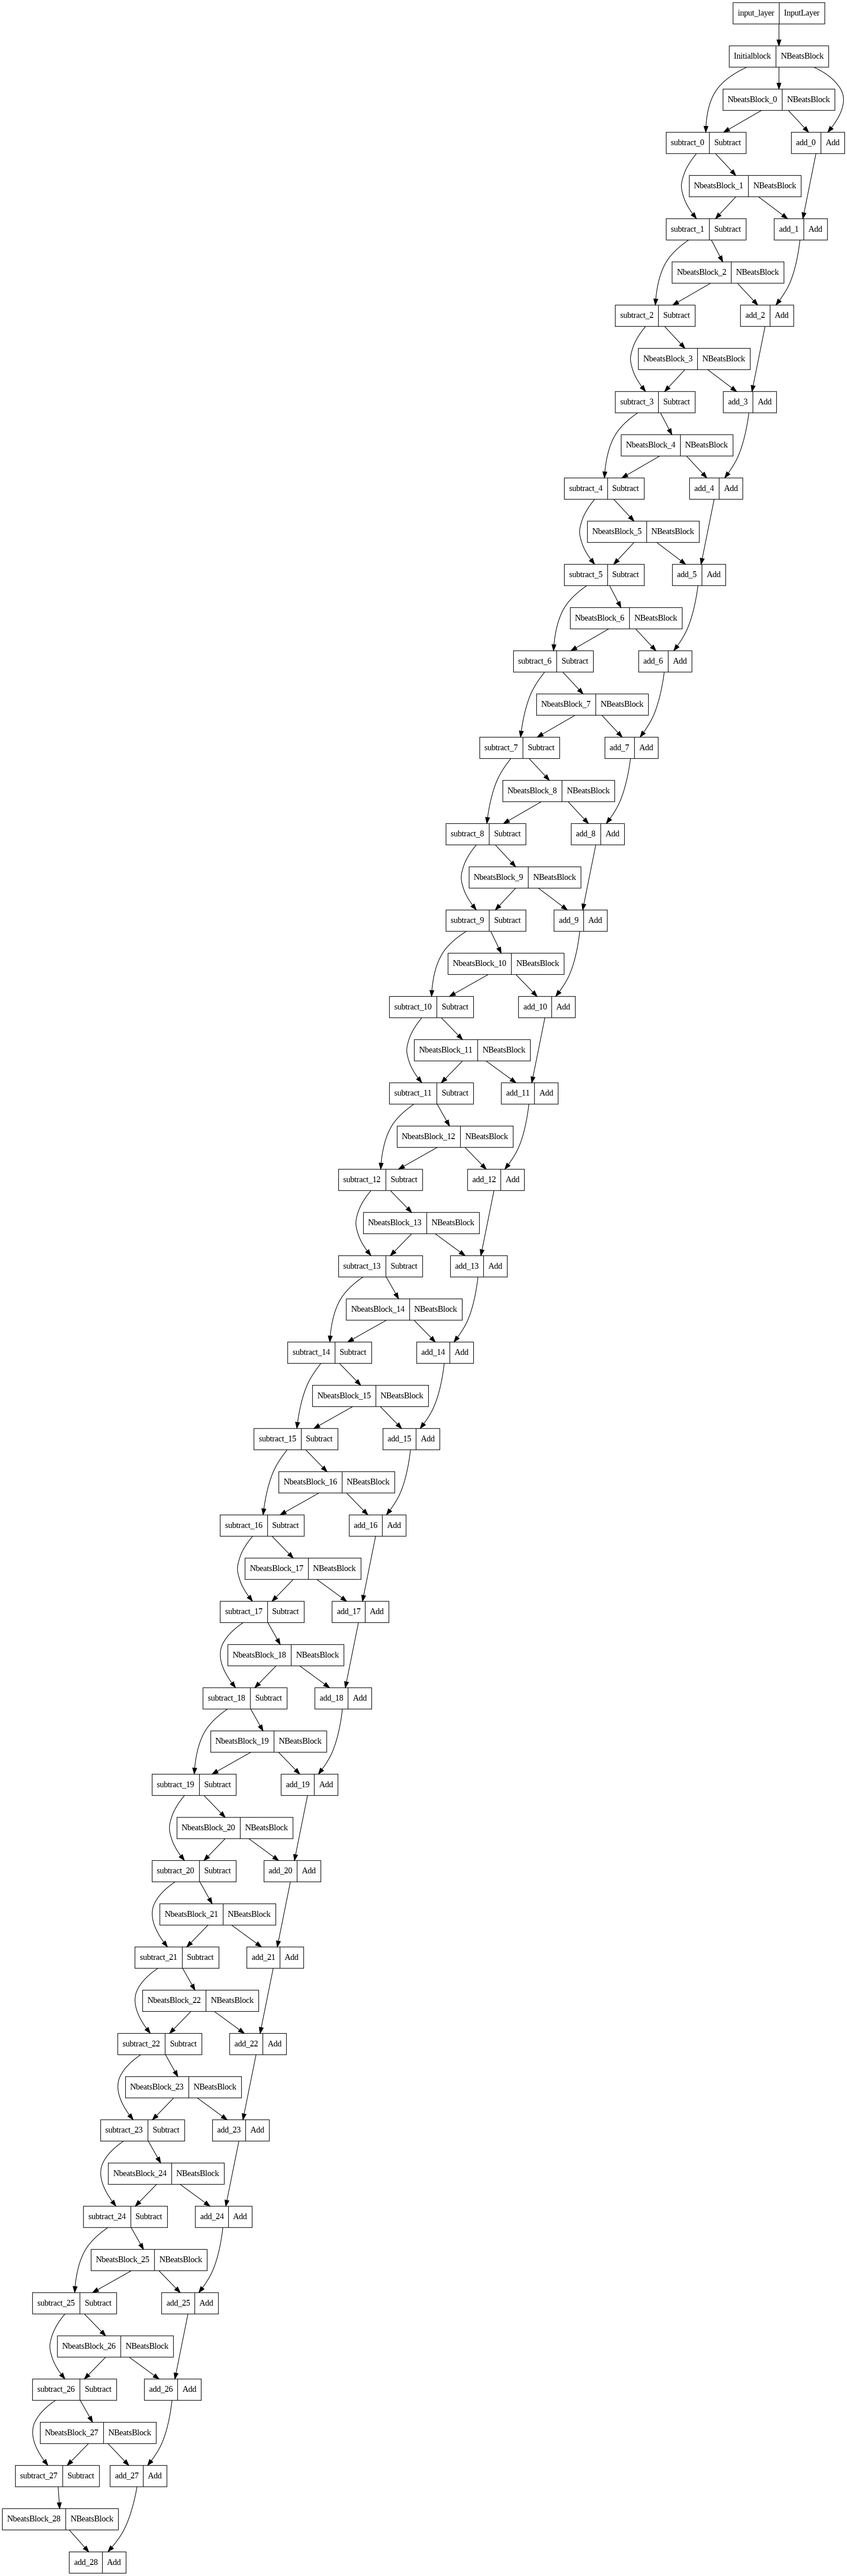

In [126]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

##Model_8 Ensemble model

In [127]:
## Constructing and fitting and ensemble of models
def get_ensemble_models(horizon=HORIZON,
                        input_size = INPUT_SIZE,
                        test_data = test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fn=["mae","mse","mape"]):
  """
  Return a list of num_iter models each trained on MAE, MSE and MAPE loss."""
  #make empty list for trained ensemble models
  ensemble_models = []

  #create num_iter number of models per loss function
  for i in range(num_iter):
    #build and fit a new model with a different loss fucntion
    for loss_function in loss_fn:
      print(f"optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      #construct a simple model
      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])

      #compile
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae","mse"])

      #fit
      model.fit(train_dataset,
                epochs=num_epochs,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=200,
                                                                verbose=1)])

      ensemble_models.append(model)

  return ensemble_models

In [128]:
%%time
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=100)

optimizing model by reducing: mae for 100 epochs, model number: 0
Epoch 1/100
3/3 [==============================] - 2s 115ms/step - loss: 1346.0874 - mae: 1346.0874 - mse: 4375896.5000 - val_loss: 8297.5713 - val_mae: 8297.5713 - val_mse: 128587408.0000 - lr: 0.0010
Epoch 2/100
3/3 [==============================] - 0s 26ms/step - loss: 2294.9475 - mae: 2294.9475 - mse: 13800634.0000 - val_loss: 9917.4482 - val_mae: 9917.4482 - val_mse: 180533824.0000 - lr: 0.0010
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 773.8279 - mae: 773.8279 - mse: 1656665.6250 - val_loss: 5290.3750 - val_mae: 5290.3750 - val_mse: 52765460.0000 - lr: 0.0010
Epoch 4/100
3/3 [==============================] - 0s 12ms/step - loss: 1559.7528 - mae: 1559.7528 - mse: 6606380.0000 - val_loss: 9927.1240 - val_mae: 9927.1240 - val_mse: 176355936.0000 - lr: 0.0010
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 1198.9413 - mae: 1198.9413 - mse: 3537239.2500 - val_loss: 

#Making predictions


In [129]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds=[]
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [130]:
ensemble_preds = make_ensemble_preds(ensemble_models,test_dataset)

1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 68ms/step


In [131]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8738.288,  8790.244,  8948.195, ..., 50567.953, 45566.227,
        45873.348],
       [ 8942.998,  8809.236,  9044.23 , ..., 50575.457, 49183.484,
        46352.055],
       [ 9122.725,  9085.463,  9257.141, ..., 52073.17 , 50329.457,
        48684.777],
       ...,
       [ 8537.462,  8572.956,  8740.916, ..., 47961.918, 47311.215,
        45934.535],
       [ 8906.369,  8790.074,  9059.694, ..., 49965.453, 49121.668,
        45817.14 ],
       [ 8898.508,  8953.09 ,  9130.929, ..., 51153.547, 48663.668,
        46578.414]], dtype=float32)>

In [132]:
ensemble_results = evaluate_preds(y_test, ensemble_preds)

In [133]:
ensemble_results

{'mae': 723.3663,
 'mse': 1686033.4,
 'rmse': 1288.7576,
 'mape': 3.37842,
 'mase': 1.2707543}

In [134]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8934.018, 8869.079, 9040.666, 8804.191, 8775.259, 8746.226,
       8719.091, 8576.321, 8489.71 , 8553.748], dtype=float32)>

In [135]:
ensemble_median = np.median(ensemble_preds, axis=0)

In [136]:
ensemble_results_mean = evaluate_preds(y_test, ensemble_mean)
ensemble_results_median = evaluate_preds(y_test, ensemble_median)


In [137]:
ensemble_results_mean, ensemble_results_median

({'mae': 593.4093,
  'mse': 1248749.9,
  'rmse': 1117.4747,
  'mape': 2.68472,
  'mase': 1.0424558},
 {'mae': 593.1821,
  'mse': 1252518.9,
  'rmse': 1119.1599,
  'mape': 2.6925511,
  'mase': 1.0420567})

In [138]:
model_1_results

{'mae': 563.0564,
 'mse': 1155162.0,
 'rmse': 1074.7847,
 'mape': 2.5104477,
 'mase': 0.98913413}

In [139]:
len(ensemble_models)

15

##plotiing the predictions intervals (uncertainity estimates) of our ensemble

In [140]:
#find upper and lower bounds of ensemble predictions
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis=0)
  #multiply std by 1.96
  interval =1.96*std

  #upper adn lower
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [141]:
lower, upper = get_upper_lower(ensemble_preds)

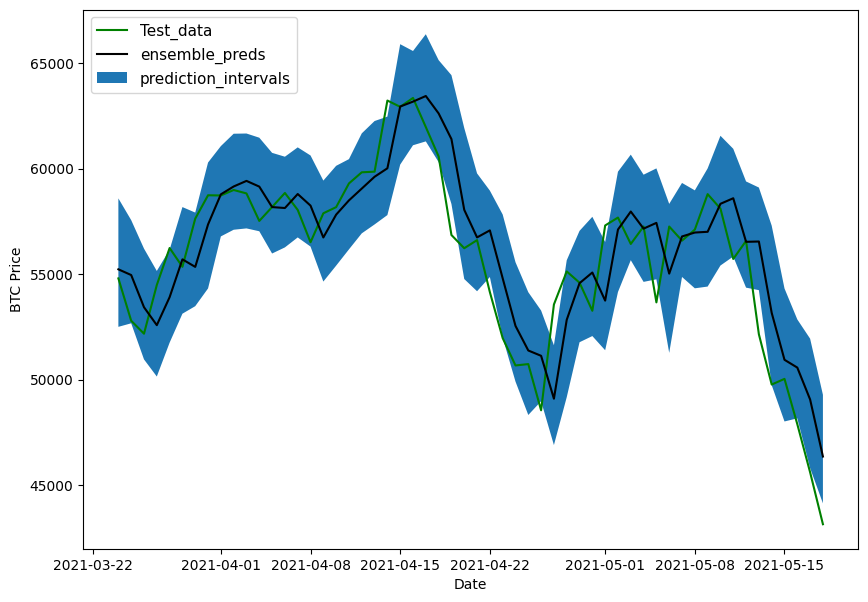

In [142]:
#get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

#plot the median of our preds along with the prediction
offset = 500
plt.figure(figsize = (10,7))
plt.plot(X_test.index[offset:], y_test[offset:],"g", label="Test_data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="ensemble_preds")
plt.xlabel("Date")
plt.ylabel("BTC Price")

#to plot upper and lower
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label = "prediction_intervals")
plt.legend(loc="upper left", fontsize=11)

##Model 9 future predition model

In [143]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [144]:
#train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price","block_reward"], axis=1).to_numpy()
y_all =bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [145]:
#turn data into tensors
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE=1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [146]:
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
])

model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 8ms/step - loss: 7449.8765
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: 5400.4038
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 3487.3015
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 1698.8993
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 454.0357
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 1035.6818
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 1139.7356
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 717.3508
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 404.1411
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 600.8904
Epoch 11/100
3/3 [==============================] - 0s 6ms/step - loss: 602.9933
Epoch 12/100
3/3 [==============================] - 0s 7ms/step - loss: 417.8060
Epoch 13/100
3/3 [============

#Make predictions into future

In [148]:
INTO_FUTURE = 14

1. Takes as input:
  * a list of values
  * a trained model
  * a window into the future to pridict
  * the window size a model was trained on
2. creates an empty list for future forecasts this will be retutrned at the end of the end, when it's full of predictions)and extracts the lst window_size values from the input values
3. loop into_future times making a prediction on window_size sequences which update to remove the first value and append the latest prediction

In [151]:
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.
   returns future forecasts as a list of floats.
   """
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(INTO_FUTURE):
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"predicting on:\n {last_window} -> prediction : {tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())

    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  return future_forecast

In [152]:
future_forecast = make_future_forecasts(y_all,model_9, INTO_FUTURE,WINDOW_SIZE)

1/1 [==============================] - 0s 22ms/step
predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> prediction : 55519.2421875

1/1 [==============================] - 0s 21ms/step
predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55519.2421875 ] -> prediction : 48435.74609375

1/1 [==============================] - 0s 29ms/step
predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55519.2421875  48435.74609375] -> prediction : 49946.6796875

1/1 [==============================] - 0s 33ms/step
predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55519.2421875  48435.74609375 49946.6796875 ] -> prediction : 48245.75390625

1/1 [==============================] - 0s 26ms/step
predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55519.2421875
 48435.74609375 49946.6796875  48245.75390

#plot future forecast

In [153]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of dataetime values ranging from start_date to start_data+ into_future
  """
  start_date = start_date + np.timedelta64(offset, "D")
  end_date = start_date + np.timedelta64(into_future,"D")
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [154]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [156]:
#get next two week of timesteps
next_time_steps = get_future_dates(last_timestep,
                                   INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [158]:
next_time_steps = np.insert(next_time_steps,0, last_timestep)
future_forecast = np.insert(future_forecast,0,btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55519.242, 48435.746, 49946.68 , 48245.754, 47687.52 ,
        46526.785, 48168.637, 52473.336, 47699.14 , 49789.01 , 47587.246,
        48319.254, 47781.754, 49731.504], dtype=float32))

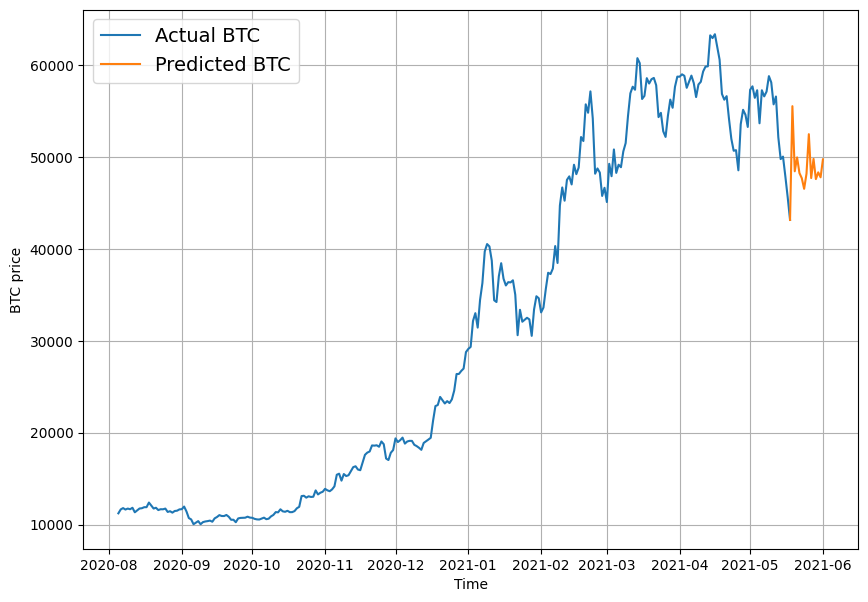

In [159]:
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index,btc_price, start=2500, format="-", label="Actual BTC")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC")

##Model_10 Turkey data

In [160]:
#let's introduce turkey problem into our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [161]:
#manufacture an extra price on the end
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [163]:
btc_price[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 43144.4712908603]

In [164]:
#get the timesteps
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

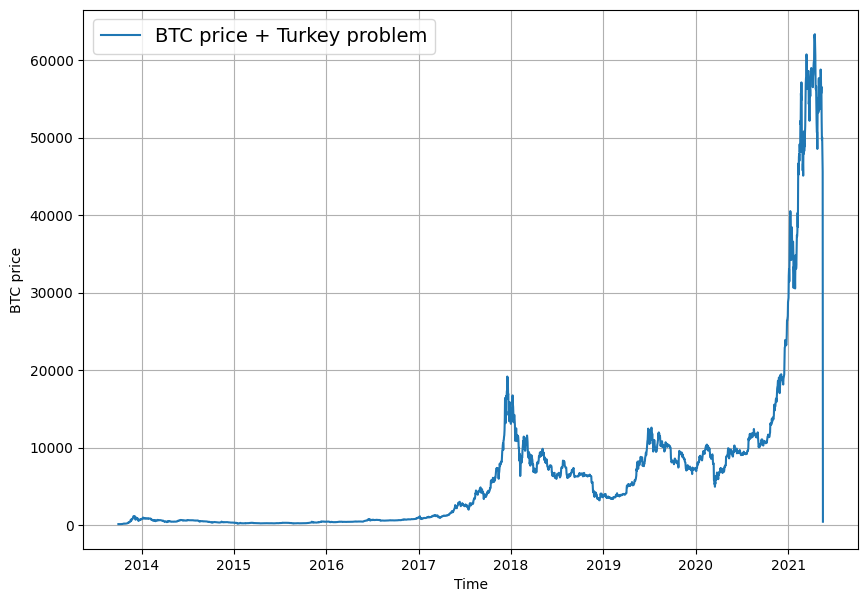

In [168]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC price + Turkey problem")

In [171]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [172]:
model_10 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
])

model_10.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam())

model_10.fit(X_train,
             y_train,
             epochs=100,
             batch_size=128,
             validation_data=(X_test, y_test),
             callbacks=[create_model_checkpoint("model_10")])

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 1024.4993 

18/18 [==============================] - 3s 66ms/step - loss: 817.0874 - val_loss: 3011.0022
Epoch 2/100
15/18 [========================>.....] - ETA: 0s - loss: 278.7798

18/18 [==============================] - 1s 37ms/step - loss: 268.9323 - val_loss: 1176.8190
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 187.8842

18/18 [==============================] - 1s 36ms/step - loss: 187.8842 - val_loss: 1055.6445
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 169.9315 - val_loss: 1093.8746
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 148.8552

18/18 [==============================] - 1s 36ms/step - loss: 148.8552 - val_loss: 815.7957
Epoch 6/100
15/18 [========================>.....] - ETA: 0s - loss: 129.3564

18/18 [==============================] - 1s 38ms/step - loss: 128.9192 - val_loss: 762.3076
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 122.2796 - val_loss: 806.5600
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 113.1272

18/18 [==============================] - 1s 68ms/step - loss: 120.8236 - val_loss: 713.7585
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 122.1831 - val_loss: 808.5820
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 142.9158 - val_loss: 874.7896
Epoch 11/100
18/18 [==============================] - 0s 6ms/step - loss: 130.2051 - val_loss: 1146.4672
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 171.4691

18/18 [==============================] - 1s 35ms/step - loss: 137.5799 - val_loss: 701.3792
Epoch 13/100
18/18 [==============================] - ETA: 0s - loss: 115.9311

18/18 [==============================] - 1s 37ms/step - loss: 115.9311 - val_loss: 690.1736
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8654 - val_loss: 739.9578
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 131.9304 - val_loss: 713.0107
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 102.2999

18/18 [==============================] - 1s 36ms/step - loss: 117.5150 - val_loss: 684.0496
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 111.5406 - val_loss: 763.5319
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 124.1938

18/18 [==============================] - 1s 36ms/step - loss: 123.5516 - val_loss: 663.6986
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 116.8724 - val_loss: 672.2729
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9143 - val_loss: 669.3915
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 109.9766

18/18 [==============================] - 1s 35ms/step - loss: 109.9766 - val_loss: 663.0416
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 110.7063 - val_loss: 691.6401
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 120.1634 - val_loss: 689.9431
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 117.6771 - val_loss: 676.2247
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 125.7764

18/18 [==============================] - 1s 35ms/step - loss: 115.1122 - val_loss: 652.3135
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 111.1040 - val_loss: 692.6461
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 109.2813

18/18 [==============================] - 1s 37ms/step - loss: 109.3106 - val_loss: 651.3205
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2641 - val_loss: 651.4488
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 107.2257 - val_loss: 723.4075
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 118.9800 - val_loss: 726.9267
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8842 - val_loss: 689.1219
Epoch 32/100
18/18 [==============================] - 0s 8ms/step - loss: 111.9672 - val_loss: 710.1320
Epoch 33/100
12/18 [===================>..........] - ETA: 0s - loss: 109.3221

18/18 [==============================] - 1s 51ms/step - loss: 109.0495 - val_loss: 649.4456
Epoch 34/100
18/18 [==============================] - 0s 8ms/step - loss: 110.5550 - val_loss: 821.9987
Epoch 35/100
18/18 [==============================] - 0s 8ms/step - loss: 114.2356 - val_loss: 772.4322
Epoch 36/100
18/18 [==============================] - 0s 7ms/step - loss: 114.9656 - val_loss: 652.5840
Epoch 37/100
18/18 [==============================] - 0s 8ms/step - loss: 122.3615 - val_loss: 702.7854
Epoch 38/100
18/18 [==============================] - 0s 7ms/step - loss: 113.2549 - val_loss: 701.7325
Epoch 39/100
18/18 [==============================] - 0s 8ms/step - loss: 122.0814 - val_loss: 691.0698
Epoch 40/100
18/18 [==============================] - 0s 8ms/step - loss: 109.9213 - val_loss: 658.5933
Epoch 41/100
13/18 [====================>.........] - ETA: 0s - loss: 109.2802

18/18 [==============================] - 1s 44ms/step - loss: 108.0135 - val_loss: 647.9451
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9358 - val_loss: 658.2752
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5933 - val_loss: 764.3871
Epoch 44/100
18/18 [==============================] - ETA: 0s - loss: 111.8448

18/18 [==============================] - 1s 37ms/step - loss: 111.8448 - val_loss: 643.8068
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7380 - val_loss: 645.0399
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 117.8351 - val_loss: 849.5287
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 125.4633 - val_loss: 658.7054
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7217 - val_loss: 657.3652
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0411 - val_loss: 744.7615
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 117.3061 - val_loss: 646.9415
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9490 - val_loss: 655.1600
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 121.0856 - val_loss: 650.0350
Epoch 53/100
17/18 [===========================>..] - ETA: 0s - loss: 127.28

18/18 [==============================] - 1s 38ms/step - loss: 126.7476 - val_loss: 643.1518
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7689 - val_loss: 646.8285
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6093 - val_loss: 677.1847
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 108.0944 - val_loss: 803.8467
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4066 - val_loss: 664.7111
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6775 - val_loss: 662.3560
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 106.1119 - val_loss: 671.6686
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2909 - val_loss: 665.6970
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 111.5125 - val_loss: 663.3769
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 10

18/18 [==============================] - 1s 36ms/step - loss: 111.5312 - val_loss: 642.5021
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7782 - val_loss: 732.7596
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 130.3539 - val_loss: 926.2178
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7411 - val_loss: 698.4244
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 110.0732 - val_loss: 679.0601
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 106.0655 - val_loss: 648.9777
Epoch 74/100
18/18 [==============================] - ETA: 0s - loss: 106.3031

18/18 [==============================] - 1s 37ms/step - loss: 106.3031 - val_loss: 641.5701
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8244 - val_loss: 650.1643
Epoch 76/100
18/18 [==============================] - ETA: 0s - loss: 111.5838

18/18 [==============================] - 1s 36ms/step - loss: 111.5838 - val_loss: 641.4601
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9639 - val_loss: 648.2731
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 106.5326 - val_loss: 643.4487
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 117.2743 - val_loss: 653.2889
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 114.7197 - val_loss: 667.5295
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1610 - val_loss: 793.5866
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 130.4006 - val_loss: 828.4609
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 138.7265 - val_loss: 900.4564
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 127.8521 - val_loss: 644.8406
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 10

In [173]:
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 5ms/step - loss: 653.8626


653.8626098632812

In [174]:
turkey_model = tf.keras.models.load_model("model_exp/model_10")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 641.4600


641.4599609375

In [175]:
turkey_preds = make_pred(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8847.436, 8783.33 , 9046.572, 8784.404, 8739.401, 8726.268,
       8695.681, 8512.202, 8462.65 , 8532.633], dtype=float32)>

In [176]:
turkey_results = evaluate_preds(y_test, turkey_preds)

In [177]:
turkey_results

{'mae': 17137.363,
 'mse': 614956740.0,
 'rmse': 23728.467,
 'mape': 121.4691,
 'mase': 26.520124}

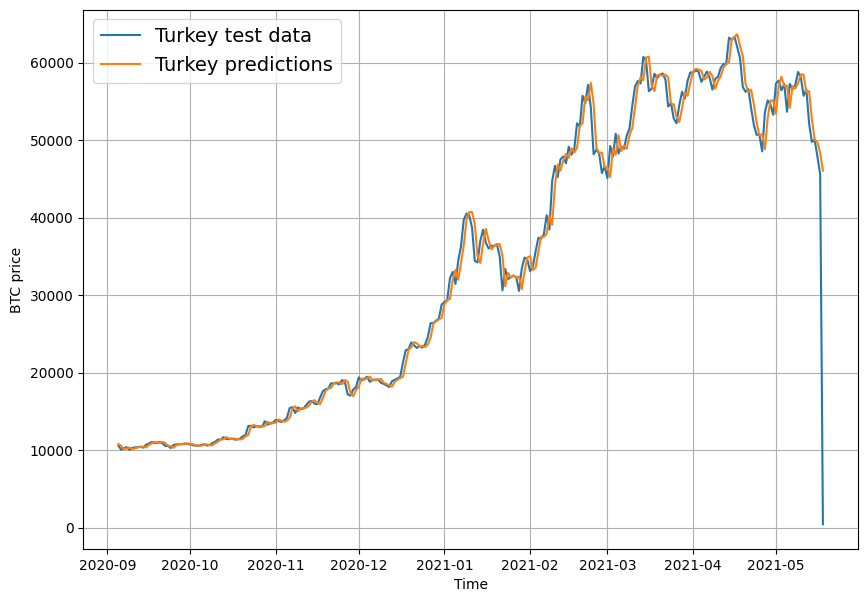

In [178]:
plt.figure(figsize=(10,7))
offset=300
plot_time_series(timesteps =btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey test data", start=offset)
plot_time_series(timesteps =btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 format="-",
                 label="Turkey predictions", start=offset)

#comparing the results of all of our models

In [179]:

# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,563.056396,1.155162e+06,1074.784668,2.510448,0.989134
model_2_dense_w30_h1,607.363892,1.286682e+06,1134.320190,2.783000,1.061678
model_3_dense_w30_h7,1198.936401,5.085810e+06,1383.161011,5.548727,2.133440
model_4_CONV1D,573.781555,1.198884e+06,1094.935669,2.589246,1.007975
model_5_LSTM,600.922241,1.275220e+06,1129.256470,2.691563,1.055654
model_6_multivariate,17151.044922,6.152691e+08,23722.128906,113.392960,30.129635
model_8_NBEATs,580.888245,1.201147e+06,1095.968384,2.605574,1.020460
model_9_ensemble,723.366272,1.686033e+06,1288.757568,3.378420,1.270754
model_10_turkey,17137.363281,6.149567e+08,23728.466797,121.469101,26.520124


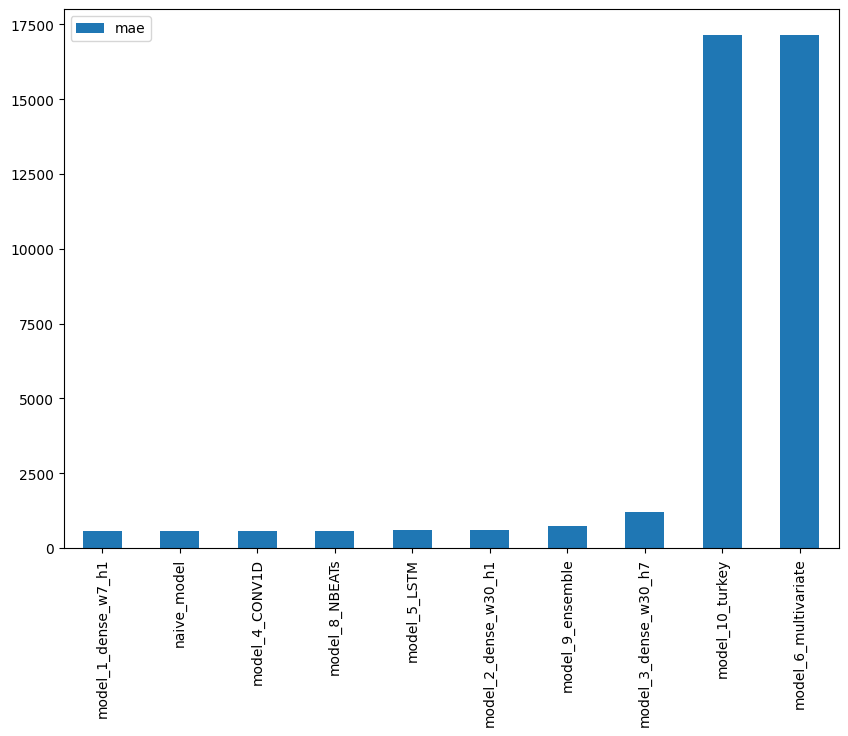

In [180]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");
